## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
import plotly.express as px

## Importing the data set

In [2]:
df = pd.read_csv('Data\sim_av_tumour.csv', low_memory=False)
df1 = pd.read_csv('Data\sim_av_patient.csv')

## Merging the data set

In [3]:
df2 = pd.merge(df, df1)
df2

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST SITE_ICD10_O2_3CHAR  \
0        10399610       1   10000001        2017-03-31                 C44   
1        10694862       1   10000002        2016-01-14                 C44   
2        11938715       2   10000003        2018-12-10                 C44   
3        11869010       1   10000004        2018-04-05                 C44   
4        11037077       1   10000005        2018-04-23                 C44   
...           ...     ...        ...               ...                 ...   
1113580  11606763       2   40158030        2017-08-24                 C50   
1113581  11441567       2   40158031        2019-03-04                 C50   
1113582  11142034       2   40158032        2018-12-17                 C50   
1113583  11286525       2   40158033        2019-04-17                 C50   
1113584  10168833       2   40158034        2019-08-05                 C50   

        SITE_ICD10_O2 SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0                C444                            C44                     C444   
1                C449                            C44                     C449   
2                C442                            C44                     C442   
3                C449                            C44                     C449   
4                C446                            C44                     C446   
...               ...                            ...                      ...   
1113580          C503                            C50                     C503   
1113581          C502                            C50                     C502   
1113582          C509                            C50                     C509   
1113583          C501                            C50                     C501   
1113584          C509                            C50                     C509   

        SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...  ETHNICITY  \
0                    C444                     C44  ...          A   
1                    C449                     C44  ...        NaN   
2                    C442                     C44  ...          A   
3                    C449                     C44  ...          A   
4                    C446                     C44  ...          A   
...                   ...                     ...  ...        ...   
1113580              C503                     C50  ...          A   
1113581              C502                     C50  ...          Z   
1113582              C509                     C50  ...          Z   
1113583              C501                     C50  ...          A   
1113584              C509                     C50  ...          A   

         DEATHCAUSECODE_1A  DEATHCAUSECODE_1B  DEATHCAUSECODE_1C  \
0                      NaN                NaN                NaN   
1                      NaN                NaN                NaN   
2                      NaN                NaN                NaN   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   
...                    ...                ...                ...   
1113580                NaN                NaN                NaN   
1113581           R688,R54                NaN                NaN   
1113582           R688,R54               I489                NaN   
1113583                NaN                NaN                NaN   
1113584                NaN                NaN                NaN   

        DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING DEATHLOCATIONCODE  \
0                    NaN                       NaN               NaN   
1                    NaN                       NaN               NaN   
2                    NaN                       NaN               NaN   
3                    NaN                       NaN               NaN   
4                    NaN                       NaN               NaN   
...                  

# Multiple Tumour for same paitent

In [4]:
patient_id_counts = df2['PATIENTID'].value_counts()
duplicate_summary = patient_id_counts.value_counts().sort_index()
duplicate_summary

1    987381
2     57599
3      3386
4       198
5        10
6         1
Name: PATIENTID, dtype: int64

In [5]:
#list of the paitent ID having 5 tumour ID
patient_ids_occuring_five_times = patient_id_counts[patient_id_counts == 5].index.tolist()
patient_ids_occuring_five_times

[40053071,
 20024555,
 20056056,
 20039175,
 20048721,
 20088152,
 10310054,
 10262301,
 20047084,
 30138634]

In [6]:
#list of the paitent ID number 200001809  having 5 tumour ID
patient_id_to_locate = 200001809
matching_rows = df2[df2['PATIENTID'] == patient_id_to_locate]
matching_rows

Empty DataFrame
Columns: [TUMOURID, GENDER, PATIENTID, DIAGNOSISDATEBEST, SITE_ICD10_O2_3CHAR, SITE_ICD10_O2, SITE_ICD10R4_O2_3CHAR_FROM2013, SITE_ICD10R4_O2_FROM2013, SITE_ICDO3REV2011, SITE_ICDO3REV2011_3CHAR, MORPH_ICD10_O2, MORPH_ICDO3REV2011, BEHAVIOUR_ICD10_O2, BEHAVIOUR_ICDO3REV2011, T_BEST, N_BEST, M_BEST, STAGE_BEST, GRADE, AGE, CREG_CODE, STAGE_BEST_SYSTEM, LATERALITY, SCREENINGSTATUSFULL_CODE, ER_STATUS, PR_STATUS, HER2_STATUS, QUINTILE_2019, DATE_FIRST_SURGERY, CANCERCAREPLANINTENT, PERFORMANCESTATUS, CHRL_TOT_27_03, COMORBIDITIES_27_03, GLEASON_PRIMARY, GLEASON_SECONDARY, GLEASON_TERTIARY, GLEASON_COMBINED, ETHNICITY, DEATHCAUSECODE_1A, DEATHCAUSECODE_1B, DEATHCAUSECODE_1C, DEATHCAUSECODE_2, DEATHCAUSECODE_UNDERLYING, DEATHLOCATIONCODE, VITALSTATUS, VITALSTATUSDATE, LINKNUMBER]
Index: []

[0 rows x 47 columns]

# Merging the Lookup table to Dataframe

In [7]:
# Reading the Gender Lookup Table
Lookup = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zgender')
Lookup

Code                                        Description
0    1                                               Male
1    2                                             Female
2    9  Indeterminate (Unable to be classified as eith...
3    X  Not Known (PERSON STATED GENDER CODE not recor...

In [8]:
# Merging the Gender Lookup table to the dataframe
merged_df = pd.merge(df2, Lookup, left_on='GENDER', right_on='Code', how='left') #left Joint
merged_df['GENDER'] = merged_df['Description'] #code assign the value from the Description
merged_df.drop(['Code', 'Description'], axis=1, inplace=True) #code removes the 'Code' and 'Description' columns from the Dataframe 
merged_df

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST SITE_ICD10_O2_3CHAR  \
0        10399610    Male   10000001        2017-03-31                 C44   
1        10694862    Male   10000002        2016-01-14                 C44   
2        11938715  Female   10000003        2018-12-10                 C44   
3        11869010    Male   10000004        2018-04-05                 C44   
4        11037077    Male   10000005        2018-04-23                 C44   
...           ...     ...        ...               ...                 ...   
1113580  11606763  Female   40158030        2017-08-24                 C50   
1113581  11441567  Female   40158031        2019-03-04                 C50   
1113582  11142034  Female   40158032        2018-12-17                 C50   
1113583  11286525  Female   40158033        2019-04-17                 C50   
1113584  10168833  Female   40158034        2019-08-05                 C50   

        SITE_ICD10_O2 SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0                C444                            C44                     C444   
1                C449                            C44                     C449   
2                C442                            C44                     C442   
3                C449                            C44                     C449   
4                C446                            C44                     C446   
...               ...                            ...                      ...   
1113580          C503                            C50                     C503   
1113581          C502                            C50                     C502   
1113582          C509                            C50                     C509   
1113583          C501                            C50                     C501   
1113584          C509                            C50                     C509   

        SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...  ETHNICITY  \
0                    C444                     C44  ...          A   
1                    C449                     C44  ...        NaN   
2                    C442                     C44  ...          A   
3                    C449                     C44  ...          A   
4                    C446                     C44  ...          A   
...                   ...                     ...  ...        ...   
1113580              C503                     C50  ...          A   
1113581              C502                     C50  ...          Z   
1113582              C509                     C50  ...          Z   
1113583              C501                     C50  ...          A   
1113584              C509                     C50  ...          A   

         DEATHCAUSECODE_1A  DEATHCAUSECODE_1B  DEATHCAUSECODE_1C  \
0                      NaN                NaN                NaN   
1                      NaN                NaN                NaN   
2                      NaN                NaN                NaN   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   
...                    ...                ...                ...   
1113580                NaN                NaN                NaN   
1113581           R688,R54                NaN                NaN   
1113582           R688,R54               I489                NaN   
1113583                NaN                NaN                NaN   
1113584                NaN                NaN                NaN   

        DEATHCAUSECODE_2 DEATHCAUSECODE_UNDERLYING DEATHLOCATIONCODE  \
0                    NaN                       NaN               NaN   
1                    NaN                       NaN               NaN   
2                    NaN                       NaN               NaN   
3                    NaN                       NaN               NaN   
4                    NaN                       NaN               NaN   
...                  

In [9]:
# Reading the ICD lookup table
ICD = pd.read_excel(r'downloaded_dataset\icd10_lookup.xlsx')
ICD

Code                                        Description
0        A00                                            Cholera
1       A000  Cholera due to Vibrio cholerae 01, biovar chol...
2       A001    Cholera due to Vibrio cholerae 01, biovar eltor
3       A009                               Cholera, unspecified
4        A01                     Typhoid and paratyphoid fevers
...      ...                                                ...
79497   Z992                       Dependence on renal dialysis
79498   Z993                           Dependence on wheelchair
79499   Z998  Dependence on other enabling machines and devices
79500  Z9981                  Dependence on supplemental oxygen
79501  Z9989  Dependence on other enabling machines and devices

[79502 rows x 2 columns]

In [10]:
#Merging ICD lookup table with the column 'SITE_ICD10_O2_3CHAR'
merged_df1 = pd.merge(merged_df, ICD, left_on='SITE_ICD10_O2_3CHAR', right_on='Code', how='left') #Left Joint
merged_df1['SITE_ICD10_O2_3CHAR'] = merged_df1['Description']#code assign the value from the Description
merged_df1.drop(['Code', 'Description'], axis=1, inplace=True)#code removes the 'Code' and 'Description' columns from the Dataframe
merged_df1

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR SITE_ICD10_O2  \
0        Other and unspecified malignant neoplasm of skin          C444   
1        Other and unspecified malignant neoplasm of skin          C449   
2        Other and unspecified malignant neoplasm of skin          C442   
3        Other and unspecified malignant neoplasm of skin          C449   
4        Other and unspecified malignant neoplasm of skin          C446   
...                                                   ...           ...   
1113580                      Malignant neoplasm of breast          C503   
1113581                      Malignant neoplasm of breast          C502   
1113582                      Malignant neoplasm of breast          C509   
1113583                      Malignant neoplasm of breast          C501   
1113584                      Malignant neoplasm of breast          C509   

        SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0                                  C44                     C444   
1                                  C44                     C449   
2                                  C44                     C442   
3                                  C44                     C449   
4                                  C44                     C446   
...                                ...                      ...   
1113580                            C50                     C503   
1113581                            C50                     C502   
1113582                            C50                     C509   
1113583                            C50                     C501   
1113584                            C50                     C509   

        SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...  ETHNICITY  \
0                    C444                     C44  ...          A   
1                    C449                     C44  ...        NaN   
2                    C442                     C44  ...          A   
3                    C449                     C44  ...          A   
4                    C446                     C44  ...          A   
...                   ...                     ...  ...        ...   
1113580              C503                     C50  ...          A   
1113581              C502                     C50  ...          Z   
1113582              C509                     C50  ...          Z   
1113583              C501                     C50  ...          A   
1113584              C509                     C50  ...          A   

         DEATHCAUSECODE_1A  DEATHCAUSECODE_1B  DEATHCAUSECODE_1C  \
0                      NaN                NaN                NaN   
1                      NaN                NaN                NaN   
2                      NaN                NaN                NaN   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   
...                    ...                ...                ...   
1113580                NaN                NaN                NaN   
1113581           R688,R54                NaN                NaN   
1113582           R688,R54               I489                NaN   
1113583                NaN                NaN                NaN   
1113584                NaN   

In [11]:
#Merging ICD lookup table with the column 'SITE_ICD10_O2'
merged_df2 = pd.merge(merged_df1, ICD, left_on='SITE_ICD10_O2', right_on='Code', how='left')
merged_df2['SITE_ICD10_O2'] = merged_df2['Description']
merged_df2.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df2

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

        SITE_ICD10R4_O2_3CHAR_FROM2013 SITE_ICD10R4_O2_FROM2013  \
0                                  C44                     C444   
1                                  C44                     C449   
2                                  C44                     C442   
3                                  C44                     C449   
4                                  C44                     C446   
...                                ...                      ...   
1113580                            C50                     C503   
1113581                            C50                     C502   
1113582                            C50                     C509   
1113583                            C50                     C501   
1113584                            C50                     C509   

        SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  ...  ETHNICITY  \
0                    C444                     C44  ...          A   
1                    C449                     C44  ...        NaN   
2                    C442                     C44  ...          A   
3                    C449                     C44  ...          A   
4                    C446                     C44  ...          A   
...                   ...                     ...  ...        ...   
1113580              C503                     C50  ...          A   
1113581              C502                     C50  ...          Z   
1113582              C509                     C50  ...          Z   
1113583              C501                     C50  ...          A   
1113584              C509                     C50  ...          A   

         DEATHCAUSECODE_1A  DEATHCAUSECODE_1B  DEATHCAUSECODE_1C  \
0                      NaN                NaN                NaN   
1                      NaN                NaN                NaN

In [12]:
#Merging ICD lookup table with the column 'SITE_ICD10_O2_3CHAR_FROM2013'
merged_df3 = pd.merge(merged_df2, ICD, left_on='SITE_ICD10R4_O2_3CHAR_FROM2013', right_on='Code', how='left')
merged_df3['SITE_ICD10R4_O2_3CHAR_FROM2013'] = merged_df3['Description']
merged_df3.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df3

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

        SITE_ICD10R4_O2_FROM2013 SITE_ICDO3REV2011 SITE_ICDO3REV2011_3CHAR  \
0                           C444              C444                     C44   
1                           C449              C449                     C44   
2                           C442              C442                     C44   
3                           C449              C449                     C44   
4                           C446              C446                     C44   
...                          ...               ...                     ...   
1113580                     C503              C503                     C50   
1113581                     C502              C502                     C50   
1113582                     C509              C509                     C50   
1113583                     C501              C501                     C50   
1113584                     C509              C509                     C50   

         ...  ETHNICITY  DEATHCAUSECODE_1A  DEATHCAUSECODE_1B  \
0        ...          A                NaN                NaN   
1        ...        NaN           

In [13]:
#Merging ICD lookup table with the column 'SITE_ICD10_O2_FROM2013'
merged_df4 = pd.merge(merged_df3, ICD, left_on='SITE_ICD10R4_O2_FROM2013', right_on='Code', how='left')
merged_df4['SITE_ICD10R4_O2_FROM2013'] = merged_df4['Description']
merged_df4.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df4

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013 SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...              C444   
1        Other and unsp malignant neoplasm of skin, uns...              C449   
2        Oth and unsp malig neoplasm skin/ ear and extr...              C442   
3        Other and unsp malignant neoplasm of skin, uns...              C449   
4        Oth and unsp malig neoplasm skin/ upper limb, ...              C446   
...                                                    ...               ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...              C503   
1113581  Malignant neoplasm of upper-inner quadrant of ...              C502   
1113582   Malignant neoplasm of breast of unspecified site              C509   
1113583    Malignant neoplasm of central portion of breast              C501   
1113584   Malignant neoplasm of breast of unspecified site              C509   

        SITE_ICDO3REV2011_3CHAR  ...  ETHNICITY  DEATHCAUSECODE_1A  \
0                           C44  ...          A                NaN   


In [14]:
#Merging ICD lookup table with the column 'SITE_ICDO3REV2011'
merged_df5 = pd.merge(merged_df4, ICD, left_on='SITE_ICDO3REV2011', right_on='Code', how='left')
merged_df5['SITE_ICDO3REV2011'] = merged_df5['Description']
merged_df5.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df5

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [15]:
#Merging ICD lookup table with the column 'SITE_ICDO3REV2011_3CHAR'
merged_df6 = pd.merge(merged_df5, ICD, left_on='SITE_ICDO3REV2011_3CHAR', right_on='Code', how='left')
merged_df6['SITE_ICDO3REV2011_3CHAR'] = merged_df6['Description']
merged_df6.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df6

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [16]:
# Reading the Ethnicity Lookup Table
Ethnicity = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zethnicity')
Ethnicity

Code                   Description
0     0                         WHITE
1     8                       8 OTHER
2     A                 WHITE BRITISH
3     B                   WHITE IRISH
4     C  C ANY OTHER WHITE BACKGROUND
..  ...                           ...
66   SC                      Filipino
67   SD                     Malaysian
68   SE               Any Other Group
69    X                   X NOT KNOWN
70    Z                    NOT STATED

[71 rows x 2 columns]

In [17]:
# Merging the Ethnicity Lookup table to the 'ETHNICITY' column
merged_df7 = pd.merge(merged_df6, Ethnicity, left_on='ETHNICITY', right_on='Code', how='left')
merged_df7['ETHNICITY'] = merged_df7['Description']
merged_df7.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df7

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [18]:
#Merging ICD lookup table with the column 'DEATHCAUSECODE_UNDERLYING'
merged_df8 = pd.merge(merged_df7, ICD, left_on='DEATHCAUSECODE_UNDERLYING', right_on='Code', how='left')
merged_df8['DEATHCAUSECODE_UNDERLYING'] = merged_df8['Description']
merged_df8.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df8

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [19]:
# Reading the Vitalstatus Lookup Table
vital_status = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zvitalstatus')
vital_status

Code                                        Description  \
0     A                                              Alive   
1    A1  Is diagnosed at a date in the future (cf the d...   
2    A2  Is traced “alive” at a date in the future (cf ...   
3    A3  Is treated at a date in the future (cf the dat...   
4     D                                               Dead   
5    D1  Dies at a date in the future (cf the date of t...   
6    D2            Has an uncertain date of death recorded   
7    D3                             Dies before diagnosis    
8    D4                     Dies before treatment received   
9    D5        Dies before a date of trace returning alive   
10   X1  Is lost to follow-up at a date in the future (...   
11   X2  This patient may have returned and has been su...   
12   X3  This patient may have returned but has not bee...   
13   X4  Trace returned as embarked but this is not yet...   
14   X5                                  Lost to follow up   
15    X                  Embarked (July 2022 updated code)   
16    I                                     Is aliased off   

   NDRS guidance: Should patients be included in a survival analysis cohort with this value of the vital status flag?  
0                                                 Yes                                                                  
1                                                  No                                                                  
2                                                  No                                                                  
3                                                  No                                                                  
4                                                 Yes                                                                  
5                                                  No                                                                  
6   Yes (to document how many are excluded for thi...                                                                  
7   Yes (to document how many are excluded for thi...                                                                  
8                                                  No                                                                  
9                                                  No                                                                  
10                                                 No                                                                  
11                                                Yes                                                                  
12                                               Yes                                                                   
13                                                Yes                                                                  
14                                                Yes                                                                  
15                                                Yes                                                                  
16                                                 No

In [20]:
# Merging the VitalStatus Lookup table to the 'VITALSTATUS' column
merged_df9 = pd.merge(merged_df8, vital_status, left_on='VITALSTATUS', right_on='Code', how='left')
merged_df9['VITALSTATUS'] = merged_df9['Description']
merged_df9.drop(['Code', 'Description', 'NDRS guidance: Should patients be included in a survival analysis cohort with this value of the vital status flag?'], axis=1, inplace=True)
merged_df9

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [21]:
#Reading the Cancercareplanintent Lookup Table
cancer_care_intent = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zcancercareplanintent')
cancer_care_intent

Code          Description
0    9            Not known
1    C             Curative
2    X  No active treatment
3    Z         Non Curative

In [22]:
# Merging the Cancercareplanintent Lookup table to the 'CANCERCAREPLANINTENT' column
merged_df10 = pd.merge(merged_df9, cancer_care_intent, left_on='CANCERCAREPLANINTENT', right_on='Code', how='left')
merged_df10['CANCERCAREPLANINTENT'] = merged_df10['Description']
merged_df10.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df10

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [23]:
# Create a column name 'Age Interval' 
total_interval = 20 
# Specified bins to binned AGE column with lower bound
merged_df10['AGE_INTERVAL'] = pd.cut(merged_df10['AGE'], bins=[0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, float('inf')], labels=False, include_lowest=True)

# Convert bin indices to interval strings, e.g., '00–04', '05–09', ...
merged_df10['AGE_INTERVAL'] = merged_df10['AGE_INTERVAL'].apply(lambda x: f"{x*5:02d}–{x*5+4:02d}" if x < total_interval - 1 else "90+")
merged_df10

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [24]:
#Creating Fiscal_year column to the Dataframe
# Convert 'DIAGNOSISDATEBEST' column to datetime format
merged_df10['DIAGNOSISDATEBEST'] = pd.to_datetime(merged_df10['DIAGNOSISDATEBEST'])

# Extract the fiscal year from the 'DIAGNOSISDATEBEST' column and create a new column 'Fiscal_year'
merged_df10['Fiscal_year'] = merged_df10['DIAGNOSISDATEBEST'].dt.year
merged_df10.reset_index()
merged_df10

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [25]:
# Reading the Grade Lookup Table
Grade = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zgrade')
Grade

Code                             Description
0     0                 0 BORDERLINE MALIGNANCY
1     1             1 / I / WELL DIFFERENTIATED
2     2      2 / II / MODERATELY DIFFERENTIATED
3     3         3 / III / POORLY DIFFERENTIATED
4     4  4 / IV / UNDIFFERENTIATED / ANAPLASTIC
5     5                                  T CELL
6     6                                  B CELL
7     7                               NULL CELL
8     H                                    HIGH
9     I                            INTERMEDIATE
10    L                                     LOW
11    X                                       X

In [26]:
merged_df10.dtypes

TUMOURID                                   int64
GENDER                                    object
PATIENTID                                  int64
DIAGNOSISDATEBEST                 datetime64[ns]
SITE_ICD10_O2_3CHAR                       object
SITE_ICD10_O2                             object
SITE_ICD10R4_O2_3CHAR_FROM2013            object
SITE_ICD10R4_O2_FROM2013                  object
SITE_ICDO3REV2011                         object
SITE_ICDO3REV2011_3CHAR                   object
MORPH_ICD10_O2                             int64
MORPH_ICDO3REV2011                       float64
BEHAVIOUR_ICD10_O2                         int64
BEHAVIOUR_ICDO3REV2011                     int64
T_BEST                                    object
N_BEST                                    object
M_BEST                                    object
STAGE_BEST                                object
GRADE                                     object
AGE                                        int64
CREG_CODE           

## 1. Gender Data Analysis

In [27]:
# Group the data and calculate the number of unique 'PATIENTID' values in each group
Gender_Data = merged_df10.groupby(['Fiscal_year','GENDER','VITALSTATUS'])['PATIENTID'].nunique().reset_index()
Gender_Data

Fiscal_year  GENDER                                        VITALSTATUS  \
0          2016  Female                                              Alive   
1          2016  Female                                               Dead   
2          2016  Female        Dies before a date of trace returning alive   
3          2016  Female                             Dies before diagnosis    
4          2016  Female                     Dies before treatment received   
..          ...     ...                                                ...   
57         2019    Male                             Dies before diagnosis    
58         2019    Male                     Dies before treatment received   
59         2019    Male                                  Lost to follow up   
60         2019    Male  This patient may have returned and has been su...   
61         2019    Male  Trace returned as embarked but this is not yet...   

    PATIENTID  
0       87320  
1       34628  
2          51  
3           1  
4          23  
..        ...  
57          3  
58         18  
59        166  
60          4  
61          7  

[62 rows x 4 columns]

In [28]:
# Group the data in 'merged_df11' by 'Fiscal_year' and 'GENDER', and calculate the count of 'PATIENTID' values in each group
Gender_Data1 = merged_df10.groupby(['Fiscal_year', 'GENDER'])['PATIENTID'].count().reset_index()
Gender_Data1

Fiscal_year                                             GENDER  PATIENTID
0         2016                                             Female     126168
1         2016  Indeterminate (Unable to be classified as eith...          1
2         2016                                               Male     153378
3         2017                                             Female     123927
4         2017                                               Male     151643
5         2018                                             Female     123281
6         2018                                               Male     159295
7         2019                                             Female     121629
8         2019  Indeterminate (Unable to be classified as eith...          1
9         2019                                               Male     154262

In [29]:
# Create a bar plot using Plotly Express
fig = px.bar(
    Gender_Data1,            # DataFrame to use for the plot
    x='Fiscal_year',         # X-axis values from the DataFrame
    y='PATIENTID',           # Y-axis values from the DataFrame
    color='GENDER',          # Color the bars based on the 'GENDER' column
    barmode='group',         # Set the barmode to 'group' for grouped bars
    text='PATIENTID'         # Display the 'PATIENTID' value on top of the bars
)
# Customize the layout of the plot
fig.update_layout(
    autosize=False,          # Disable autosizing of the plot
    width=1000,              # Set the width of the plot
    height=800,              # Set the height of the plot
    legend=dict(x=1, y=1),   # Adjust the position of the legend
    font=dict(size=5.8)      # Set the font size for the plot
)
fig.show()

## 2.Create a dataset containing information on lung cancer patients C34 

In [30]:
# Filter the data for lung cancer patients (SITE_ICD10_O2_3CHAR = C34)
lung_cancer_data = merged_df[merged_df['SITE_ICD10_O2_3CHAR'] == 'C34']

# Select relevant columns
lung_cancer_dataset = lung_cancer_data[['PATIENTID','GENDER','VITALSTATUSDATE','VITALSTATUS','DEATHCAUSECODE_UNDERLYING']]

# Display the lung cancer dataset
lung_cancer_dataset

PATIENTID  GENDER VITALSTATUSDATE VITALSTATUS  \
188740    10175206    Male       5/07/2022           A   
188817    10175273    Male       5/07/2022           A   
188829    10175282    Male       5/07/2022           A   
188841    10175292    Male       5/07/2022           A   
188890    10175333    Male       5/07/2022           A   
...            ...     ...             ...         ...   
1113103   40157577  Female      16/06/2021           D   
1113173   40157644  Female      17/02/2019           D   
1113267   40157732  Female       5/07/2022           A   
1113274   40157738  Female       5/07/2022           A   
1113324   40157786  Female      19/03/2019           D   

        DEATHCAUSECODE_UNDERLYING  
188740                        NaN  
188817                        NaN  
188829                        NaN  
188841                        NaN  
188890                        NaN  
...                           ...  
1113103                      J841  
1113173                      C509  
1113267                       NaN  
1113274                       NaN  
1113324                      C519  

[4860 rows x 5 columns]

In [31]:
lung_cancer_dataset1= pd.merge(lung_cancer_dataset, ICD, left_on='DEATHCAUSECODE_UNDERLYING', right_on='Code', how='left')
lung_cancer_dataset1['DEATHCAUSECODE_UNDERLYING'] = lung_cancer_dataset1['Description']
lung_cancer_dataset1.drop(['Code', 'Description'], axis=1, inplace=True)
lung_cancer_dataset1

PATIENTID  GENDER VITALSTATUSDATE VITALSTATUS  \
0      10175206    Male       5/07/2022           A   
1      10175273    Male       5/07/2022           A   
2      10175282    Male       5/07/2022           A   
3      10175292    Male       5/07/2022           A   
4      10175333    Male       5/07/2022           A   
...         ...     ...             ...         ...   
4855   40157577  Female      16/06/2021           D   
4856   40157644  Female      17/02/2019           D   
4857   40157732  Female       5/07/2022           A   
4858   40157738  Female       5/07/2022           A   
4859   40157786  Female      19/03/2019           D   

                              DEATHCAUSECODE_UNDERLYING  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
4855  Other interstitial pulmonary diseases with fib...  
4856   Malignant neoplasm of breast of unspecified site  
4857                                                NaN  
4858                                                NaN  
4859           Malignant neoplasm of vulva, unspecified  

[4860 rows x 5 columns]

In [32]:
lung_cancer_dataset2 = pd.merge(lung_cancer_dataset1, vital_status, left_on='VITALSTATUS', right_on='Code', how='left')
lung_cancer_dataset2['VITALSTATUS'] = lung_cancer_dataset2['Description']
lung_cancer_dataset2.drop(['Code', 'Description', 'NDRS guidance: Should patients be included in a survival analysis cohort with this value of the vital status flag?'], axis=1, inplace=True)
lung_cancer_dataset2

PATIENTID  GENDER VITALSTATUSDATE VITALSTATUS  \
0      10175206    Male       5/07/2022       Alive   
1      10175273    Male       5/07/2022       Alive   
2      10175282    Male       5/07/2022       Alive   
3      10175292    Male       5/07/2022       Alive   
4      10175333    Male       5/07/2022       Alive   
...         ...     ...             ...         ...   
4855   40157577  Female      16/06/2021        Dead   
4856   40157644  Female      17/02/2019        Dead   
4857   40157732  Female       5/07/2022       Alive   
4858   40157738  Female       5/07/2022       Alive   
4859   40157786  Female      19/03/2019        Dead   

                              DEATHCAUSECODE_UNDERLYING  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
4855  Other interstitial pulmonary diseases with fib...  
4856   Malignant neoplasm of breast of unspecified site  
4857                                                NaN  
4858                                                NaN  
4859           Malignant neoplasm of vulva, unspecified  

[4860 rows x 5 columns]

In [33]:
#Creating Fiscal_year column to the Dataframe
# Convert 'VITALSTATUSDATE' column to datetime
lung_cancer_dataset2['VITALSTATUSDATE'] = pd.to_datetime(lung_cancer_dataset2['VITALSTATUSDATE'])

# Extract the fiscal year from the 'VITALSTATUSDATE' column and create a new column 'Fiscal_Year'
lung_cancer_dataset2['Fiscal_Year'] = lung_cancer_dataset2['VITALSTATUSDATE'].dt.year
pd.options.display.float_format = '{:.0f}'.format

# Display the modified dataset
lung_cancer_dataset2

C:\Users\saura\AppData\Local\Temp\ipykernel_14412\1963156966.py:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



PATIENTID  GENDER VITALSTATUSDATE VITALSTATUS  \
0      10175206    Male      2022-05-07       Alive   
1      10175273    Male      2022-05-07       Alive   
2      10175282    Male      2022-05-07       Alive   
3      10175292    Male      2022-05-07       Alive   
4      10175333    Male      2022-05-07       Alive   
...         ...     ...             ...         ...   
4855   40157577  Female      2021-06-16        Dead   
4856   40157644  Female      2019-02-17        Dead   
4857   40157732  Female      2022-05-07       Alive   
4858   40157738  Female      2022-05-07       Alive   
4859   40157786  Female      2019-03-19        Dead   

                              DEATHCAUSECODE_UNDERLYING  Fiscal_Year  
0                                                   NaN         2022  
1                                                   NaN         2022  
2                                                   NaN         2022  
3                                                   NaN         2022  
4                                                   NaN         2022  
...                                                 ...          ...  
4855  Other interstitial pulmonary diseases with fib...         2021  
4856   Malignant neoplasm of breast of unspecified site         2019  
4857                                                NaN         2022  
4858                                                NaN         2022  
4859           Malignant neoplasm of vulva, unspecified         2019  

[4860 rows x 6 columns]

In [34]:
# Remove rows with NaN values in 'DEATHCAUSECODE_UNDERLYING'
lung_cancer_dataset2 = lung_cancer_dataset2.dropna(subset=['DEATHCAUSECODE_UNDERLYING'])

# Count the occurrences of each cause of death
cause_of_death_counts = lung_cancer_dataset2['DEATHCAUSECODE_UNDERLYING'].value_counts()

# Get the top 20 causes of death
top_20_causes = cause_of_death_counts.head(20)
# Get the last 20 causes of death
last_20_causes = cause_of_death_counts.tail(20)
print("Top 20 Causes of Death:")
print(top_20_causes)
print("\nLast 20 Causes of Death:")
print(last_20_causes)

Top 20 Causes of Death:
Malignant neoplasm of unspecified part of bronchus or lung     299
Malignant neoplasm of prostate                                 111
Malignant neoplasm of colon, unspecified                        76
Malignant neoplasm of breast of unspecified site                40
Unspecified dementia                                            35
Malignant neoplasm of pancreas, unspecified                     28
Malignant neoplasm of rectosigmoid junction                     28
Malignant neoplasm of intestinal tract, part unspecified        27
Alzheimer's disease, unspecified                                26
Chronic ischemic heart disease, unspecified                     24
Malignant neoplasm of sigmoid colon                             22
Malignant neoplasm of esophagus, unspecified                    21
Pneumonia, unspecified organism                                 20
Malignant neoplasm of cecum                                     18
Atherosclerotic heart disease of nativ

In [35]:
# Pivot table to analyze gender and vital status
gender_vital_analysis = pd.pivot_table(
    lung_cancer_dataset2,
    values='PATIENTID',
    index=['Fiscal_Year', 'GENDER', 'VITALSTATUS'],
    aggfunc='count'
)

# Display the analysis
print("Gender and Vital Status Analysis:")
gender_vital_analysis

Gender and Vital Status Analysis:


PATIENTID
Fiscal_Year GENDER VITALSTATUS           
2016        Female Dead                 2
            Male   Dead                 2
2017        Female Dead                20
            Male   Dead                30
2018        Female Dead                48
            Male   Dead                87
2019        Female Dead                87
            Male   Dead               178
2020        Female Dead                96
            Male   Dead               186
2021        Female Dead                81
            Male   Dead               182
2022        Female Dead                57
            Male   Dead               115

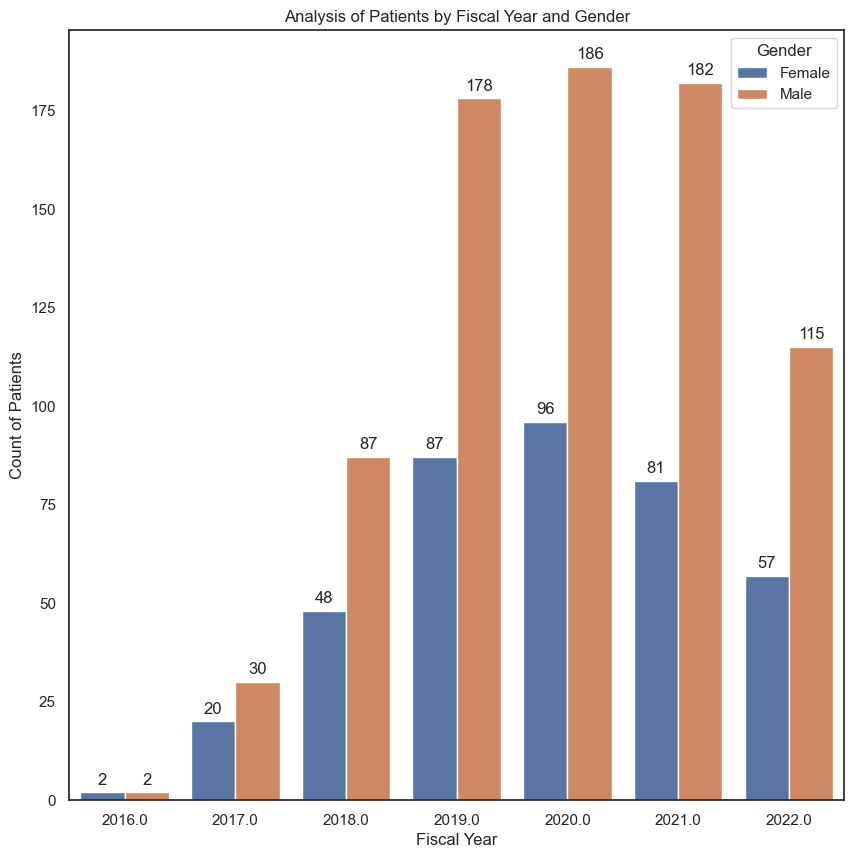

In [36]:
# Pivot table to analyze based on fiscal year and gender
analysis_fiscal_gender = pd.pivot_table(
    lung_cancer_dataset2,
    values='PATIENTID',
    index=['Fiscal_Year', 'GENDER'],
    aggfunc='count'
)
# Reset index for plotting
analysis_fiscal_gender.reset_index(inplace=True)

# Set the style for the plot
sns.set(style="white")

# Create a bar plot using seaborn
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Fiscal_Year', y='PATIENTID', hue='GENDER', data=analysis_fiscal_gender)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Set plot title and labels
plt.title('Analysis of Patients by Fiscal Year and Gender')
plt.xlabel('Fiscal Year')
plt.ylabel('Count of Patients')

# Display the legend
plt.legend(title='Gender')

# Show the plot
plt.show()

## 3. Tumor Site Analysis

In [37]:
# Group the data and calculate the count of 'TUMOURID' values in each group
Tumor_Data = merged_df10.groupby(['Fiscal_year', 'SITE_ICD10_O2_3CHAR'])['TUMOURID'].count().unstack()
Tumor_Data

SITE_ICD10_O2_3CHAR  Benign neoplasm of brain and oth prt central nervous system  \
Fiscal_year                                                                        
2016                                                                 3             
2017                                                                 7             
2018                                                                18             
2019                                                                24             

SITE_ICD10_O2_3CHAR  Benign neoplasm of meninges  \
Fiscal_year                                        
2016                                          70   
2017                                         106   
2018                                         157   
2019                                         203   

SITE_ICD10_O2_3CHAR  Benign neoplasm of other and unspecified endocrine glands  \
Fiscal_year                                                                      
2016                                                                 4           
2017                                                                 9           
2018                                                                10           
2019                                                                16           

SITE_ICD10_O2_3CHAR  Carcinoma in situ of breast  \
Fiscal_year                                        
2016                                         239   
2017                                         305   
2018                                         342   
2019                                         369   

SITE_ICD10_O2_3CHAR  Carcinoma in situ of cervix uteri  \
Fiscal_year                                              
2016                                                13   
2017                                                27   
2018                                                23   
2019                                                45   

SITE_ICD10_O2_3CHAR  Carcinoma in situ of middle ear and respiratory system  \
Fiscal_year                                                                   
2016                                                                 2        
2017                                                                11        
2018                                                                23        
2019                                                                18        

SITE_ICD10_O2_3CHAR  Carcinoma in situ of oral cavity, esophagus and stomach  \
Fiscal_year                                                                    
2016                                                                10         
2017                                                                21         
2018                                                                28         
2019                                                                38         

SITE_ICD10_O2_3CHAR  Carcinoma in situ of other and unspecified digestive organs  \
Fiscal_year                                                                        
2016                                                               208             
2017                                                               233             
2018                                                               298             
2019                                                               339             

SITE_ICD10_O2_3CHAR  Carcinoma in situ of other and unspecified genital organs  \
Fiscal_year                                                                      
2016                                                                15           
2017                                                                26           
2018                                                                37           
2019                                                                66           

SITE_ICD10_O2_3CHAR  Carcinoma in situ of other and unspecified sites  ..

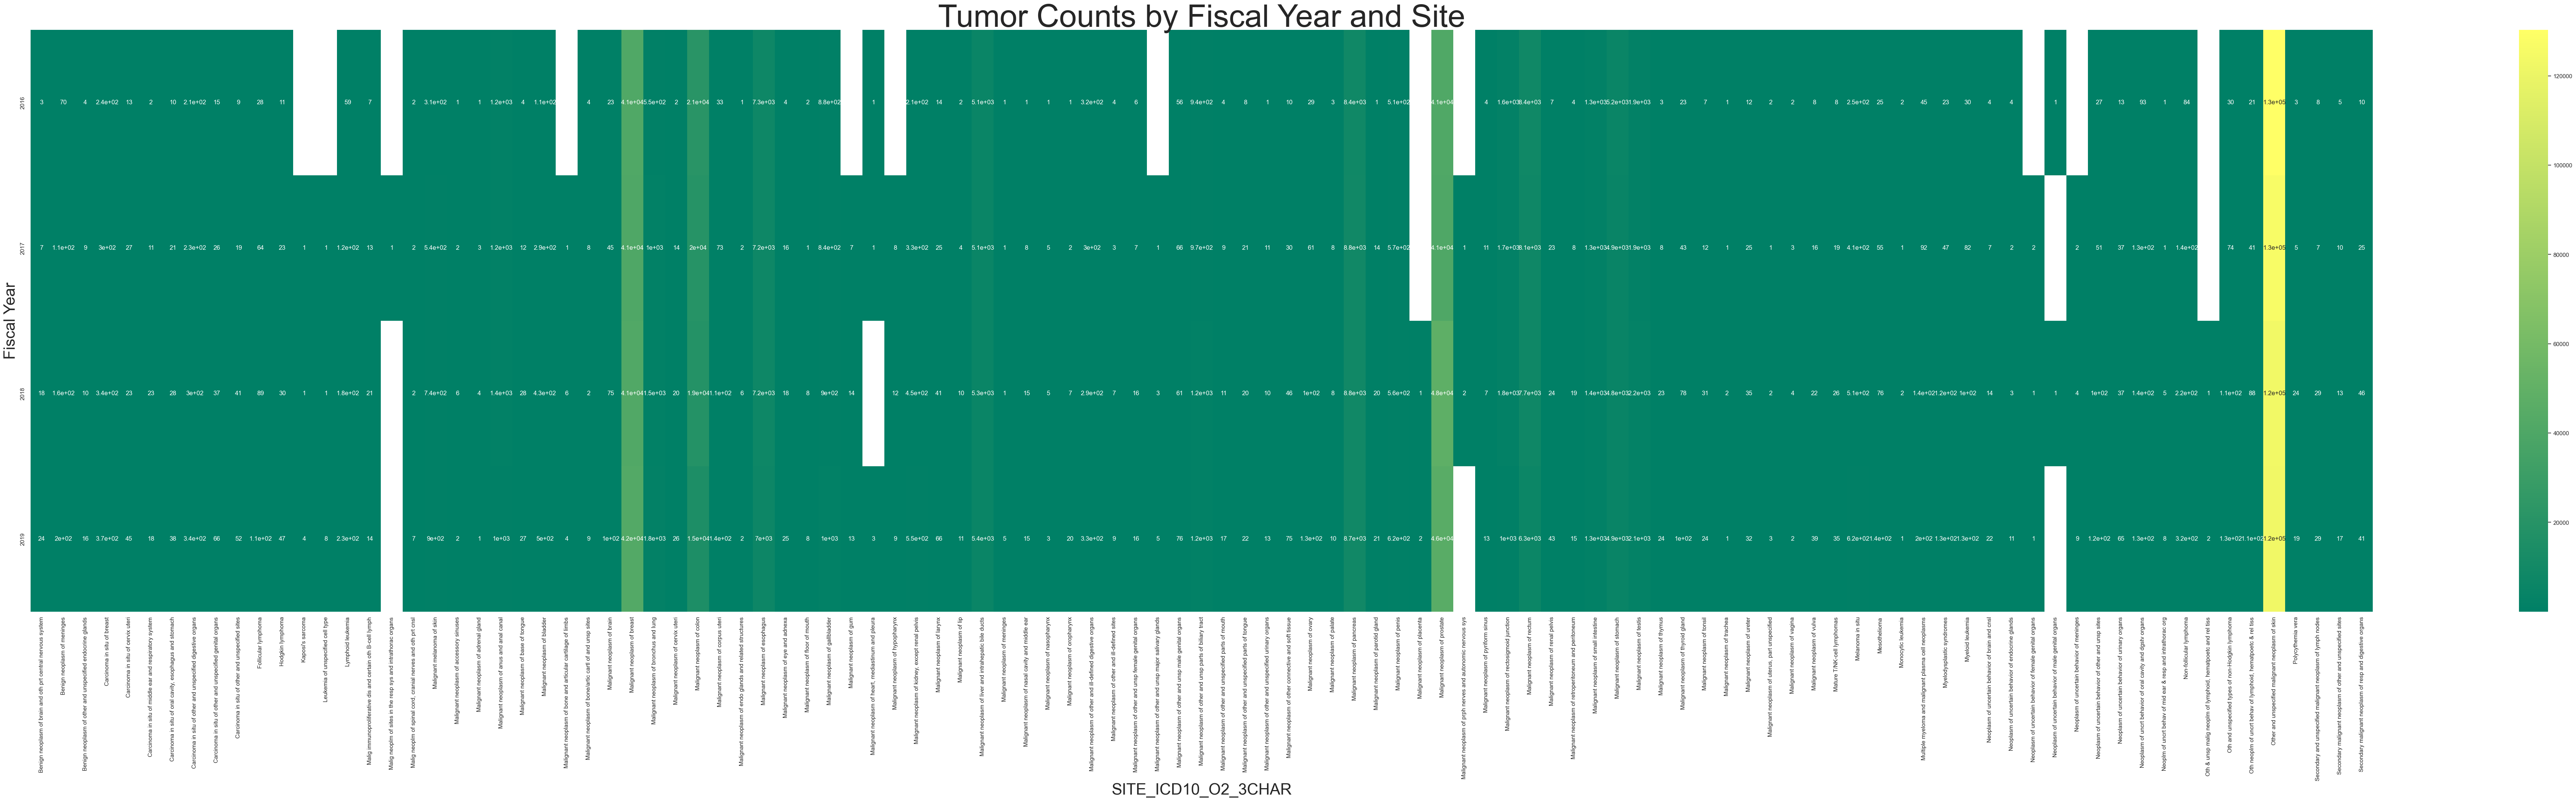

In [38]:
# Create a heatmap
plt.figure(figsize=(100, 20))  # Adjust the figure size as needed

sns.heatmap(
    Tumor_Data,           # DataFrame with the data for the heatmap
    annot=True,           # Display data values in each cell
#     fmt='d',              # Format the data values as integers
    cmap='summer'         # Use the 'summer' colormap for coloring the heatmap
)
# Set plot title, x-axis label, and y-axis label
plt.title('Tumor Counts by Fiscal Year and Site',fontsize=60)
plt.xlabel('SITE_ICD10_O2_3CHAR', fontsize=30)
plt.ylabel('Fiscal Year', fontsize=30)
plt.show()

## 4. Tumor Grade Analysis: 

In [39]:
# Merging the Grade Lookup table to the GRADE column
merged_df10['GRADE'] = merged_df10['GRADE'].str.replace('^G', '', regex=True) # Remove 'G' from the beginning of 'GRADE' column values
merged_df11 = pd.merge(merged_df10, Grade, left_on='GRADE', right_on='Code', how='left')
merged_df11['GRADE'] = merged_df11['Description']
merged_df11.drop(['Code', 'Description'], axis=1, inplace=True)
merged_df11

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [40]:
# Group the data by fiscal year and tumor grade, and count the occurrences of 'TUMOURID'
Tumor_Grade_Data = merged_df11.groupby(['Fiscal_year','GRADE'])['TUMOURID'].count()
Tumor_Grade_Data.reset_index()

Fiscal_year                                   GRADE  TUMOURID
0          2016             1 / I / WELL DIFFERENTIATED     14822
1          2016      2 / II / MODERATELY DIFFERENTIATED     56177
2          2016         3 / III / POORLY DIFFERENTIATED     28735
3          2016  4 / IV / UNDIFFERENTIATED / ANAPLASTIC       358
4          2016                                    HIGH       621
5          2016                            INTERMEDIATE       125
6          2016                                     LOW       234
7          2016                                       X    177186
8          2017             1 / I / WELL DIFFERENTIATED     15206
9          2017      2 / II / MODERATELY DIFFERENTIATED     54760
10         2017         3 / III / POORLY DIFFERENTIATED     27531
11         2017  4 / IV / UNDIFFERENTIATED / ANAPLASTIC       324
12         2017                                    HIGH       691
13         2017                            INTERMEDIATE       125
14         2017                                     LOW       314
15         2017                                       X    175006
16         2018             1 / I / WELL DIFFERENTIATED     14829
17         2018      2 / II / MODERATELY DIFFERENTIATED     54020
18         2018         3 / III / POORLY DIFFERENTIATED     26838
19         2018  4 / IV / UNDIFFERENTIATED / ANAPLASTIC       355
20         2018                                    HIGH       763
21         2018                            INTERMEDIATE       133
22         2018                                     LOW       305
23         2018                                       X    182506
24         2019             1 / I / WELL DIFFERENTIATED     15070
25         2019      2 / II / MODERATELY DIFFERENTIATED     50959
26         2019         3 / III / POORLY DIFFERENTIATED     26428
27         2019  4 / IV / UNDIFFERENTIATED / ANAPLASTIC       308
28         2019                                    HIGH       788
29         2019                            INTERMEDIATE       150
30         2019                                     LOW       293
31         2019                                       X    146206

In [41]:
# Retrieve the unique levels (values) from the MultiIndex of the 'Tumor_Grade_Data' series
unique_levels = Tumor_Grade_Data.index.levels
unique_levels

FrozenList([[2016, 2017, 2018, 2019], ['1 / I / WELL DIFFERENTIATED', '2 / II / MODERATELY DIFFERENTIATED', '3 / III / POORLY DIFFERENTIATED', '4 / IV / UNDIFFERENTIATED / ANAPLASTIC', 'HIGH', 'INTERMEDIATE', 'LOW', 'X']])

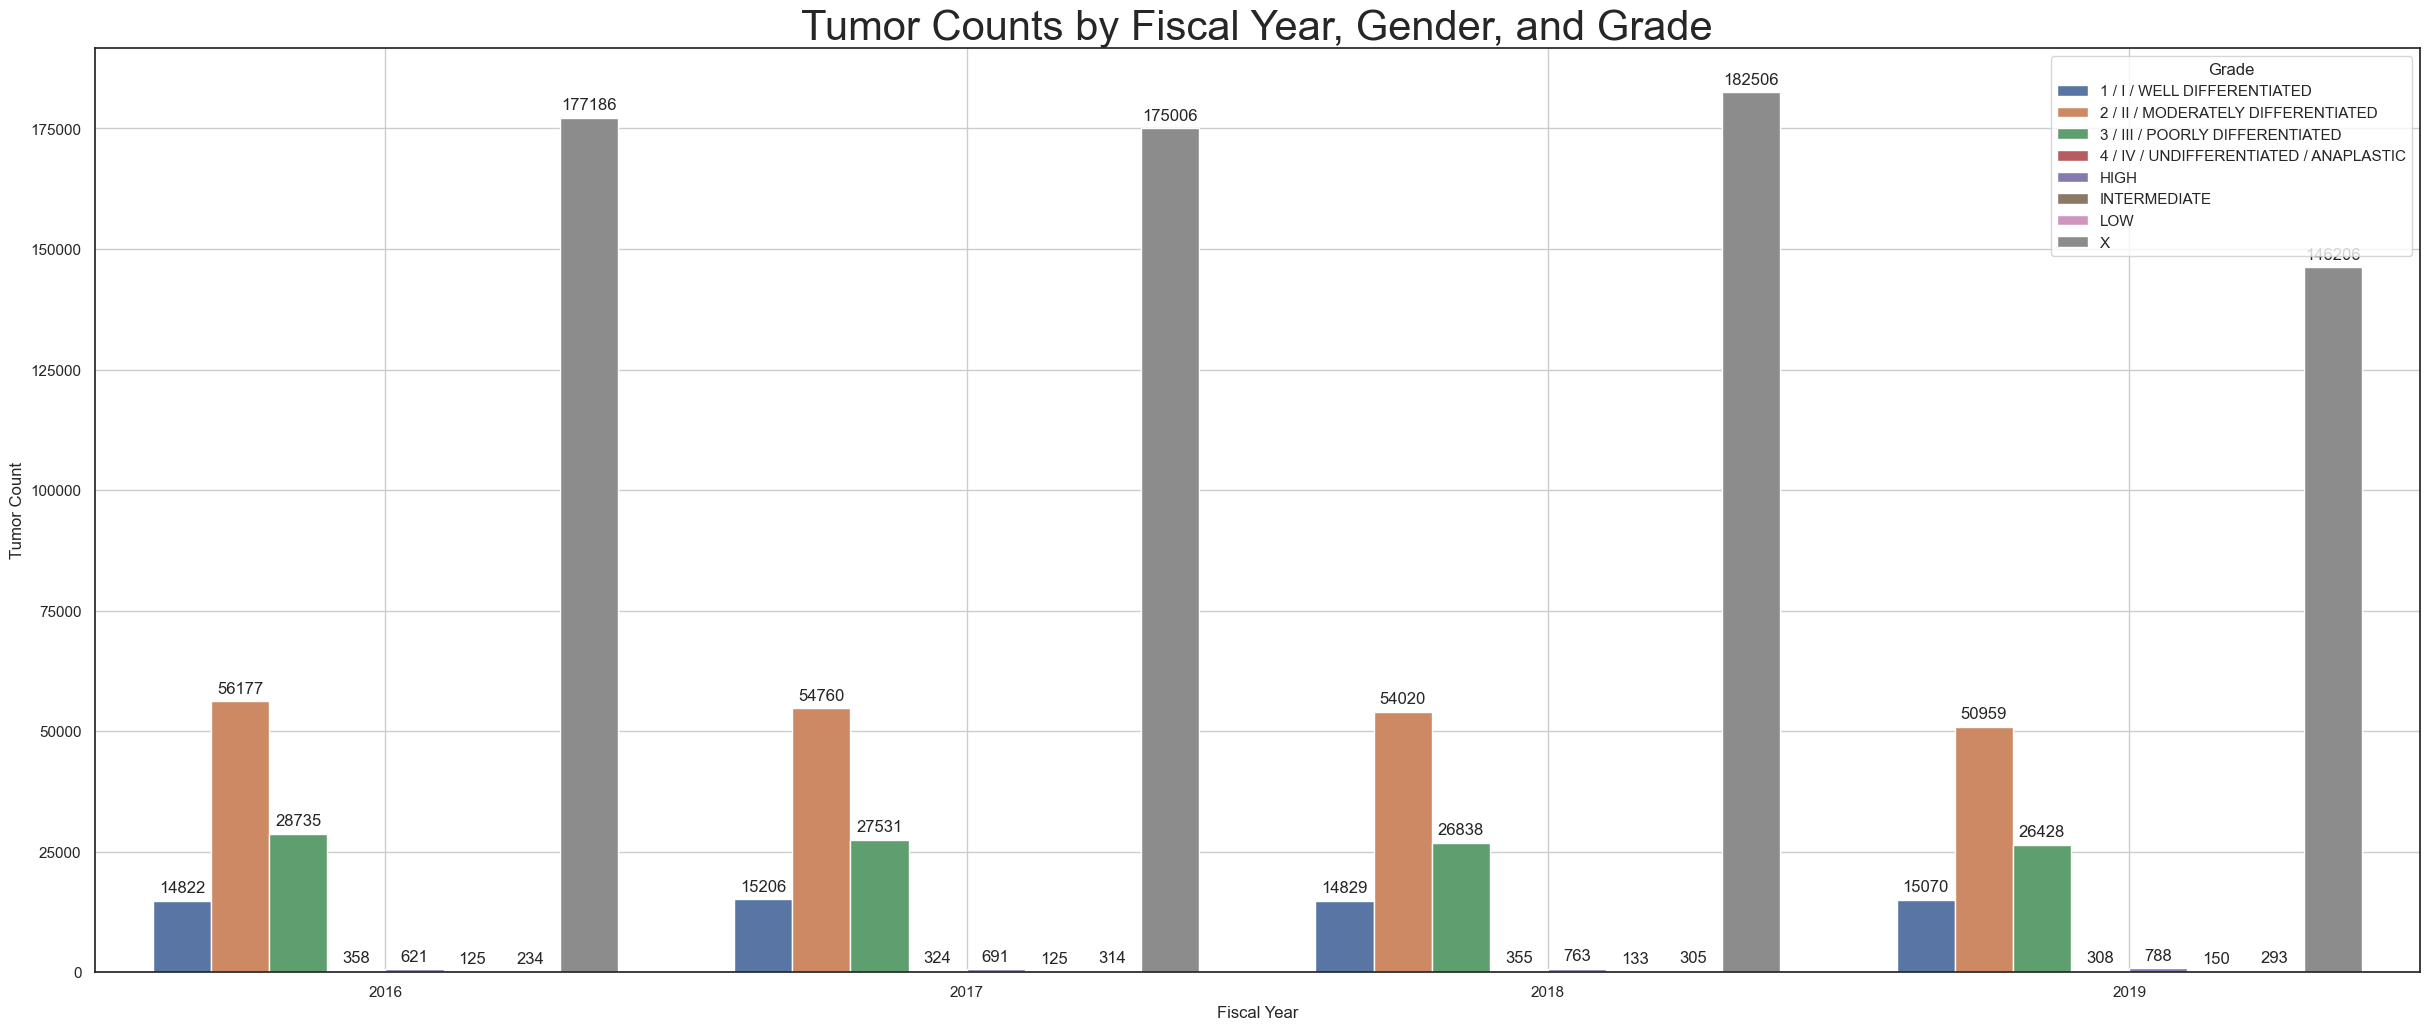

In [42]:
plt.figure(figsize=(30, 12))  # Adjust the figure size as needed

# Create a bar graph using seaborn
# 'Tumor_Grade_Data.reset_index()' converts the grouped data to a DataFrame for plotting
# 'x='Fiscal_year', y='TUMOURID', hue='GRADE'' specifies the columns to use for x-axis, y-axis, and hue (color) grouping
ax = sns.barplot(data=Tumor_Grade_Data.reset_index(), x='Fiscal_year', y='TUMOURID', hue='GRADE')
# Annotate each bar with the count value on top
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
# Set x-axis and y-axis labels, plot title, and legend
plt.xlabel('Fiscal Year')
plt.ylabel('Tumor Count')
plt.title('Tumor Counts by Fiscal Year, Gender, and Grade', fontsize = 30)
plt.legend(title='Grade')
plt.grid(True)
plt.show()

In [43]:
Tumor_Grade_Data1 = merged_df11.groupby(['Fiscal_year','GRADE','GENDER'])['TUMOURID'].count().reset_index()
Tumor_Grade_Data1

Fiscal_year                               GRADE  \
0          2016         1 / I / WELL DIFFERENTIATED   
1          2016         1 / I / WELL DIFFERENTIATED   
2          2016  2 / II / MODERATELY DIFFERENTIATED   
3          2016  2 / II / MODERATELY DIFFERENTIATED   
4          2016     3 / III / POORLY DIFFERENTIATED   
..          ...                                 ...   
61         2019                                 LOW   
62         2019                                 LOW   
63         2019                                   X   
64         2019                                   X   
65         2019                                   X   

                                               GENDER  TUMOURID  
0                                              Female      9416  
1                                                Male      5406  
2                                              Female     35395  
3                                                Male     20782  
4                                              Female     17885  
..                                                ...       ...  
61                                             Female       145  
62                                               Male       148  
63                                             Female     58556  
64  Indeterminate (Unable to be classified as eith...         1  
65                                               Male     87649  

[66 rows x 4 columns]

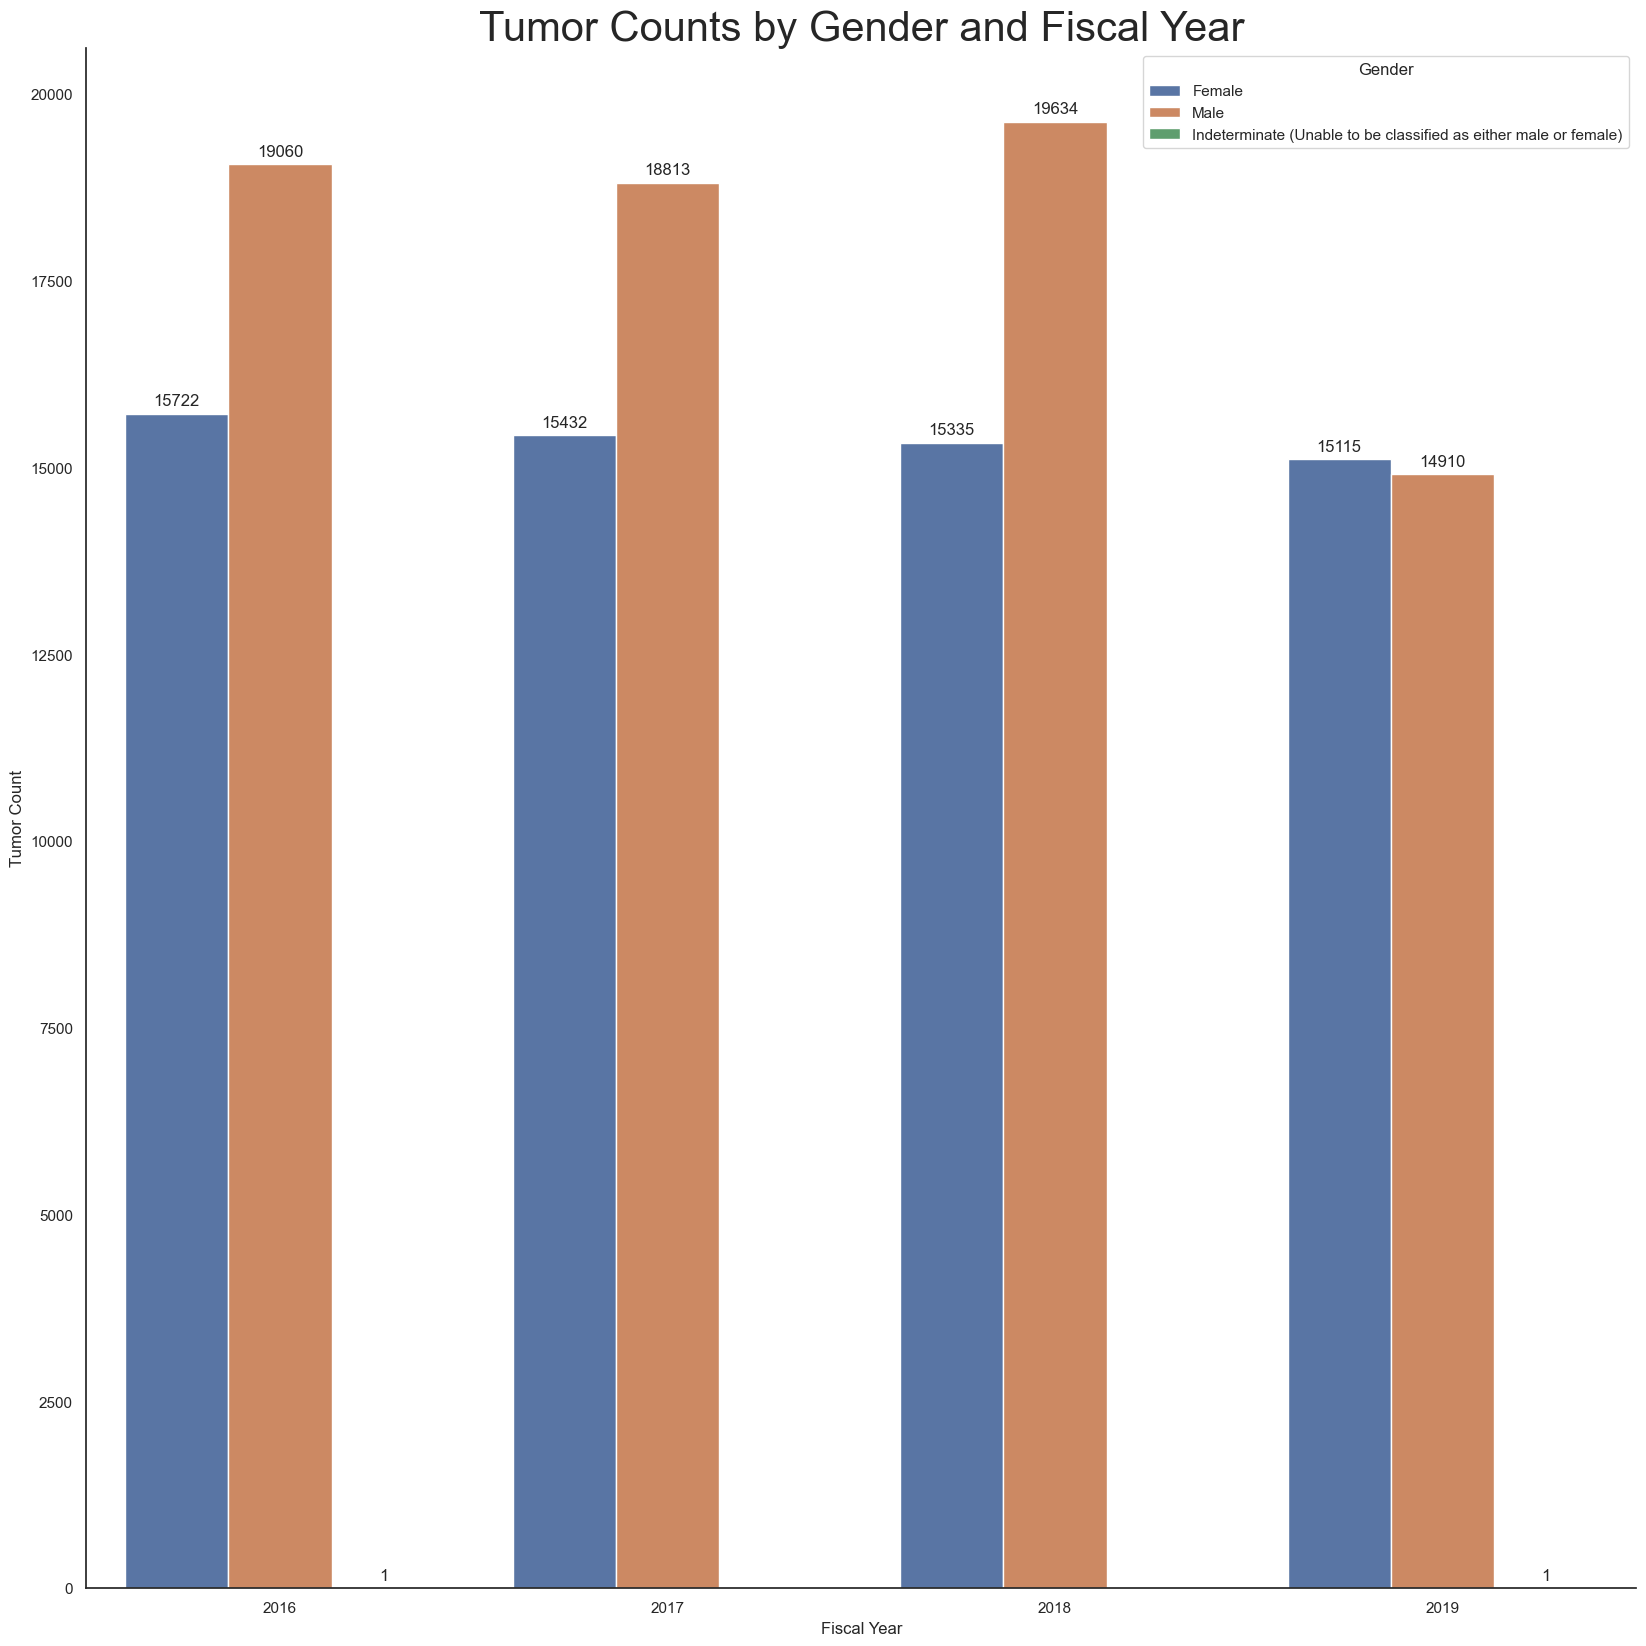

In [44]:
sns.set(style="white")

# Create a bar plot using seaborn
plt.figure(figsize=(20, 20))
ax = sns.barplot(data=Tumor_Grade_Data1, x='Fiscal_year', y='TUMOURID', hue='GENDER', errorbar=None)
sns.despine()
# Annotate each bar with the count value on top
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Set plot title and labels
plt.title('Tumor Counts by Gender and Fiscal Year', fontsize=30)
plt.xlabel('Fiscal Year')
plt.ylabel('Tumor Count')

# Display the legend
plt.legend(title='Gender', loc = 'upper right')

# Show the plot
plt.show()

## 5. Age at Diagnosis Analysis of UK

In [45]:
# Group the merged data by diagnostic year, age interval, and cancer site, counting the patient IDs
UK_Age_Data1 = merged_df10.groupby(['Fiscal_year', 'AGE_INTERVAL', 'GENDER','SITE_ICD10_O2_3CHAR'])['PATIENTID'].count().reset_index()
# Replace "90-94" with "90+"
UK_Age_Data1['AGE_INTERVAL'] = UK_Age_Data1['AGE_INTERVAL'].replace("90-94", "90+")
# Display the resulting data
UK_Age_Data1

Fiscal_year AGE_INTERVAL  GENDER  \
0            2016        00–04  Female   
1            2016        00–04  Female   
2            2016        00–04    Male   
3            2016        00–04    Male   
4            2016        00–04    Male   
...           ...          ...     ...   
5796         2019        90–94    Male   
5797         2019        90–94    Male   
5798         2019        90–94    Male   
5799         2019        90–94    Male   
5800         2019        90–94    Male   

                                    SITE_ICD10_O2_3CHAR  PATIENTID  
0     Malignant neoplasm of liver and intrahepatic b...          3  
1      Other and unspecified malignant neoplasm of skin          2  
2                           Malignant neoplasm of colon          1  
3     Malignant neoplasm of liver and intrahepatic b...          5  
4     Malignant neoplasm of other and unsp male geni...          1  
...                                                 ...        ...  
5796   Other and unspecified malignant neoplasm of skin       4423  
5797                                  Polycythemia vera          1  
5798  Secondary and unspecified malignant neoplasm o...          1  
5799  Secondary malignant neoplasm of other and unsp...          3  
5800  Secondary malignant neoplasm of resp and diges...          4  

[5801 rows x 5 columns]

In [46]:
#Checking the Age_interval 90+ has been created
checking = UK_Age_Data1[(UK_Age_Data1['AGE_INTERVAL'].isin(['90+']))]
checking

Empty DataFrame
Columns: [Fiscal_year, AGE_INTERVAL, GENDER, SITE_ICD10_O2_3CHAR, PATIENTID]
Index: []

In [47]:
UK_data = UK_Age_Data1.groupby(['Fiscal_year', 'AGE_INTERVAL', 'GENDER'])['PATIENTID'].sum().reset_index()
UK_data

Fiscal_year AGE_INTERVAL  GENDER  PATIENTID
0           2016        00–04  Female          5
1           2016        00–04    Male         10
2           2016        05–09  Female          9
3           2016        05–09    Male          9
4           2016        10–14  Female         14
..           ...          ...     ...        ...
149         2019        80–84    Male      19952
150         2019        85–89  Female      10492
151         2019        85–89    Male      13570
152         2019        90–94  Female       6219
153         2019        90–94    Male       7816

[154 rows x 4 columns]

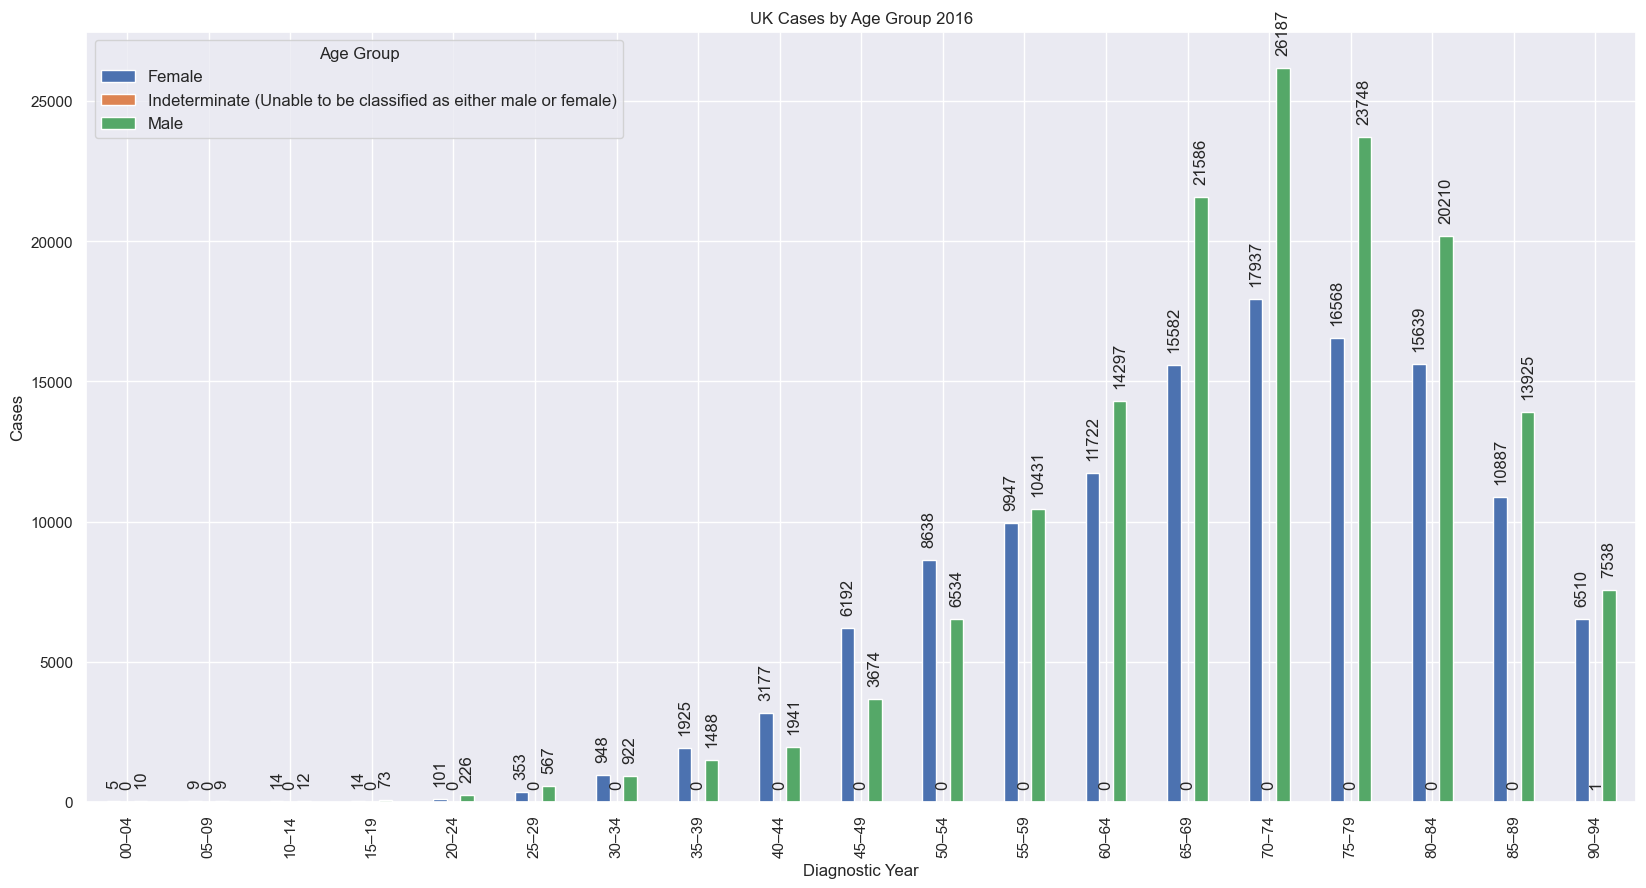

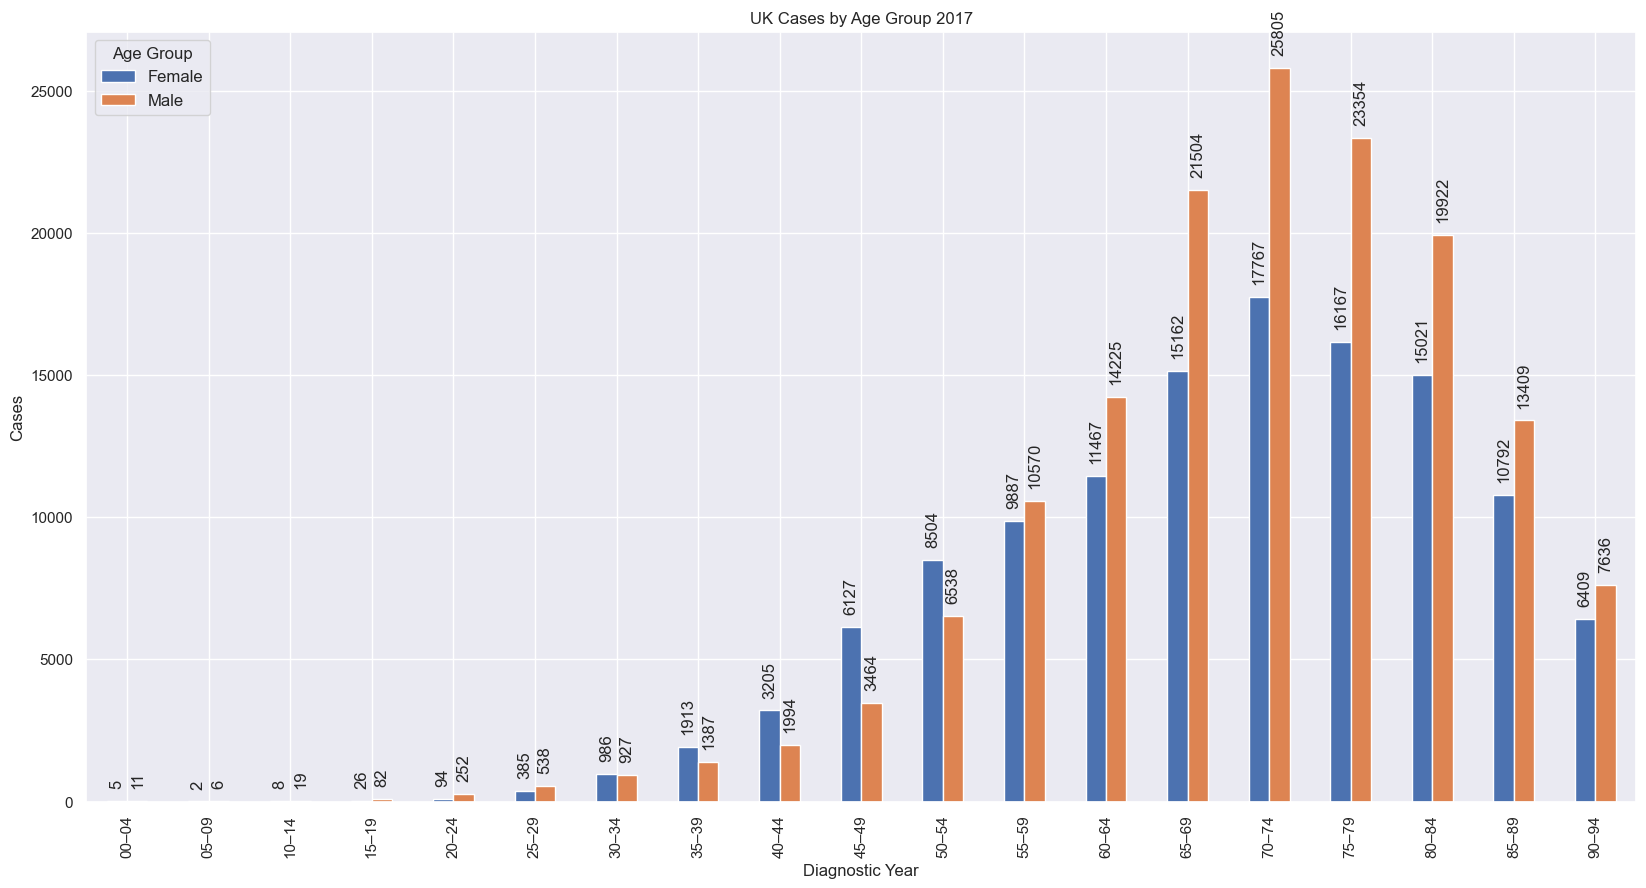

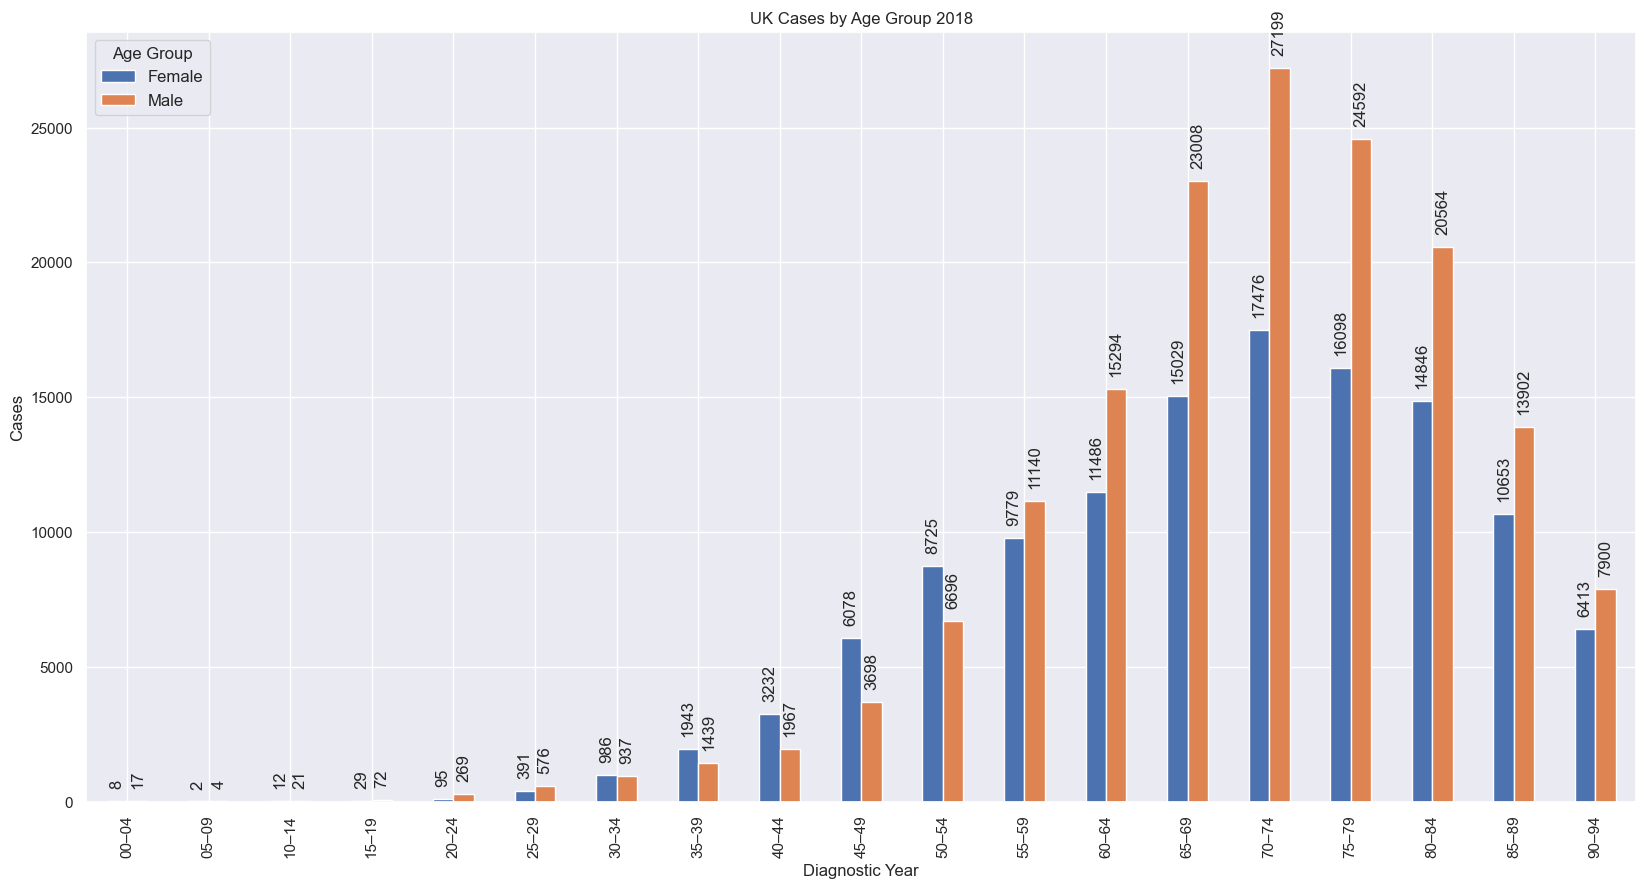

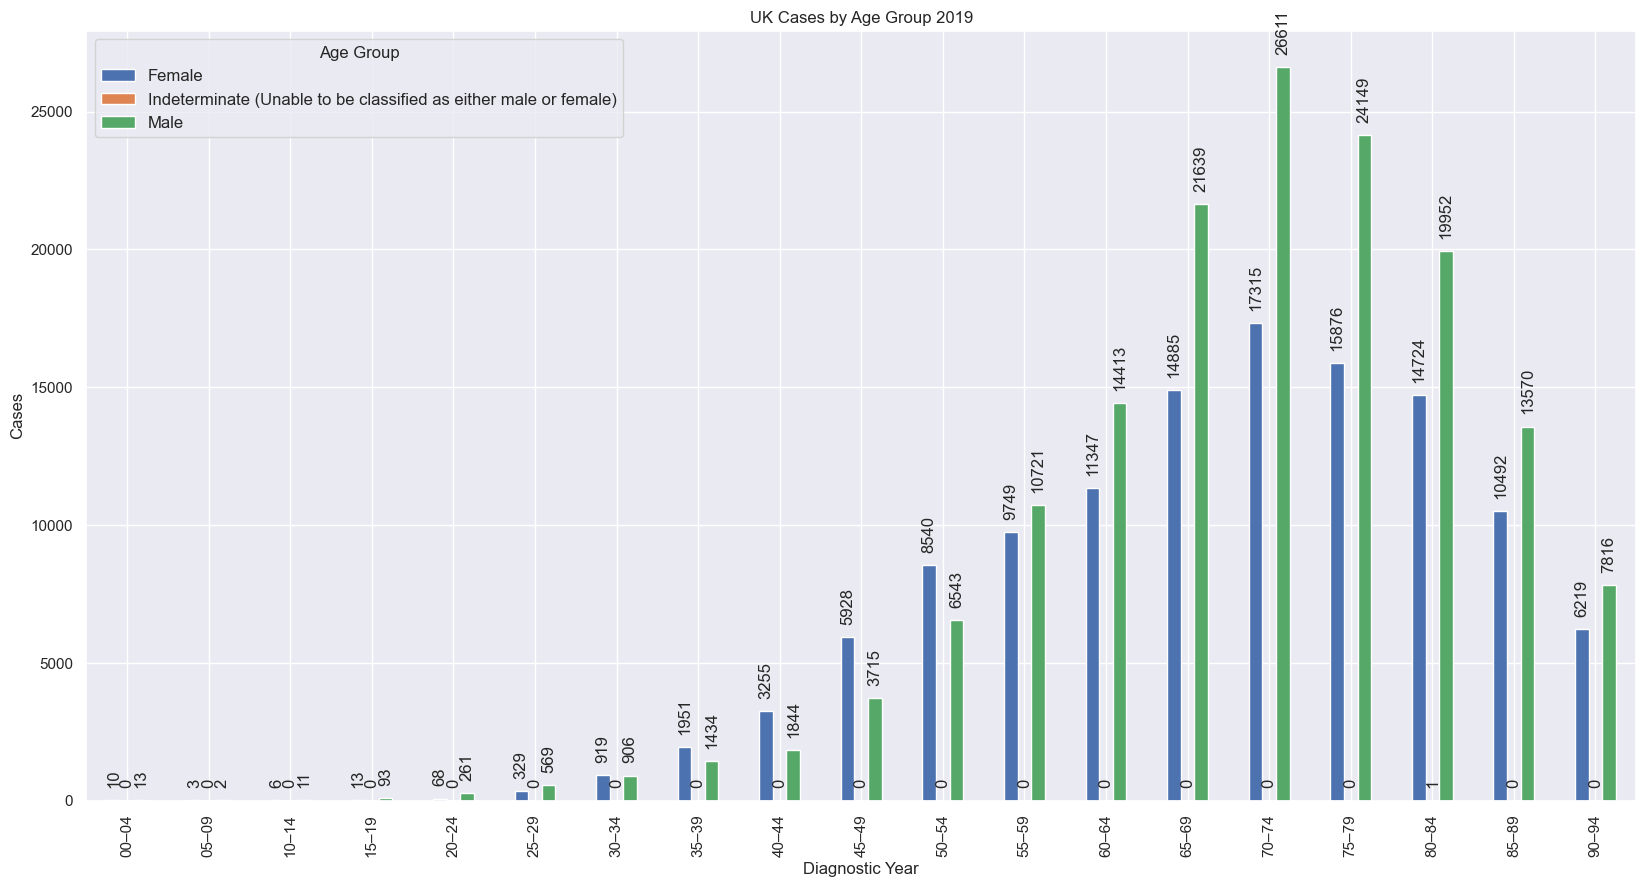

In [48]:
UK_data_16 = UK_data[(UK_data['Fiscal_year'].isin([2016]))]
UK_data_17 = UK_data[(UK_data['Fiscal_year'].isin([2017]))]
UK_data_18= UK_data[(UK_data['Fiscal_year'].isin([2018]))]
UK_data_19 = UK_data[(UK_data['Fiscal_year'].isin([2019]))]

#Group Bar chart for the year 2016
UK_data_16_Pivot = UK_data_16.pivot_table(index='AGE_INTERVAL', columns='GENDER', values= 'PATIENTID' )

sns.set(rc={'figure.figsize':(20,10)})
ax = UK_data_16_Pivot.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('UK Cases by Age Group 2016')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

#Group Bar Chart for the year 2017
UK_data_17_Pivot = UK_data_17.pivot_table(index='AGE_INTERVAL', columns='GENDER', values= 'PATIENTID' )

sns.set(rc={'figure.figsize':(20,10)})
ax = UK_data_17_Pivot.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('UK Cases by Age Group 2017')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

#Group bar chart for the year 2018
UK_data_18_Pivot = UK_data_18.pivot_table(index='AGE_INTERVAL', columns='GENDER', values= 'PATIENTID' )

sns.set(rc={'figure.figsize':(20,10)})
ax = UK_data_18_Pivot.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('UK Cases by Age Group 2018')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

#Group bar Chart for the year 2019
UK_data_19_Pivot = UK_data_19.pivot_table(index='AGE_INTERVAL', columns='GENDER', values= 'PATIENTID' )

sns.set(rc={'figure.figsize':(20,10)})
ax = UK_data_19_Pivot.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('UK Cases by Age Group 2019')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

## 6. AUS vs UK

In [49]:
#Reading the Australian data 
Australian_data = pd.read_excel(r'Downloaded_Dataset\CDiA-2022-3-character-ICD-10-pivot-table-for-2018-ACD (1).xlsx', sheet_name='Raw data')
Australian_data

Cancer site/type      Sex  \
0                                                 C00 Lip  Females   
1                                                 C00 Lip  Females   
2                                                 C00 Lip  Females   
3                                                 C00 Lip  Females   
4                                                 C00 Lip  Females   
...                                                   ...      ...   
130235  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130236  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130237  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130238  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130239  D47 Other cancers of lymphoid, haematopoietic ...    Males   

       Age group at diagnosis  Year of diagnosis  Cases  Crude rate  \
0                       00–04               1982      0           0   
1                       00–04               1983      0           0   
2                       00–04               1984      0           0   
3                       00–04               1985      0           0   
4                       00–04               1986      0           0   
...                       ...                ...    ...         ...   
130235                Unknown               2014      0         NaN   
130236                Unknown               2015      0         NaN   
130237                Unknown               2016      0         NaN   
130238                Unknown               2017      0         NaN   
130239                Unknown               2018      0         NaN   

        Unnamed: 6  \
0              NaN   
1              NaN   
2              NaN   
3              NaN   
4              NaN   
...            ...   
130235         NaN   
130236         NaN   
130237         NaN   
130238         NaN   
130239         NaN   

        Caution:  Age-specific (crude) rates have been included in this release and can be accessed in the 'Raw data' tab. The age-specific crude rates are provided as background information only. Crude rates are not recommended for use within the pivot table because crude rates across time, across age groups or between sexes are not additive.  
0                                                     NaN                                                                                                                                                                                                                                                                                                  
1                                                     NaN                                                                                                                                                                                                                                                                                                  
2                                                     NaN                                                                                                                                                                                                                                                                                                  
3                                                     NaN                                                                                                                                                                                                                                                                                                  
4                                                     NaN                                                                                                                                                                                                                                                                                             

In [50]:
# Filter the Australian data to include only years 2016, 2017, and 2018
Australian_filtered_data = Australian_data[(Australian_data['Year of diagnosis'].isin([2016, 2017, 2018]))]

# Group the filtered data by year of diagnosis, age group at diagnosis, and cancer site/type, and count the cases
Australian_gender_data = Australian_filtered_data.groupby(['Year of diagnosis', 'Age group at diagnosis', 'Cancer site/type'])['Cases'].count().reset_index()

# Rename columns for clarity
Australian_gender_data.rename(columns={'Year of diagnosis': 'DiagnosticYear', 'Age group at diagnosis': 'Age group', 'Cases': 'AUS Cases'}, inplace=True)

# Exclude rows with 'Unknown' age group
Australian_gender_data = Australian_gender_data[Australian_gender_data['Age group'] != 'Unknown']

# Display the resulting data
Australian_gender_data


DiagnosticYear Age group  \
0               2016     00–04   
1               2016     00–04   
2               2016     00–04   
3               2016     00–04   
4               2016     00–04   
...              ...       ...   
5187            2018       90+   
5188            2018       90+   
5189            2018       90+   
5190            2018       90+   
5191            2018       90+   

                                       Cancer site/type  AUS Cases  
0                                               C00 Lip          2  
1                                    C01 Base of tongue          2  
2             C02 Other and unspecified parts of tongue          2  
3                                               C03 Gum          2  
4                                    C04 Floor of mouth          2  
...                                                 ...        ...  
5187            C95 Leukaemias of unspecified cell type          2  
5188  C96 Other and unspecified cancers of lymphoid,...          2  
5189  D45 Polycythaemia vera [WARNING: Incomplete ti...          2  
5190  D46 Myelodysplastic syndromes [WARNING: Incomp...          2  
5191  D47 Other cancers of lymphoid, haematopoietic ...          2  

[5016 rows x 4 columns]

In [51]:
# Group the merged data by diagnostic year, age interval, and cancer site, counting the patient IDs
UK_Age_Data = merged_df10.groupby(['Fiscal_year', 'AGE_INTERVAL', 'SITE_ICD10_O2_3CHAR'])['PATIENTID'].count().reset_index()

# Replace "90-94" with "90+"
UK_Age_Data['AGE_INTERVAL'] = UK_Age_Data['AGE_INTERVAL'].replace("90-94", "90+")

# Rename columns for clarity
UK_Age_Data.rename(columns={'Fiscal_year': 'DiagnosticYear', 'AGE_INTERVAL': 'Age group', 'PATIENTID': 'UK Cases'}, inplace=True)



# Exclude rows with diagnostic year 2019
UK_Age_Data = UK_Age_Data[UK_Age_Data['DiagnosticYear'] != 2019]

# Display the resulting data
UK_Age_Data

DiagnosticYear Age group  \
0               2016     00–04   
1               2016     00–04   
2               2016     00–04   
3               2016     00–04   
4               2016     00–04   
...              ...       ...   
2612            2018     90–94   
2613            2018     90–94   
2614            2018     90–94   
2615            2018     90–94   
2616            2018     90–94   

                                    SITE_ICD10_O2_3CHAR  UK Cases  
0                           Malignant neoplasm of colon         1  
1     Malignant neoplasm of liver and intrahepatic b...         8  
2     Malignant neoplasm of other and unsp male geni...         1  
3                        Malignant neoplasm of prostate         1  
4                          Malignant neoplasm of testis         2  
...                                                 ...       ...  
2612  Oth and unspecified types of non-Hodgkin lymphoma         6  
2613  Oth neoplm of uncrt behav of lymphoid, hematpo...         8  
2614   Other and unspecified malignant neoplasm of skin      7757  
2615  Secondary and unspecified malignant neoplasm o...         2  
2616  Secondary malignant neoplasm of resp and diges...         5  

[2617 rows x 4 columns]

In [52]:
# merging AUS and UK data
merged_UK_AUS = pd.merge(Australian_gender_data,UK_Age_Data)
merged_UK_AUS

DiagnosticYear Age group  \
0                 2016     00–04   
1                 2016     00–04   
2                 2016     00–04   
3                 2016     00–04   
4                 2016     00–04   
...                ...       ...   
212691            2018     85–89   
212692            2018     85–89   
212693            2018     85–89   
212694            2018     85–89   
212695            2018     85–89   

                                         Cancer site/type  AUS Cases  \
0                                                 C00 Lip          2   
1                                                 C00 Lip          2   
2                                                 C00 Lip          2   
3                                                 C00 Lip          2   
4                                                 C00 Lip          2   
...                                                   ...        ...   
212691  D47 Other cancers of lymphoid, haematopoietic ...          2   
212692  D47 Other cancers of lymphoid, haematopoietic ...          2   
212693  D47 Other cancers of lymphoid, haematopoietic ...          2   
212694  D47 Other cancers of lymphoid, haematopoietic ...          2   
212695  D47 Other cancers of lymphoid, haematopoietic ...          2   

                                      SITE_ICD10_O2_3CHAR  UK Cases  
0                             Malignant neoplasm of colon         1  
1       Malignant neoplasm of liver and intrahepatic b...         8  
2       Malignant neoplasm of other and unsp male geni...         1  
3                          Malignant neoplasm of prostate         1  
4                            Malignant neoplasm of testis         2  
...                                                   ...       ...  
212691   Other and unspecified malignant neoplasm of skin     12802  
212692                                  Polycythemia vera         2  
212693  Secondary and unspecified malignant neoplasm o...         5  
212694  Secondary malignant neoplasm of other and unsp...         2  
212695  Secondary malignant neoplasm of resp and diges...         3  

[212696 rows x 6 columns]

In [53]:
# Group the merged UK and AUS data by diagnostic year and age group, summing the 'AUS Cases' and 'UK Cases' columns

Group_Uk_AUS = merged_UK_AUS.groupby(['DiagnosticYear', 'Age group'])['AUS Cases', 'UK Cases'].sum().reset_index()
Group_Uk_AUS

C:\Users\saura\AppData\Local\Temp\ipykernel_14412\1835172661.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



DiagnosticYear Age group  AUS Cases  UK Cases
0             2016     00–04       1056      1320
1             2016     05–09       1056      1584
2             2016     10–14        704      2288
3             2016     15–19       1760      7656
4             2016     20–24       2992     28776
5             2016     25–29       3696     80960
6             2016     30–34       5104    164560
7             2016     35–39       5984    300344
8             2016     40–44       5456    450384
9             2016     45–49       8272    868208
10            2016     50–54       9856   1335136
11            2016     55–59       9504   1793264
12            2016     60–64       9856   2289672
13            2016     65–69      11264   3270784
14            2016     70–74      11616   3882912
15            2016     75–79      11088   3547808
16            2016     80–84       9504   3154712
17            2016     85–89      10912   2183456
18            2017     00–04       1232      1408
19            2017     05–09        880       704
20            2017     10–14       1232      2376
21            2017     15–19       1936      9504
22            2017     20–24       2464     30448
23            2017     25–29       4576     81224
24            2017     30–34       5456    168344
25            2017     35–39       7920    290400
26            2017     40–44       7040    457512
27            2017     45–49       8800    844008
28            2017     50–54      11264   1323696
29            2017     55–59      11616   1800216
30            2017     60–64      12672   2260896
31            2017     65–69      12848   3226608
32            2017     70–74      14784   3834336
33            2017     75–79      13904   3477848
34            2017     80–84      13728   3074984
35            2017     85–89      11968   2129688
36            2018     00–04       1056      2200
37            2018     05–09        528       528
38            2018     10–14       1056      2904
39            2018     15–19       2112      8888
40            2018     20–24       3344     32032
41            2018     25–29       5104     85096
42            2018     30–34       7040    169224
43            2018     35–39       8448    297616
44            2018     40–44       8448    457512
45            2018     45–49      10032    860288
46            2018     50–54      11792   1357048
47            2018     55–59      13376   1840872
48            2018     60–64      13904   2356640
49            2018     65–69      14608   3347256
50            2018     70–74      15840   3931400
51            2018     75–79      14608   3580720
52            2018     80–84      15664   3116080
53            2018     85–89      14432   2160840

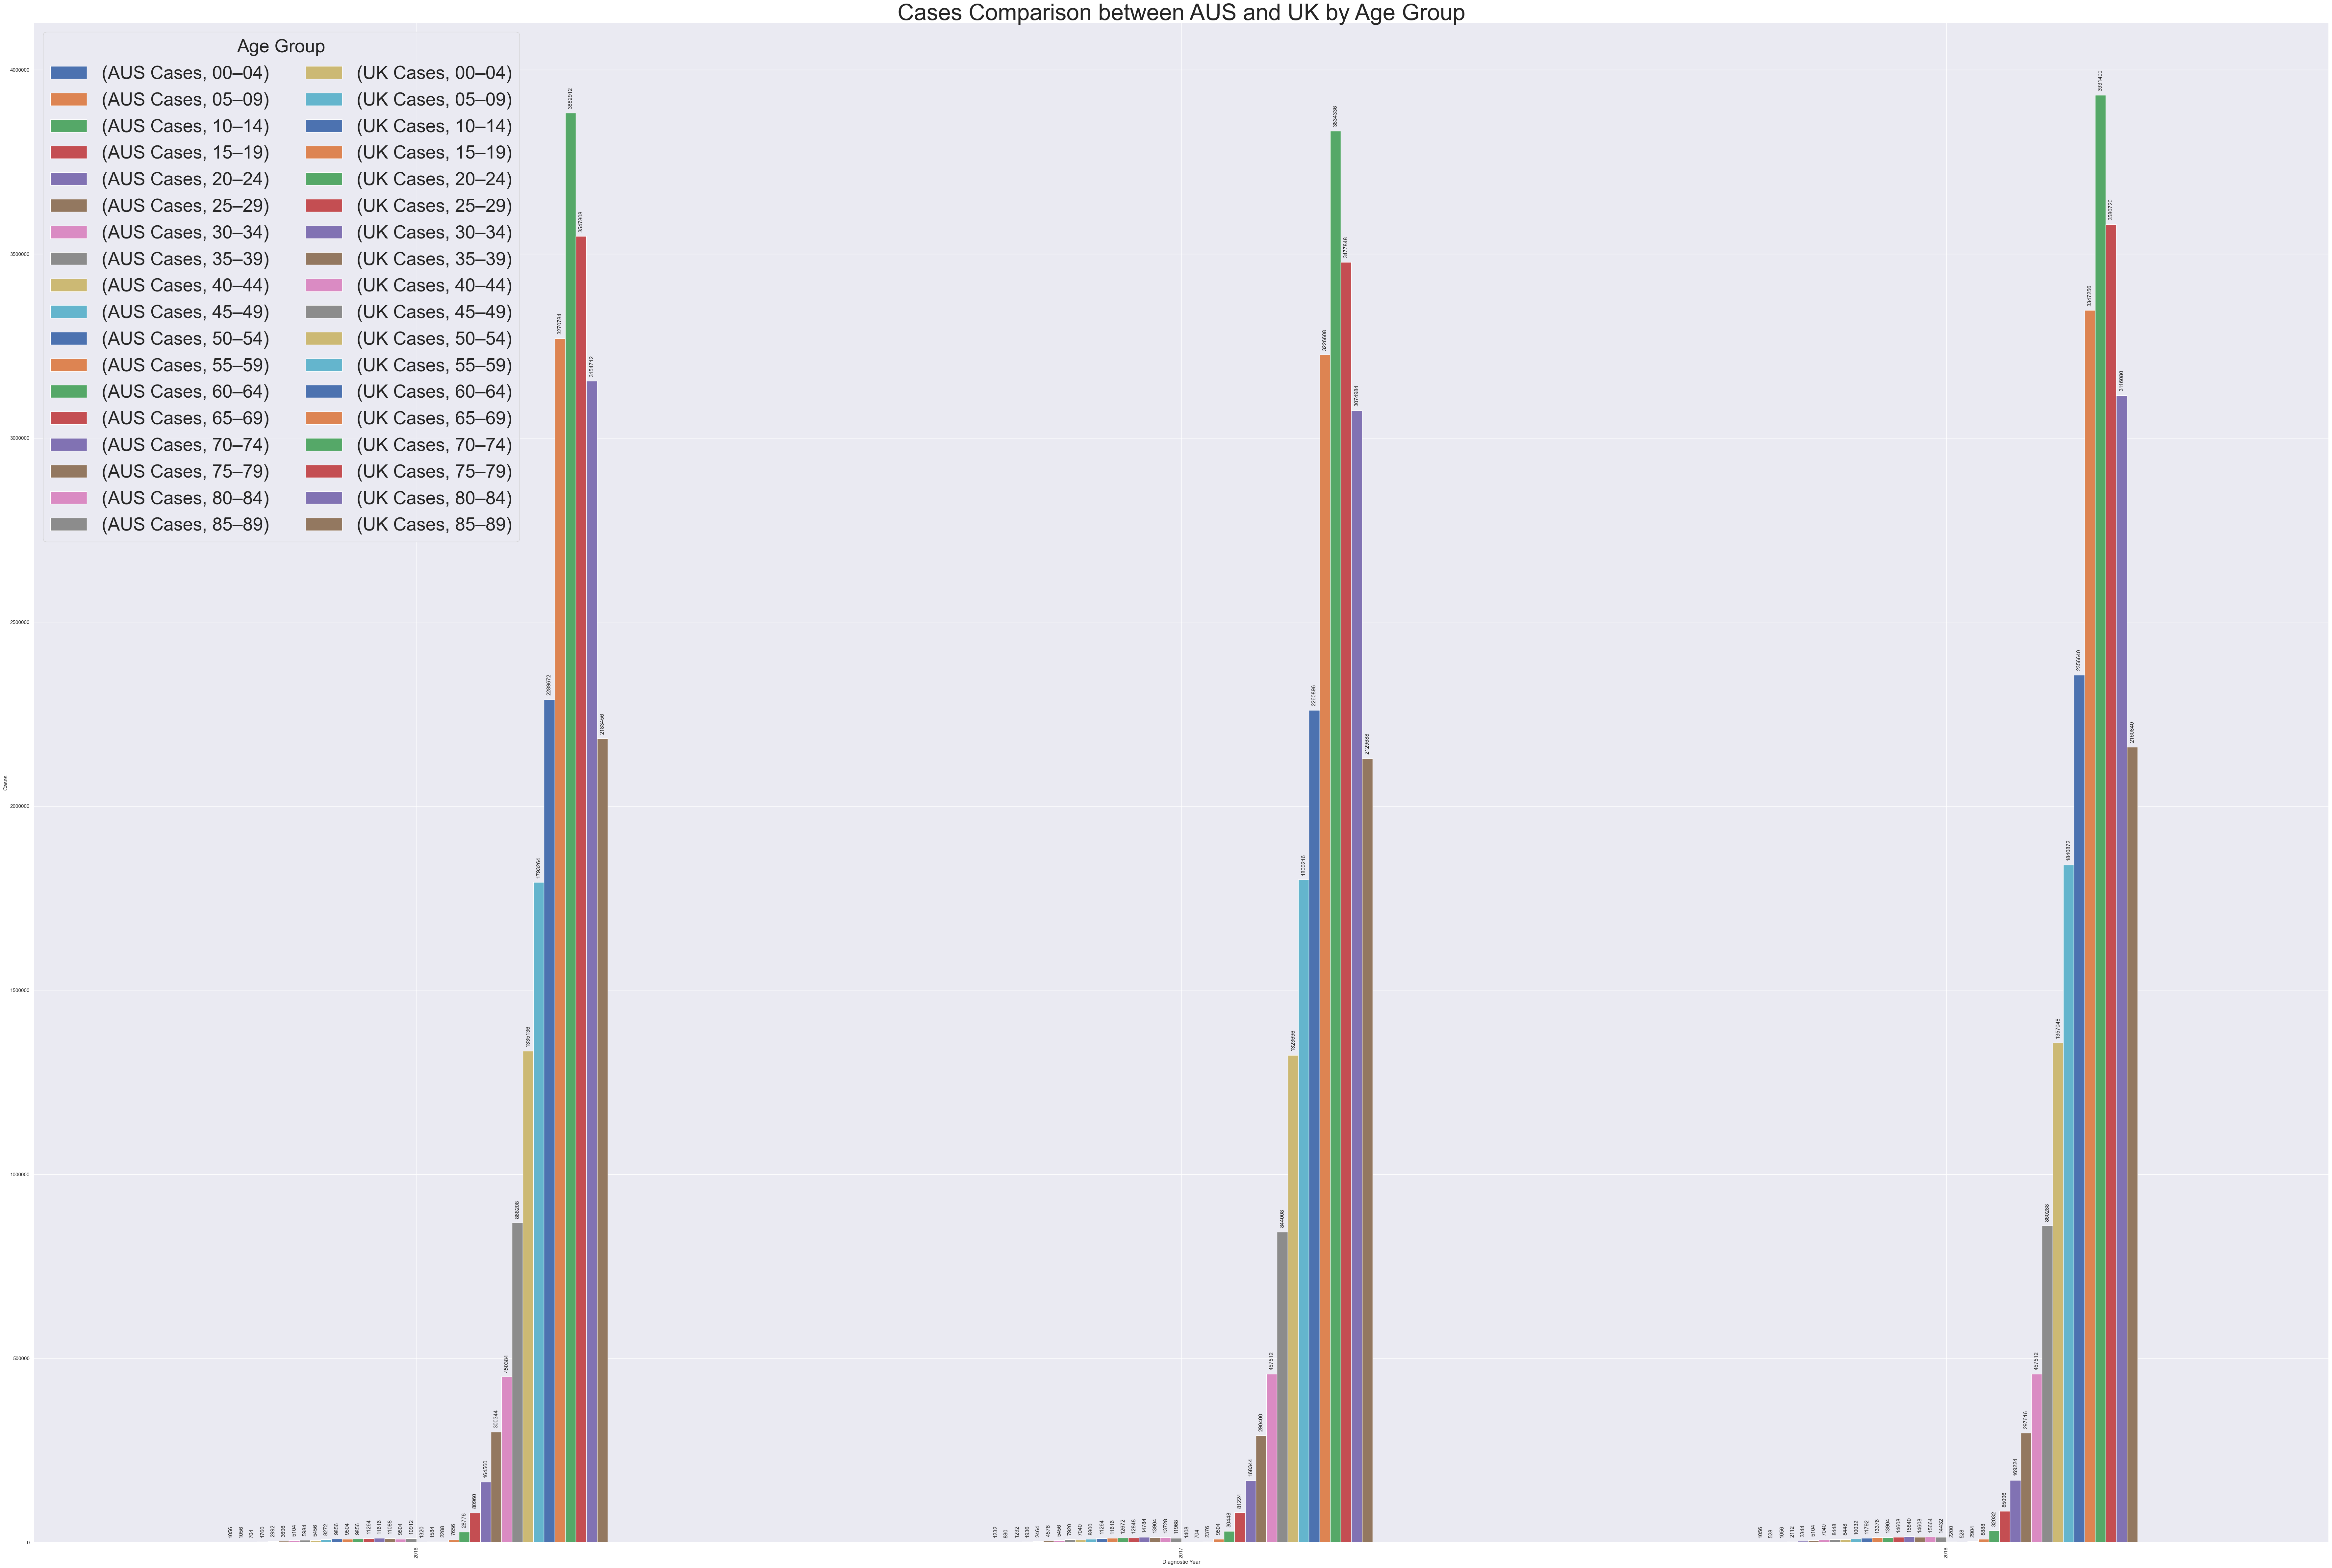

In [54]:
# Create a pivot table with 'DiagnosticYear' as index, 'Age group' as columns, and 'AUS Cases' and 'UK Cases' as values
Group_Uk_AUS_pivot = Group_Uk_AUS.pivot_table(index='DiagnosticYear', columns='Age group', values=['AUS Cases', 'UK Cases'])

# Set the style for the plot
sns.set(rc={'figure.figsize':(90,60)})

# Create a bar plot using seaborn
ax = Group_Uk_AUS_pivot.plot(kind='bar', stacked=False)

# Annotate each bar with its value on top
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 9), 
                textcoords='offset points', rotation='vertical')

# Set x-axis and y-axis labels, plot title, legend, and tick label format
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('Cases Comparison between AUS and UK by Age Group', fontsize=50)
plt.legend(title='Age Group', title_fontsize=40, loc='upper left', fontsize=40, ncol=2)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

# Show the plot
plt.show()

In [55]:
#Diagnostic year of 2016
# Filter the Group_Uk_AUS DataFrame for each diagnostic year
Testing = Group_Uk_AUS[(Group_Uk_AUS['DiagnosticYear'].isin([2016]))]
Testing1 = Group_Uk_AUS[(Group_Uk_AUS['DiagnosticYear'].isin([2017]))]
Testing2 = Group_Uk_AUS[(Group_Uk_AUS['DiagnosticYear'].isin([2018]))]

# Display the filtered datasets
print("Testing (Diagnostic Year 2016):")
print (Testing)

print("\nTesting1 (Diagnostic Year 2017):")
print (Testing1)

print("\nTesting2 (Diagnostic Year 2018):")
print (Testing2)

Testing (Diagnostic Year 2016):
    DiagnosticYear Age group  AUS Cases  UK Cases
0             2016     00–04       1056      1320
1             2016     05–09       1056      1584
2             2016     10–14        704      2288
3             2016     15–19       1760      7656
4             2016     20–24       2992     28776
5             2016     25–29       3696     80960
6             2016     30–34       5104    164560
7             2016     35–39       5984    300344
8             2016     40–44       5456    450384
9             2016     45–49       8272    868208
10            2016     50–54       9856   1335136
11            2016     55–59       9504   1793264
12            2016     60–64       9856   2289672
13            2016     65–69      11264   3270784
14            2016     70–74      11616   3882912
15            2016     75–79      11088   3547808
16            2016     80–84       9504   3154712
17            2016     85–89      10912   2183456

Testing1 (Diagnos

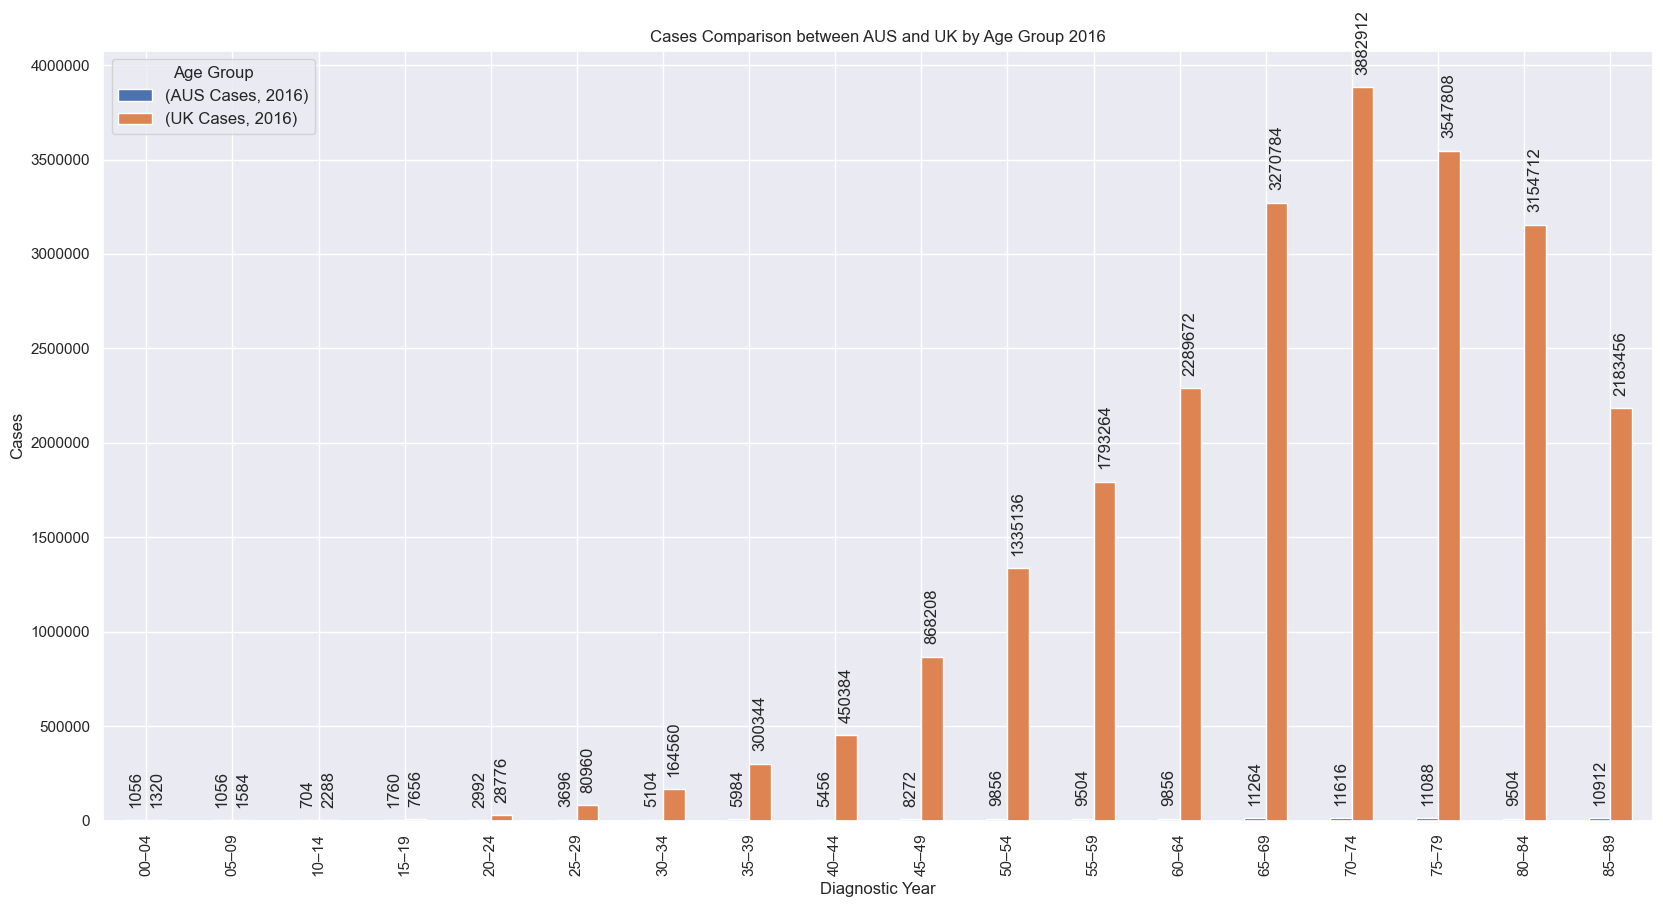

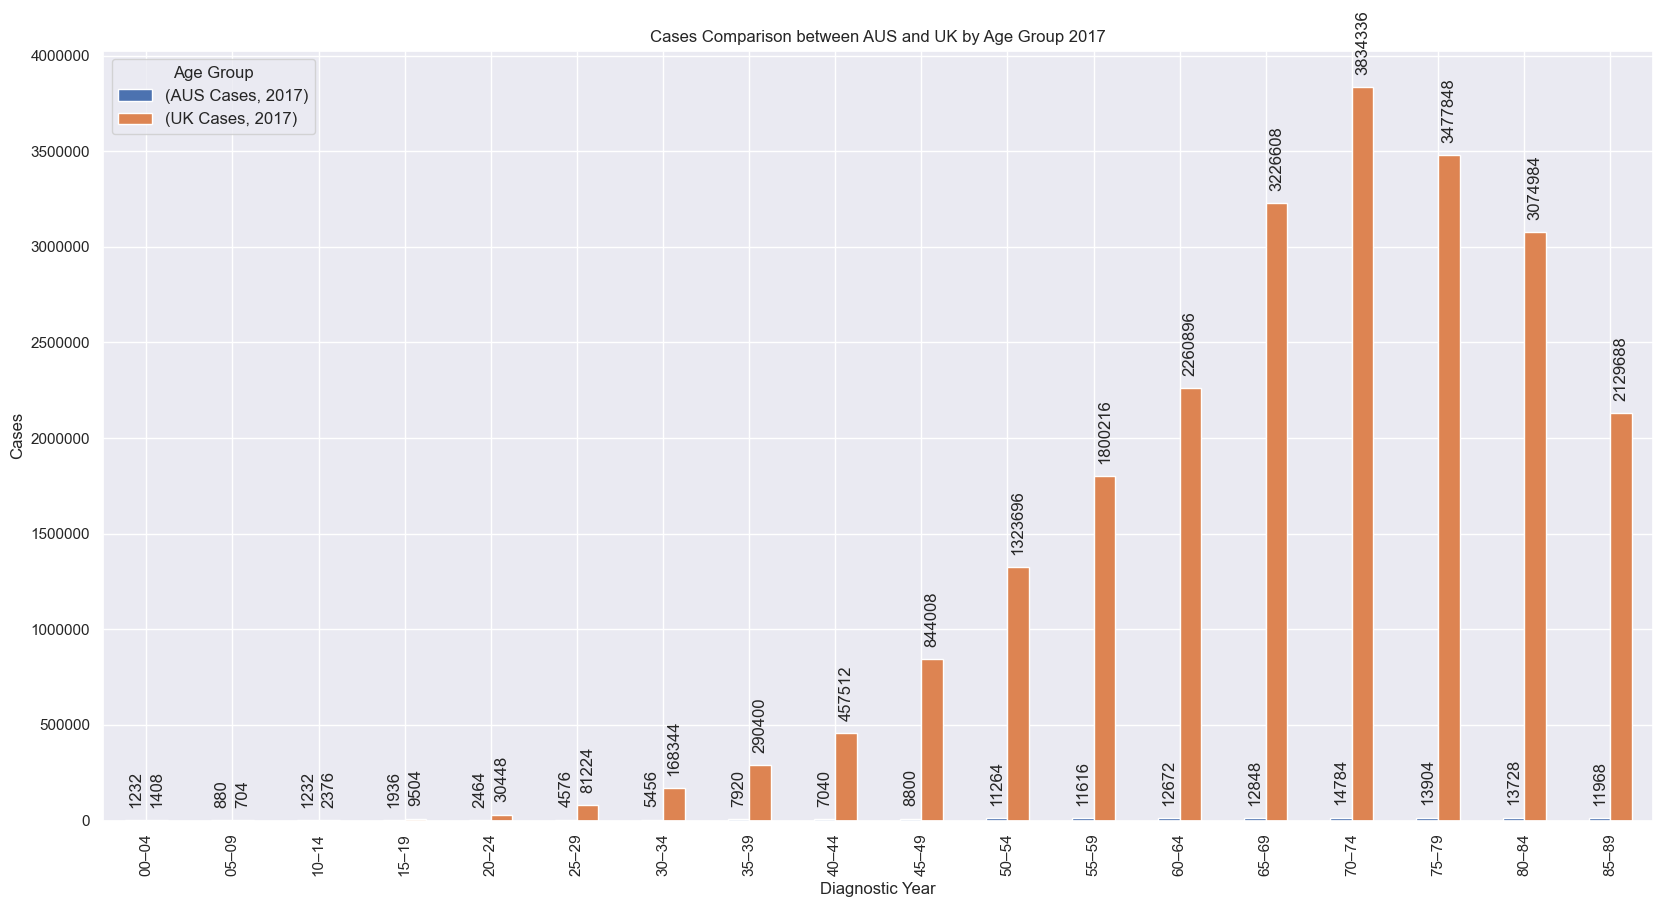

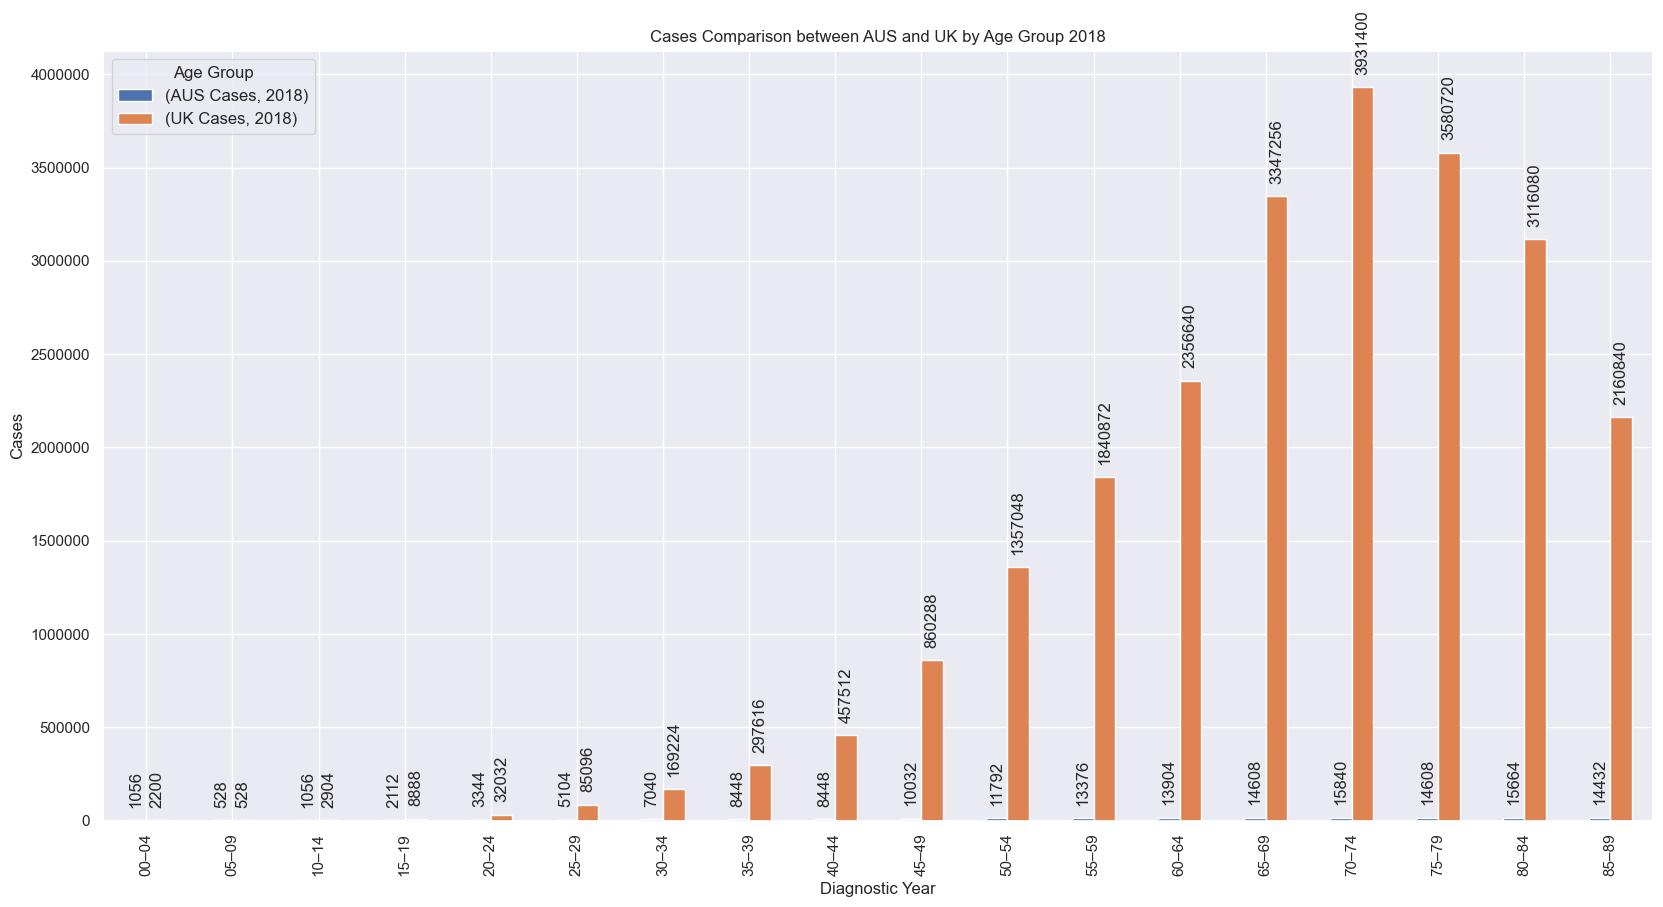

In [56]:
#Group Bar chart for the year 2016
Testing_Pivot = Testing.pivot_table(index='Age group', columns='DiagnosticYear', values=['AUS Cases', 'UK Cases'])

sns.set(rc={'figure.figsize':(20,10)})
ax = Testing_Pivot.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('Cases Comparison between AUS and UK by Age Group 2016')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

#Group Bar Chart for the year 2017
Testing_Pivot1 = Testing1.pivot_table(index='Age group', columns='DiagnosticYear', values=['AUS Cases', 'UK Cases'])

sns.set(rc={'figure.figsize':(20,10)})
ax = Testing_Pivot1.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('Cases Comparison between AUS and UK by Age Group 2017')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

#Group bar chart for the year 2018
Testing_Pivot2 = Testing2.pivot_table(index='Age group', columns='DiagnosticYear', values=['AUS Cases', 'UK Cases'])

sns.set(rc={'figure.figsize':(20,10)})
ax = Testing_Pivot2.plot(kind='bar', stacked=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 9), 
                textcoords='offset points', rotation='vertical') 
plt.xlabel('Diagnostic Year')
plt.ylabel('Cases')
plt.title('Cases Comparison between AUS and UK by Age Group 2018')
plt.legend(title='Age Group', loc = 'upper left', fontsize='medium')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

## Filtering UK data based on Year and converting into new dataset

In [57]:
merged_df10['DIAGNOSISDATEBEST'] = pd.to_datetime(merged_df10['DIAGNOSISDATEBEST'])
merged_df10['DiagnosticYear'] = merged_df10['DIAGNOSISDATEBEST'].dt.year
merged_df10.reset_index()
merged_df10

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0        10399610    Male   10000001        2017-03-31   
1        10694862    Male   10000002        2016-01-14   
2        11938715  Female   10000003        2018-12-10   
3        11869010    Male   10000004        2018-04-05   
4        11037077    Male   10000005        2018-04-23   
...           ...     ...        ...               ...   
1113580  11606763  Female   40158030        2017-08-24   
1113581  11441567  Female   40158031        2019-03-04   
1113582  11142034  Female   40158032        2018-12-17   
1113583  11286525  Female   40158033        2019-04-17   
1113584  10168833  Female   40158034        2019-08-05   

                                      SITE_ICD10_O2_3CHAR  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                             SITE_ICD10_O2  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                           SITE_ICD10R4_O2_3CHAR_FROM2013  \
0        Other and unspecified malignant neoplasm of skin   
1        Other and unspecified malignant neoplasm of skin   
2        Other and unspecified malignant neoplasm of skin   
3        Other and unspecified malignant neoplasm of skin   
4        Other and unspecified malignant neoplasm of skin   
...                                                   ...   
1113580                      Malignant neoplasm of breast   
1113581                      Malignant neoplasm of breast   
1113582                      Malignant neoplasm of breast   
1113583                      Malignant neoplasm of breast   
1113584                      Malignant neoplasm of breast   

                                  SITE_ICD10R4_O2_FROM2013  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upper limb, ...   
...                                                    ...   
1113580  Malignant neoplasm of lower-inner quadrant of ...   
1113581  Malignant neoplasm of upper-inner quadrant of ...   
1113582   Malignant neoplasm of breast of unspecified site   
1113583    Malignant neoplasm of central portion of breast   
1113584   Malignant neoplasm of breast of unspecified site   

                                         SITE_ICDO3REV2011  \
0        Other and unsp malignant neoplasm of skin of s...   
1        Other and unsp malignant neoplasm of skin, uns...   
2        Oth and unsp malig neoplasm skin/ ear and extr...   
3        Other and unsp malignant neoplasm of skin, uns...   
4        Oth and unsp malig neoplasm skin/ upp

In [58]:
UK_filtered_data = merged_df10[(merged_df10['DiagnosticYear'].isin([2016, 2017, 2018]))]
UK_patient_data = UK_filtered_data.groupby(['DiagnosticYear'])['PATIENTID'].count().reset_index()
UK_patient_data.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_patient_data

DiagnosticYear  No. of Patient (Uk)
0            2016               279547
1            2017               275570
2            2018               282576

## Importing Australian Dataset

In [59]:
Australian_dataset = pd.read_excel(r'downloaded_dataset\Australian_dataset.xlsx', sheet_name='raw_data')
Australian_dataset

Cancer site/type      Sex  \
0                                                 C00 Lip  Females   
1                                                 C00 Lip  Females   
2                                                 C00 Lip  Females   
3                                                 C00 Lip  Females   
4                                                 C00 Lip  Females   
...                                                   ...      ...   
130235  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130236  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130237  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130238  D47 Other cancers of lymphoid, haematopoietic ...    Males   
130239  D47 Other cancers of lymphoid, haematopoietic ...    Males   

       Age group at diagnosis  Year of diagnosis  Cases  Crude rate  \
0                       00–04               1982      0           0   
1                       00–04               1983      0           0   
2                       00–04               1984      0           0   
3                       00–04               1985      0           0   
4                       00–04               1986      0           0   
...                       ...                ...    ...         ...   
130235                Unknown               2014      0         NaN   
130236                Unknown               2015      0         NaN   
130237                Unknown               2016      0         NaN   
130238                Unknown               2017      0         NaN   
130239                Unknown               2018      0         NaN   

        Unnamed: 6  \
0              NaN   
1              NaN   
2              NaN   
3              NaN   
4              NaN   
...            ...   
130235         NaN   
130236         NaN   
130237         NaN   
130238         NaN   
130239         NaN   

        Caution:  Age-specific (crude) rates have been included in this release and can be accessed in the 'Raw data' tab. The age-specific crude rates are provided as background information only. Crude rates are not recommended for use within the pivot table because crude rates across time, across age groups or between sexes are not additive.  
0                                                     NaN                                                                                                                                                                                                                                                                                                  
1                                                     NaN                                                                                                                                                                                                                                                                                                  
2                                                     NaN                                                                                                                                                                                                                                                                                                  
3                                                     NaN                                                                                                                                                                                                                                                                                                  
4                                                     NaN                                                                                                                                                                                                                                                                                             

## Filtering Australian Data based on Year and converting into new dataset

In [60]:
Australian_filtered_data = Australian_dataset[(Australian_dataset['Year of diagnosis'].isin([2016, 2017, 2018]))]
Australian_patient_data = Australian_filtered_data.groupby(['Year of diagnosis'])['Cases'].sum().reset_index()
Australian_patient_data.rename(columns={'Year of diagnosis': 'DiagnosticYear' , 'Cases': 'No. of Patient (Australia)'}, inplace=True)
Australian_patient_data 

DiagnosticYear  No. of Patient (Australia)
0            2016                      137433
1            2017                      140196
2            2018                      146408

## Merging UK and Australian data into one dataframe

In [61]:
Patient_data = pd.merge(UK_patient_data, Australian_patient_data, on='DiagnosticYear', how='inner')
Patient_data

DiagnosticYear  No. of Patient (Uk)  No. of Patient (Australia)
0            2016               279547                      137433
1            2017               275570                      140196
2            2018               282576                      146408

## Visualising No. of cancer patient diagnosed each year in UK and Australia

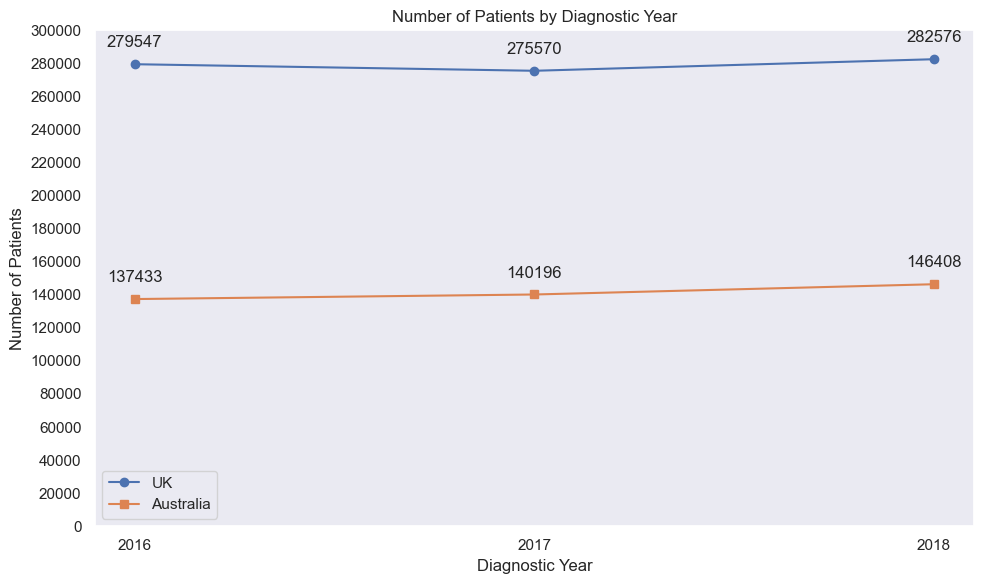

In [62]:
plt.figure(figsize=(10, 6))
 
# Plot data
plt.plot(Patient_data['DiagnosticYear'], Patient_data['No. of Patient (Uk)'], marker='o', label='UK')
plt.plot(Patient_data['DiagnosticYear'], Patient_data['No. of Patient (Australia)'], marker='s', label='Australia')

# Title and labels
plt.title('Number of Patients by Diagnostic Year')
plt.xlabel('Diagnostic Year')
plt.ylabel('Number of Patients')

# Customize axes ticks
plt.xticks(Patient_data['DiagnosticYear'])
plt.yticks(range(0, max(Patient_data['No. of Patient (Uk)']) + 20000, 20000))

# Legends and annotations
plt.legend()

# Annotations for UK values on the top
for x, y in zip(Patient_data['DiagnosticYear'], Patient_data['No. of Patient (Uk)']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom')

# Annotations for Australia values on the right
for x, y in zip(Patient_data['DiagnosticYear'], Patient_data['No. of Patient (Australia)']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom')

# Turn off grid lines
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()








## Filtering UK data based on Year and Gender

In [63]:
UK_filtered_data_cancer = merged_df10[(merged_df10['DiagnosticYear'].isin([2016, 2017, 2018]))]
UK_gender_data = UK_filtered_data.groupby(['DiagnosticYear', 'GENDER'])['PATIENTID'].count().reset_index()
UK_gender_data.rename(columns={'PATIENTID': 'No. of Patient (Uk)', 'GENDER': 'Gender'}, inplace=True)
UK_gender_data

DiagnosticYear                                             Gender  \
0            2016                                             Female   
1            2016  Indeterminate (Unable to be classified as eith...   
2            2016                                               Male   
3            2017                                             Female   
4            2017                                               Male   
5            2018                                             Female   
6            2018                                               Male   

   No. of Patient (Uk)  
0               126168  
1                    1  
2               153378  
3               123927  
4               151643  
5               123281  
6               159295

## Filtering Australian data based on Year and Gender

In [64]:
Australian_filtered_data_cancer = Australian_dataset[(Australian_dataset['Year of diagnosis'].isin([2016, 2017, 2018])) & (Australian_dataset['Sex'].isin(['Males', 'Females']))]
Australian_gender_data = Australian_filtered_data_cancer.groupby(['Year of diagnosis', 'Sex'])['Cases'].sum().reset_index()
Australian_gender_data.rename(columns={'Year of diagnosis': 'DiagnosticYear' , 'Cases': 'No. of Patient (Australia)', 'Sex': 'Gender'}, inplace=True)
Australian_gender_data['Gender'] = Australian_gender_data['Gender'].str.replace('s', '')
Australian_gender_data


DiagnosticYear  Gender  No. of Patient (Australia)
0            2016  Female                       62136
1            2016    Male                       75297
2            2017  Female                       62999
3            2017    Male                       77197
4            2018  Female                       65930
5            2018    Male                       80478

## Merging Uk and Australian Data into one dataframe

In [65]:
Gender_data = pd.merge(UK_gender_data, Australian_gender_data, on=['DiagnosticYear', 'Gender'], how='inner')
Gender_data

DiagnosticYear  Gender  No. of Patient (Uk)  No. of Patient (Australia)
0            2016  Female               126168                       62136
1            2016    Male               153378                       75297
2            2017  Female               123927                       62999
3            2017    Male               151643                       77197
4            2018  Female               123281                       65930
5            2018    Male               159295                       80478

## Visualising data based on no. of Patient and Gender

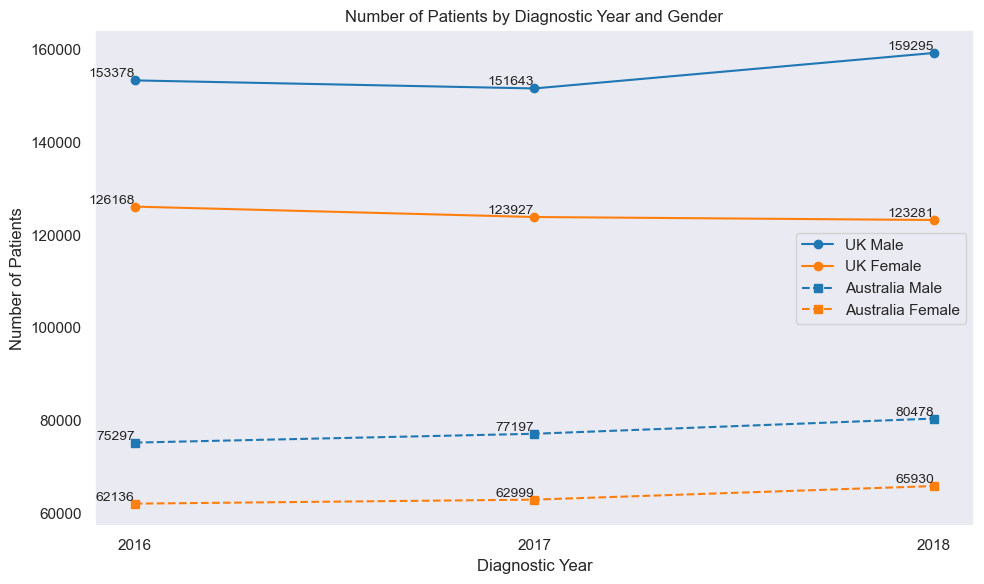

In [66]:

# Filter the data for 'Male' and 'Female' separately
uk_male_data = Gender_data[(Gender_data['Gender'] == 'Male')][['DiagnosticYear', 'No. of Patient (Uk)']]
uk_female_data = Gender_data[(Gender_data['Gender'] == 'Female')][['DiagnosticYear', 'No. of Patient (Uk)']]

australia_male_data = Gender_data[(Gender_data['Gender'] == 'Male')][['DiagnosticYear', 'No. of Patient (Australia)']]
australia_female_data = Gender_data[(Gender_data['Gender'] == 'Female')][['DiagnosticYear', 'No. of Patient (Australia)']]

# Plot settings
plt.figure(figsize=(10, 6))

# Plot data for UK
plt.plot(uk_male_data['DiagnosticYear'], uk_male_data['No. of Patient (Uk)'], marker='o', color='tab:blue', label='UK Male')
plt.plot(uk_female_data['DiagnosticYear'], uk_female_data['No. of Patient (Uk)'], marker='o', color='tab:orange', label='UK Female')

# Plot data for Australia
plt.plot(australia_male_data['DiagnosticYear'], australia_male_data['No. of Patient (Australia)'], marker='s', color='tab:blue', linestyle='dashed', label='Australia Male')
plt.plot(australia_female_data['DiagnosticYear'], australia_female_data['No. of Patient (Australia)'], marker='s', color='tab:orange', linestyle='dashed', label='Australia Female')

# Title and labels
plt.title('Number of Patients by Diagnostic Year and Gender')
plt.xlabel('Diagnostic Year')
plt.ylabel('Number of Patients')

# Customize axes ticks
plt.xticks(Gender_data['DiagnosticYear'].unique())

# Legends with labels
plt.legend()

# Add grid and set background color
plt.grid(False)

# Add labels for data points
for x, y in uk_male_data.iterrows():
    plt.text(y['DiagnosticYear'], y['No. of Patient (Uk)'], f"{y['No. of Patient (Uk)']}", ha='right', va='bottom', fontsize=10)

for x, y in uk_female_data.iterrows():
    plt.text(y['DiagnosticYear'], y['No. of Patient (Uk)'], f"{y['No. of Patient (Uk)']}", ha='right', va='bottom', fontsize=10)

for x, y in australia_male_data.iterrows():
    plt.text(y['DiagnosticYear'], y['No. of Patient (Australia)'], f"{y['No. of Patient (Australia)']}", ha='right', va='bottom', fontsize=10)

for x, y in australia_female_data.iterrows():
    plt.text(y['DiagnosticYear'], y['No. of Patient (Australia)'], f"{y['No. of Patient (Australia)']}", ha='right', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


## Filtering UK data based on number of different Cancer Care Plan Intent

In [67]:
UK_cancer_data = merged_df10.groupby(['CANCERCAREPLANINTENT'])['PATIENTID'].count().reset_index()
UK_cancer_data.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_cancer_data

CANCERCAREPLANINTENT  No. of Patient (Uk)
0             Curative               286570
1  No active treatment                15066
2         Non Curative                58000
3            Not known                48877

## Visualising distribution of different Cancer Care Plan Intent in Pie chart

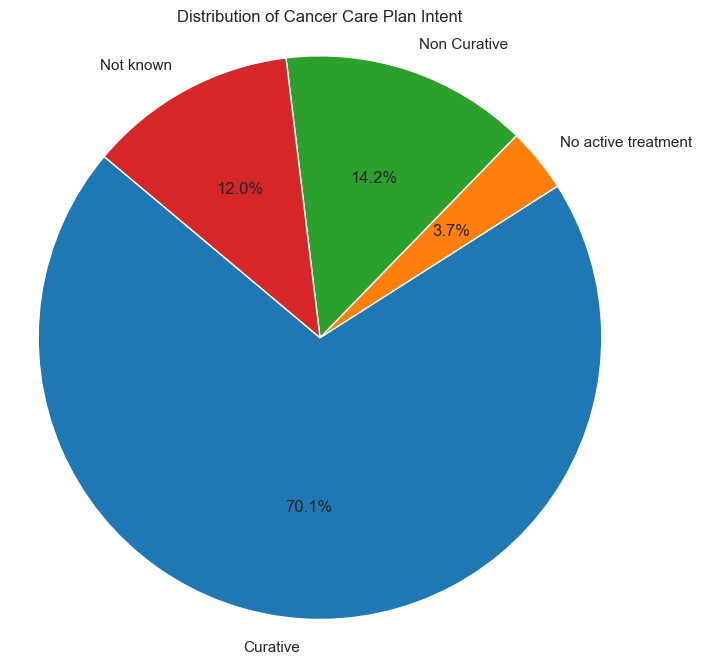

In [68]:
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a pie chart
plt.pie(UK_cancer_data['No. of Patient (Uk)'], labels=UK_cancer_data['CANCERCAREPLANINTENT'], autopct='%1.1f%%', startangle=140, colors=colors)

# Title
plt.title('Distribution of Cancer Care Plan Intent')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Filtering Uk Cancer Care Plan Intent data based on Age Intervals

In [69]:
# Create a column name 'Age Interval' 
total_interval = 10 
# Specified bins to binned AGE column with lower bound
merged_df10['AGE-INTERVAL'] = pd.cut(merged_df10['AGE'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, float('inf')], labels=False, include_lowest=True)

# Convert bin indices to interval strings, e.g., '00–04', '05–09', ...
merged_df10['AGE-INTERVAL'] = merged_df10['AGE-INTERVAL'].apply(lambda x: f"{x*10:02d}–{x*10+10:02d}" if x < total_interval - 1 else "90+")


In [70]:
UK_filtered_cancer_data = merged_df10[(merged_df10['CANCERCAREPLANINTENT'].isin(['Curative', 'Non Curative']))]
UK_cancer_data = UK_filtered_cancer_data.groupby(['AGE-INTERVAL', 'CANCERCAREPLANINTENT'])['PATIENTID'].count().reset_index()
UK_cancer_data.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)

# Add age intervals to the DataFrame
# age_intervals = pd.cut(pd.to_numeric(UK_cancer_data['AGE_INTERVAL'].str[:2]), bins=range(0, 101, 10), labels=[f'{i:02d}-{i+9:02d}' for i in range(0, 100, 10)])
# UK_cancer_data['Age Intervals'] = age_intervals

# Group by age intervals and cancer care plan intent, then calculate the sum of patients
UK_cancer_data = UK_cancer_data.groupby(['AGE-INTERVAL', 'CANCERCAREPLANINTENT'])['No. of Patient (Uk)'].sum().reset_index()
UK_cancer_data

AGE-INTERVAL CANCERCAREPLANINTENT  No. of Patient (Uk)
0         00–10             Curative                   26
1         00–10         Non Curative                    6
2         10–20             Curative                  160
3         10–20         Non Curative                   27
4         20–30             Curative                 1760
5         20–30         Non Curative                  165
6         30–40             Curative                 6906
7         30–40         Non Curative                  599
8         40–50             Curative                19548
9         40–50         Non Curative                 1956
10        50–60             Curative                43039
11        50–60         Non Curative                 6715
12        60–70             Curative                69930
13        60–70         Non Curative                13822
14        70–80             Curative                80991
15        70–80         Non Curative                18345
16        80–90             Curative                52240
17        80–90         Non Curative                13403
18          90+             Curative                11970
19          90+         Non Curative                 2962

## Visualising Curative vs Non-Curative Cancer for different Age Group

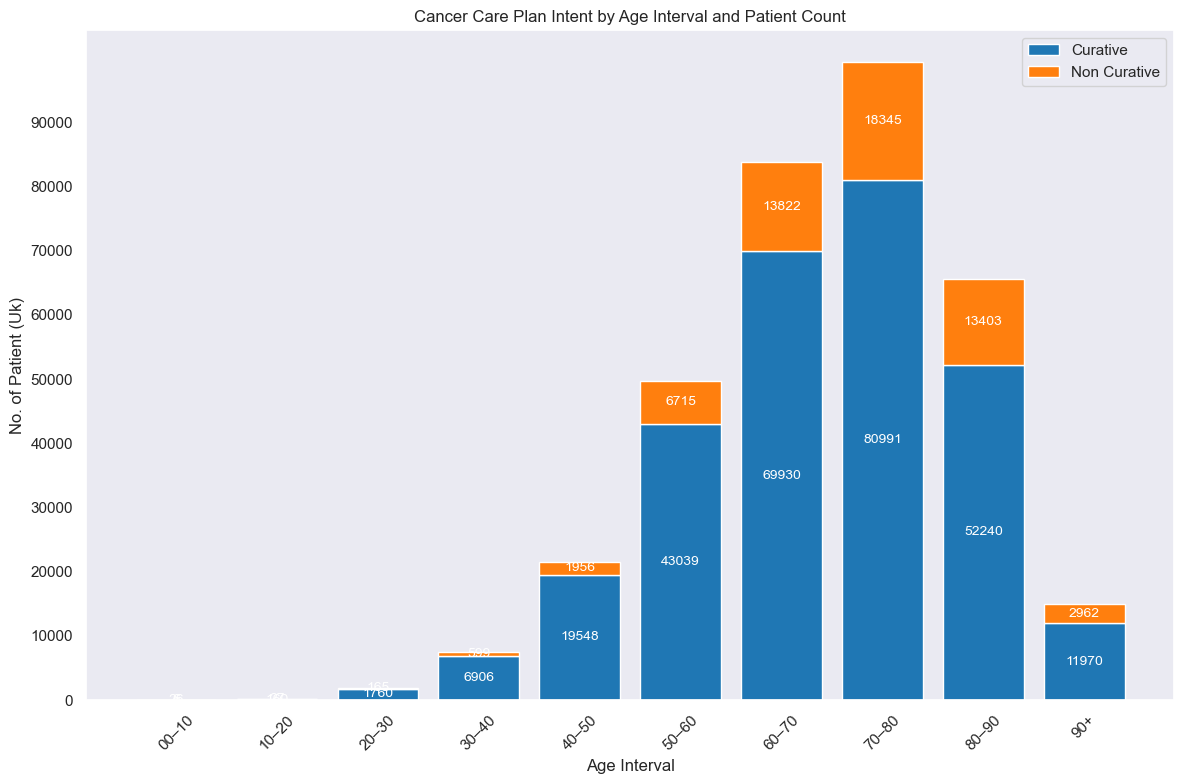

In [71]:

# Pivot the data for plotting
pivot_df = UK_cancer_data.pivot_table(index='AGE-INTERVAL', columns='CANCERCAREPLANINTENT', values='No. of Patient (Uk)', aggfunc='sum')

# Plot settings
plt.figure(figsize=(12, 8))

# Custom colors for Curative and Non Curative bars
colors = ['#1f77b4', '#ff7f0e']

# Create a stacked bar chart with labels
index = np.arange(len(pivot_df.index))
bar_width = 0.5

curative_bars = plt.bar(index, pivot_df['Curative'], color=colors[0], label='Curative')
non_curative_bars = plt.bar(index, pivot_df['Non Curative'], bottom=pivot_df['Curative'], color=colors[1], label='Non Curative')

# Add labels to the bars
for cur_bar, non_cur_bar in zip(curative_bars, non_curative_bars):
    cur_height = cur_bar.get_height()
    non_cur_height = non_cur_bar.get_height()
    plt.text(cur_bar.get_x() + cur_bar.get_width() / 2, cur_height / 2, str(int(cur_height)), ha='center', va='center', color='white', fontsize=10)
    plt.text(non_cur_bar.get_x() + non_cur_bar.get_width() / 2, cur_height + non_cur_height / 2, str(int(non_cur_height)), ha='center', va='center', color='white', fontsize=10)

# Title and labels
plt.title('Cancer Care Plan Intent by Age Interval and Patient Count')
plt.xlabel('Age Interval')
plt.ylabel('No. of Patient (Uk)')
plt.xticks(index, pivot_df.index, rotation=45)
plt.legend()

# Customize y-axis ticks
plt.yticks(range(0, max(UK_cancer_data['No. of Patient (Uk)']) + 10000, 10000))
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


In [128]:
UK_filtered_cancer_data = merged_df10[(merged_df10['GENDER'] == 'Female') & (merged_df10['CANCERCAREPLANINTENT'].isin(['Curative', 'Non Curative']))]
UK_cancer_dat = UK_filtered_cancer_data.groupby(['CANCERCAREPLANINTENT', 'GENDER'])['PATIENTID'].count().reset_index()
UK_cancer_dat.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_cancer_dat

CANCERCAREPLANINTENT  GENDER  No. of Patient (Uk)
0             Curative  Female               147736
1         Non Curative  Female                21223

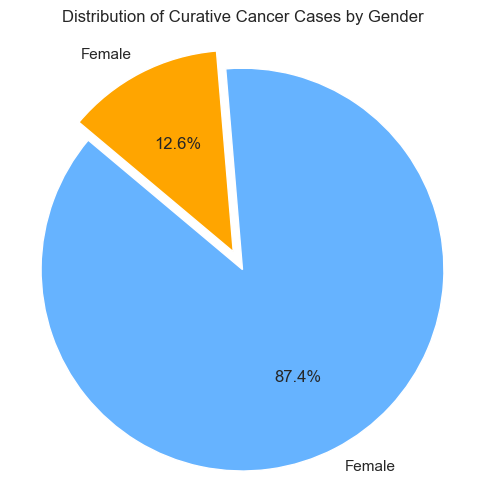

In [131]:
labels = UK_cancer_dat['GENDER']
sizes = UK_cancer_dat['No. of Patient (Uk)']
colors = ['#66b3ff', 'orange']  # Blue and green colors
explode = (0.1, 0)  # Explode the 1st slice (Curative) for emphasis

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Curative Cancer Cases by Gender')

# Show the plot
plt.show()


## Filtering Uk Cancer Care Plan Intent data based on Gender

In [72]:
UK_cancer_data1 = merged_df10.groupby(['CANCERCAREPLANINTENT', 'GENDER'])['PATIENTID'].count().reset_index()
UK_cancer_data1.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_cancer_data1

CANCERCAREPLANINTENT  GENDER  No. of Patient (Uk)
0             Curative  Female               147736
1             Curative    Male               138834
2  No active treatment  Female                 4666
3  No active treatment    Male                10400
4         Non Curative  Female                21223
5         Non Curative    Male                36777
6            Not known  Female                16778
7            Not known    Male                32099

## Visualising Uk Cancer Care Plan Intent data based on Age Interval

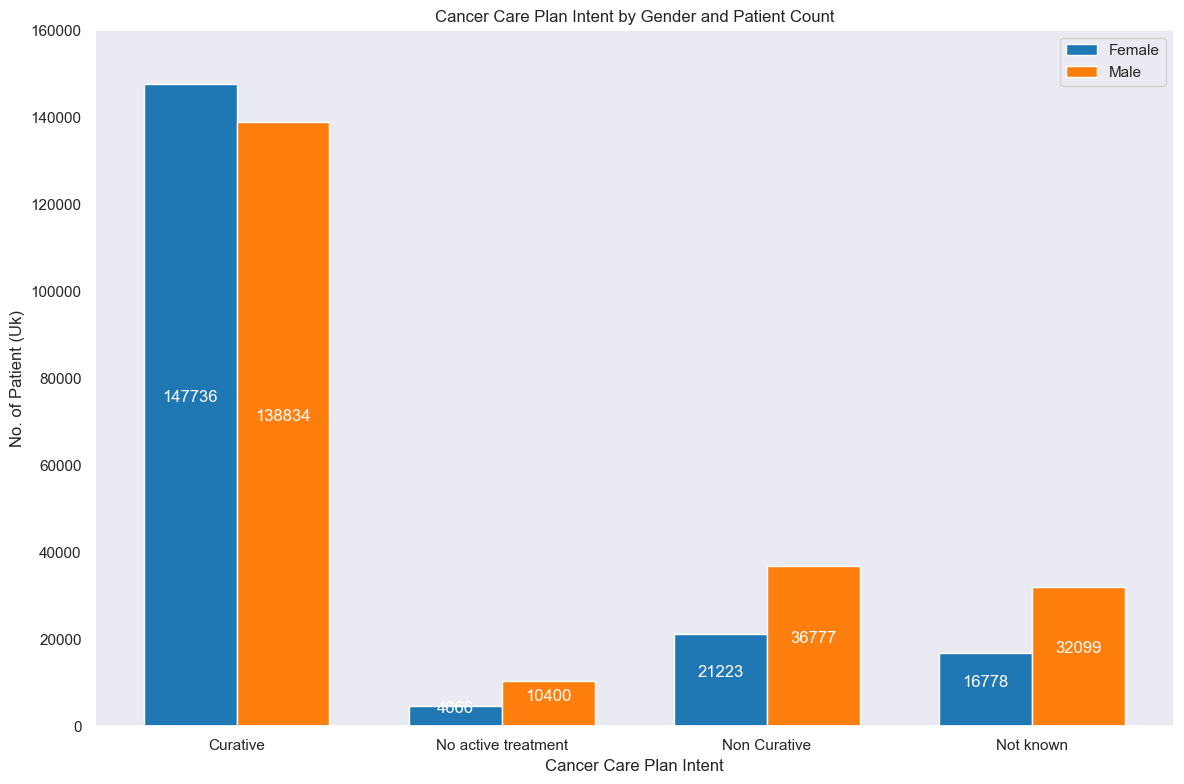

In [73]:
# Pivot the data for plotting
pivot_df = UK_cancer_data1.pivot(index='CANCERCAREPLANINTENT', columns='GENDER', values='No. of Patient (Uk)')

# Plot settings
plt.figure(figsize=(12, 8))


# Create a bar chart
bar_width = 0.35
index = np.arange(len(pivot_df.index))
bar1 = plt.bar(index, pivot_df['Female'], bar_width, label='Female', color=colors[0])
bar2 = plt.bar(index + bar_width, pivot_df['Male'], bar_width, label='Male', color=colors[1])

# Title and labels
plt.title('Cancer Care Plan Intent by Gender and Patient Count')
plt.xlabel('Cancer Care Plan Intent')
plt.ylabel('No. of Patient (Uk)')
plt.xticks(index + bar_width / 2, pivot_df.index)
plt.legend()

# Add labels to the bars
for container in plt.gca().containers:
    for bar in container:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, int(yval), va='bottom', ha='center', color='white', fontsize=12)

# Customize y-axis ticks
plt.yticks(range(0, max(UK_cancer_data1['No. of Patient (Uk)']) + 20000, 20000))
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()

## Filtering Curative vs Non-Curative UK cancer data based on Ethnicity

In [74]:
UK_filtered_cancer_ethinic_data = merged_df10[(merged_df10['CANCERCAREPLANINTENT'].isin(['Curative', 'Non Curative']))]
UK_cancer_data2 = UK_filtered_cancer_ethinic_data.groupby(['ETHNICITY', 'CANCERCAREPLANINTENT'])['PATIENTID'].count().reset_index()
UK_cancer_data2.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_cancer_data2

ETHNICITY CANCERCAREPLANINTENT  No. of Patient (Uk)
0                         8 OTHER             Curative                    1
1               ASIAN BANGLADESHI             Curative                  439
2               ASIAN BANGLADESHI         Non Curative                  111
3                    ASIAN INDIAN             Curative                 2752
4                    ASIAN INDIAN         Non Curative                  587
5                 ASIAN PAKISTANI             Curative                 1499
6                 ASIAN PAKISTANI         Non Curative                  312
7                   BLACK AFRICAN             Curative                 1874
8                   BLACK AFRICAN         Non Curative                  409
9                 BLACK CARIBBEAN             Curative                 2438
10                BLACK CARIBBEAN         Non Curative                  543
11   C ANY OTHER WHITE BACKGROUND             Curative                 9219
12   C ANY OTHER WHITE BACKGROUND         Non Curative                 1837
13                        CHINESE             Curative                  630
14                        CHINESE         Non Curative                  137
15   G ANY OTHER MIXED BACKGROUND             Curative                  513
16   G ANY OTHER MIXED BACKGROUND         Non Curative                  109
17   L ANY OTHER ASIAN BACKGROUND             Curative                 1559
18   L ANY OTHER ASIAN BACKGROUND         Non Curative                  333
19          MIXED WHITE AND ASIAN             Curative                  207
20          MIXED WHITE AND ASIAN         Non Curative                   43
21  MIXED WHITE AND BLACK AFRICAN             Curative                  201
22  MIXED WHITE AND BLACK AFRICAN         Non Curative                   33
23                     NOT STATED             Curative                11426
24                     NOT STATED         Non Curative                 2206
25   P ANY OTHER BLACK BACKGROUND             Curative                 1022
26   P ANY OTHER BLACK BACKGROUND         Non Curative                  226
27       S ANY OTHER ETHNIC GROUP             Curative                 3402
28       S ANY OTHER ETHNIC GROUP         Non Curative                  693
29                          WHITE             Curative                   28
30                          WHITE         Non Curative                    8
31      WHITE AND BLACK CARIBBEAN             Curative                  318
32      WHITE AND BLACK CARIBBEAN         Non Curative                   61
33                  WHITE BRITISH             Curative               235973
34                  WHITE BRITISH         Non Curative                48391
35                    WHITE IRISH             Curative                 2434
36                    WHITE IRISH         Non Curative                  555
37                    X NOT KNOWN             Curative                 2233
38                    X NOT KNOWN         Non Curative                  394

## Visualising Curative vs Non-Curative UK cancer data based on Ethnicity

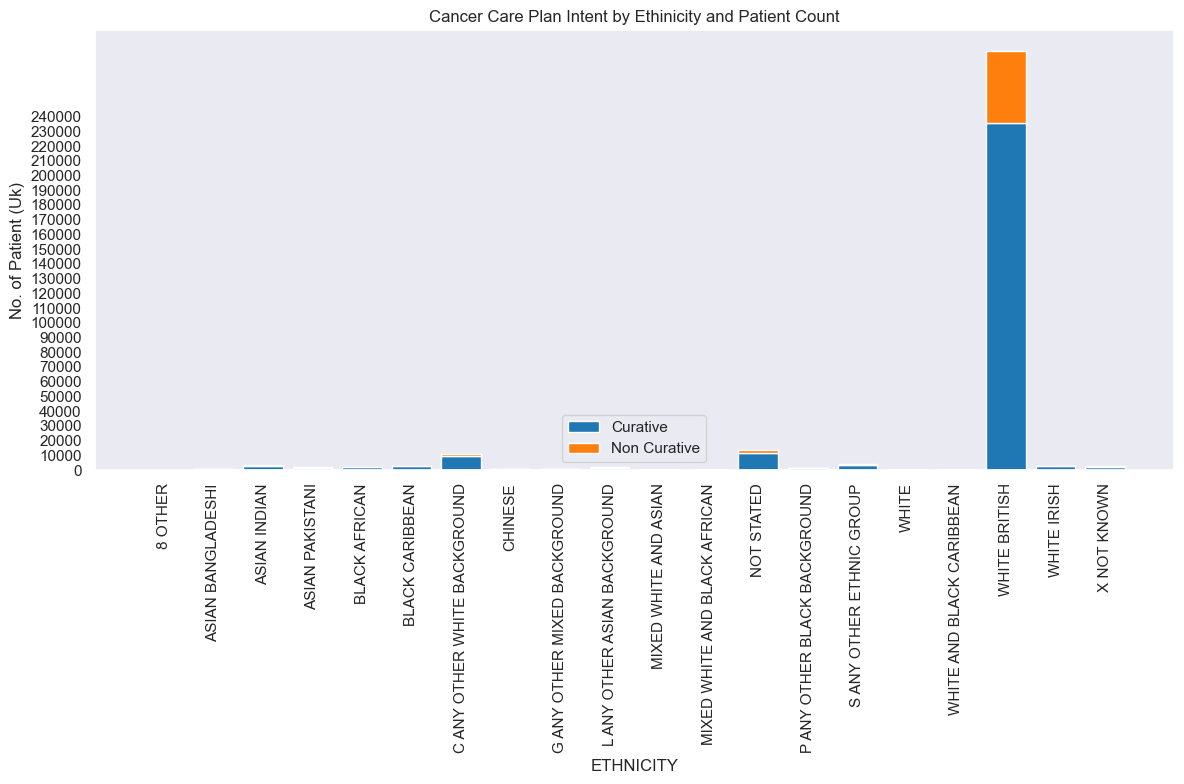

In [75]:
# Pivot the data for plotting
pivot_df = UK_cancer_data2.pivot_table(index='ETHNICITY', columns='CANCERCAREPLANINTENT', values='No. of Patient (Uk)', aggfunc='sum')

# Plot settings
plt.figure(figsize=(12, 8))

# Custom colors for Curative and Non Curative bars
colors = ['#1f77b4', '#ff7f0e']

# Create a stacked bar chart with labels
index = np.arange(len(pivot_df.index))
bar_width = 0.5

curative_bars = plt.bar(index, pivot_df['Curative'], color=colors[0], label='Curative')
non_curative_bars = plt.bar(index, pivot_df['Non Curative'], bottom=pivot_df['Curative'], color=colors[1], label='Non Curative')


# Title and labels
plt.title('Cancer Care Plan Intent by Ethinicity and Patient Count')
plt.xlabel('ETHNICITY')
plt.ylabel('No. of Patient (Uk)')
plt.xticks(index, pivot_df.index, rotation=90)
plt.legend()

# Customize y-axis ticks
plt.yticks(range(0, max(UK_cancer_data2['No. of Patient (Uk)']) + 10000, 10000))
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()

## Filtering Curative vs Non-Curative UK cancer data based on Ethnicity after removing Outliers

In [76]:
UK_filtered_cancer_ethinic_data3 = merged_df10[(merged_df10['CANCERCAREPLANINTENT'].isin(['Curative', 'Non Curative'])) & (merged_df10['ETHNICITY'] != 'WHITE BRITISH')]
UK_cancer_data3 = UK_filtered_cancer_ethinic_data3.groupby(['ETHNICITY', 'CANCERCAREPLANINTENT'])['PATIENTID'].count().reset_index()
UK_cancer_data3.rename(columns={'PATIENTID': 'No. of Patient (Uk)'}, inplace=True)
UK_cancer_data3

ETHNICITY CANCERCAREPLANINTENT  No. of Patient (Uk)
0                         8 OTHER             Curative                    1
1               ASIAN BANGLADESHI             Curative                  439
2               ASIAN BANGLADESHI         Non Curative                  111
3                    ASIAN INDIAN             Curative                 2752
4                    ASIAN INDIAN         Non Curative                  587
5                 ASIAN PAKISTANI             Curative                 1499
6                 ASIAN PAKISTANI         Non Curative                  312
7                   BLACK AFRICAN             Curative                 1874
8                   BLACK AFRICAN         Non Curative                  409
9                 BLACK CARIBBEAN             Curative                 2438
10                BLACK CARIBBEAN         Non Curative                  543
11   C ANY OTHER WHITE BACKGROUND             Curative                 9219
12   C ANY OTHER WHITE BACKGROUND         Non Curative                 1837
13                        CHINESE             Curative                  630
14                        CHINESE         Non Curative                  137
15   G ANY OTHER MIXED BACKGROUND             Curative                  513
16   G ANY OTHER MIXED BACKGROUND         Non Curative                  109
17   L ANY OTHER ASIAN BACKGROUND             Curative                 1559
18   L ANY OTHER ASIAN BACKGROUND         Non Curative                  333
19          MIXED WHITE AND ASIAN             Curative                  207
20          MIXED WHITE AND ASIAN         Non Curative                   43
21  MIXED WHITE AND BLACK AFRICAN             Curative                  201
22  MIXED WHITE AND BLACK AFRICAN         Non Curative                   33
23                     NOT STATED             Curative                11426
24                     NOT STATED         Non Curative                 2206
25   P ANY OTHER BLACK BACKGROUND             Curative                 1022
26   P ANY OTHER BLACK BACKGROUND         Non Curative                  226
27       S ANY OTHER ETHNIC GROUP             Curative                 3402
28       S ANY OTHER ETHNIC GROUP         Non Curative                  693
29                          WHITE             Curative                   28
30                          WHITE         Non Curative                    8
31      WHITE AND BLACK CARIBBEAN             Curative                  318
32      WHITE AND BLACK CARIBBEAN         Non Curative                   61
33                    WHITE IRISH             Curative                 2434
34                    WHITE IRISH         Non Curative                  555
35                    X NOT KNOWN             Curative                 2233
36                    X NOT KNOWN         Non Curative                  394

## Visualising Curative vs Non-Curative UK cancer data based on Ethnicity after removing Outliers

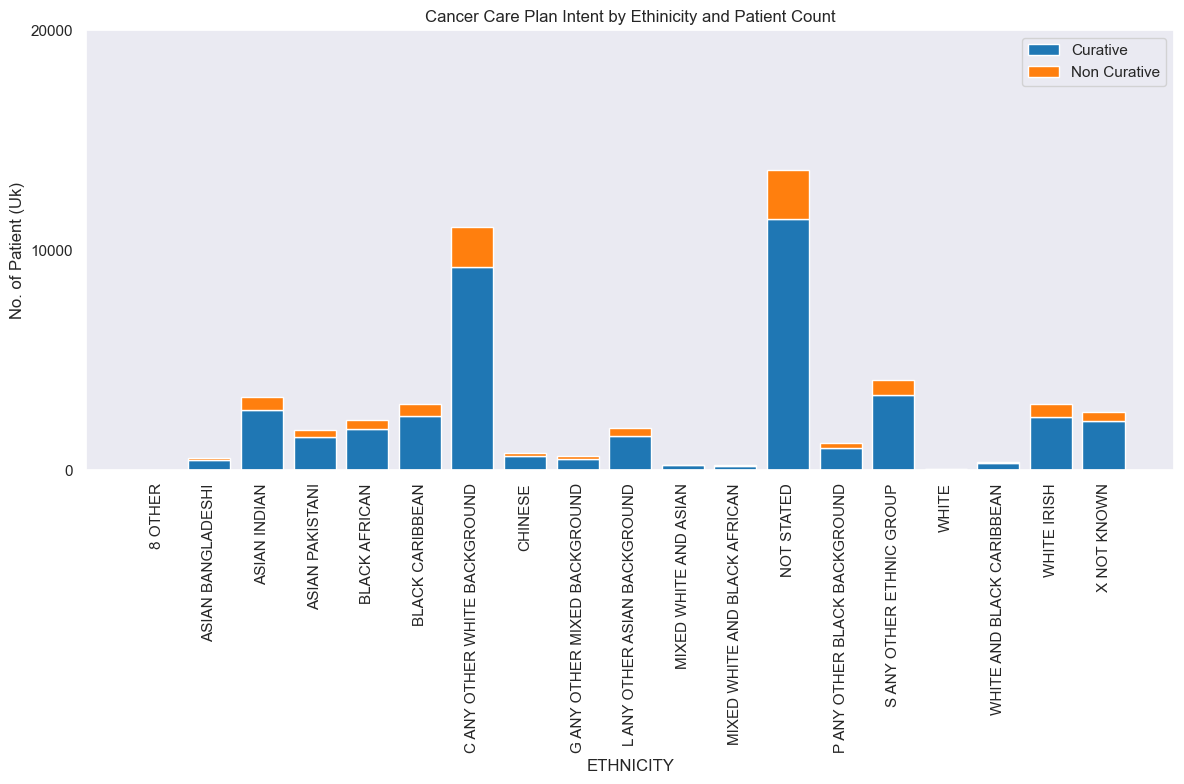

In [77]:
pivot_df = UK_cancer_data3.pivot_table(index='ETHNICITY', columns='CANCERCAREPLANINTENT', values='No. of Patient (Uk)', aggfunc='sum')

# Plot settings
plt.figure(figsize=(12, 8))

# Custom colors for Curative and Non Curative bars
colors = ['#1f77b4', '#ff7f0e']

# Create a stacked bar chart with labels
index = np.arange(len(pivot_df.index))
bar_width = 0.5

curative_bars = plt.bar(index, pivot_df['Curative'], color=colors[0], label='Curative')
non_curative_bars = plt.bar(index, pivot_df['Non Curative'], bottom=pivot_df['Curative'], color=colors[1], label='Non Curative')


# Title and labels
plt.title('Cancer Care Plan Intent by Ethinicity and Patient Count')
plt.xlabel('ETHNICITY')
plt.ylabel('No. of Patient (Uk)')
plt.xticks(index, pivot_df.index, rotation=90)
plt.legend()

# Customize y-axis ticks
plt.yticks(range(0, max(UK_cancer_data3['No. of Patient (Uk)']) + 10000, 10000))
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()

## Calculating Comorbidities in Patient

In [78]:
UK_unique_patient_df = merged_df10.drop_duplicates(subset='PATIENTID', keep='first')
comorbidities_count = UK_unique_patient_df['COMORBIDITIES_27_03'].str.split(',').explode().reset_index()
comorbidities_count['COMORBIDITIES_27_03'] = comorbidities_count['COMORBIDITIES_27_03'].str.lstrip('0')
value_counts= comorbidities_count.groupby('index')['COMORBIDITIES_27_03'].count().reset_index()
UK_comobidities_patientno_data= value_counts['COMORBIDITIES_27_03'].value_counts().reset_index(name='No.of Patient(UK)')
UK_comobidities_patientno_data.rename(columns={'index': 'Count of other diseases in Patient'}, inplace=True)
UK_comobidities_patientno_data

Count of other diseases in Patient  No.of Patient(UK)
0                                    0             839728
1                                    1             119770
2                                    2              53398
3                                    3              22495
4                                    4               8930
5                                    5               3040
6                                    6                972
7                                    7                199
8                                    8                 36
9                                   12                  3
10                                   9                  3
11                                  10                  1

## Extracting Comorbidities from Lookup table

In [79]:
Comorbidities = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zcomorbidities')
Comorbidities

Code                  Description  Charlon score  \
0      1  Acute Myocardial Infarction              1   
1      2     Congestive Heart Failure              1   
2      3  Peripheral Vascular Disease              1   
3      4   Cerebral Vascular Accident              1   
4      5                     Dementia              1   
5      6            Pulmonary Disease              1   
6      7   Connective Tissue Disorder              1   
7      8                 Peptic Ulcer              1   
8      9                     Diabetes              1   
9     10       Diabetes Complications              2   
10    11                   Paraplegia              2   
11    12                Renal Disease              2   
12    13                       Cancer              2   
13    14            Metastatic Cancer            NaN   
14    15                Liver Disease              1   
15    17         Severe Liver Disease              3   
16    16                          HIV              6   

                                                Notes  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                       Only highest score is counted  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12  Derived from cancer registry data rather than ...  
13                                                NaN  
14                      Only highest score is counted  
15                                                NaN  
16                                                NaN

## Spliting multiple comorbidities value in form of list and summing up the count

In [80]:
comorbidities_count = merged_df10['COMORBIDITIES_27_03'].str.split(',').explode().value_counts().reset_index()
comorbidities_count.columns = ['COMORBIDITIES', 'VALUE_COUNT']
comorbidity_grouped_data = comorbidities_count.groupby('COMORBIDITIES')['VALUE_COUNT'].sum().reset_index()
comorbidity_grouped_data.rename(columns={'VALUE_COUNT': 'No. of Patient (Uk)'}, inplace=True)
comorbidity_grouped_data['COMORBIDITIES'] = comorbidity_grouped_data['COMORBIDITIES'].str.lstrip('0')
comorbidity_grouped_data

COMORBIDITIES  No. of Patient (Uk)
0              1                39860
1              2                29853
2              3                20681
3              4                27905
4              5                16108
5              6                81268
6              7                18153
7              8                 7610
8              9                69027
9             10                 7756
10            11                 4641
11            12                45517
12            13                21868
13            15                 4117
14            17                 8698

## Merging Comorbidities into UK cancer data

In [81]:
Comorbidities= Comorbidities.astype(str)
UK_comorbidities_data = pd.merge(comorbidity_grouped_data, Comorbidities, left_on='COMORBIDITIES', right_on='Code', how='left')
UK_comorbidities_data['COMORBIDITIES'] = UK_comorbidities_data['Description']
UK_comorbidities_data.drop(['Code', 'Description', 'Charlon score', 'Notes'], axis=1, inplace=True)
UK_comorbidities_data

COMORBIDITIES  No. of Patient (Uk)
0   Acute Myocardial Infarction                39860
1      Congestive Heart Failure                29853
2   Peripheral Vascular Disease                20681
3    Cerebral Vascular Accident                27905
4                      Dementia                16108
5             Pulmonary Disease                81268
6    Connective Tissue Disorder                18153
7                  Peptic Ulcer                 7610
8                      Diabetes                69027
9        Diabetes Complications                 7756
10                   Paraplegia                 4641
11                Renal Disease                45517
12                       Cancer                21868
13                Liver Disease                 4117
14         Severe Liver Disease                 8698

## Visualising Comorbidities for UK data in bar graph

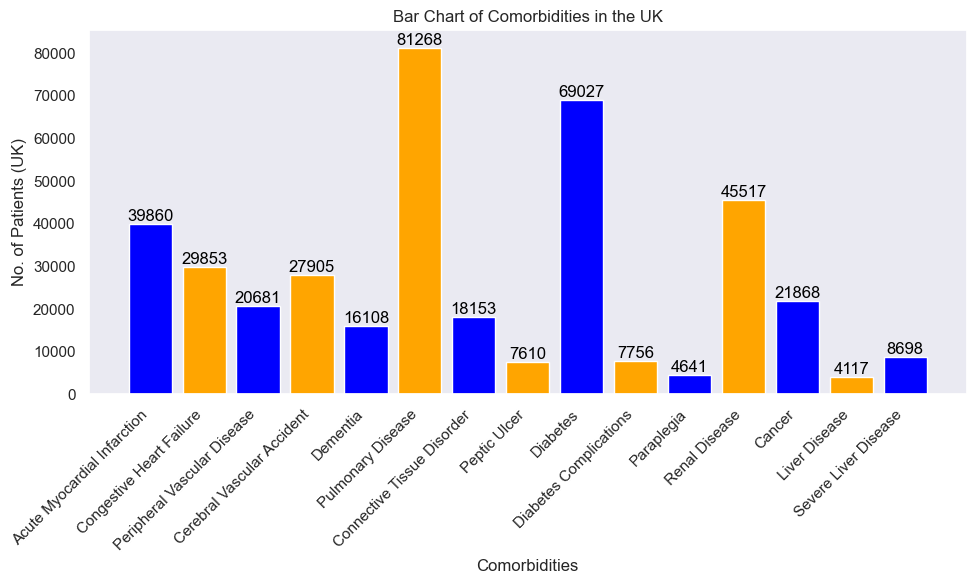

In [82]:
filtered_data = UK_comorbidities_data.dropna(subset=['COMORBIDITIES'])

plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'blue', 'orange']

bars = plt.bar(filtered_data['COMORBIDITIES'], filtered_data['No. of Patient (Uk)'],
        color=colors)

plt.xlabel('Comorbidities')
plt.ylabel('No. of Patients (UK)')
plt.title('Bar Chart of Comorbidities in the UK')
plt.xticks(rotation=45, ha='right')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', color='black')
    
# Show the graph
plt.grid(False)
plt.tight_layout()
plt.show()


## Filtering data for male patient based on different Comobidities

In [83]:
comorbidities_filtered_data_male = merged_df10[(merged_df10['GENDER'] == 'Male')]
comorbidities_count_male = comorbidities_filtered_data_male['COMORBIDITIES_27_03'].str.split(',').explode().value_counts().reset_index()
comorbidities_count_male.columns = ['COMORBIDITIES', 'No. of Patient (Uk)']
comorbidity_grouped_data_male = comorbidities_count_male.groupby('COMORBIDITIES')['No. of Patient (Uk)'].sum().reset_index()
comorbidity_grouped_data_male['COMORBIDITIES'] = comorbidity_grouped_data_male['COMORBIDITIES'].str.lstrip('0')
comorbidity_grouped_data_male

COMORBIDITIES  No. of Patient (Uk)
0              1                24357
1              2                17032
2              3                12569
3              4                16133
4              5                 8643
5              6                45746
6              7                10025
7              8                 4410
8              9                39996
9             10                 4485
10            11                 2647
11            12                26288
12            13                13150
13            15                 2313
14            17                 4913

## Merging filtered dataframe and Comobidities in one for male

In [84]:
Comorbidities= Comorbidities.astype(str)
UK_comorbidities_data_male = pd.merge(comorbidity_grouped_data_male, Comorbidities, left_on='COMORBIDITIES', right_on='Code', how='left')
UK_comorbidities_data_male
UK_comorbidities_data_male['COMORBIDITIES'] = UK_comorbidities_data_male['Description']
UK_comorbidities_data_male.drop(['Code', 'Description', 'Charlon score', 'Notes'], axis=1, inplace=True)
UK_comorbidities_data_male

COMORBIDITIES  No. of Patient (Uk)
0   Acute Myocardial Infarction                24357
1      Congestive Heart Failure                17032
2   Peripheral Vascular Disease                12569
3    Cerebral Vascular Accident                16133
4                      Dementia                 8643
5             Pulmonary Disease                45746
6    Connective Tissue Disorder                10025
7                  Peptic Ulcer                 4410
8                      Diabetes                39996
9        Diabetes Complications                 4485
10                   Paraplegia                 2647
11                Renal Disease                26288
12                       Cancer                13150
13                Liver Disease                 2313
14         Severe Liver Disease                 4913

## Visualising male Comobidities in Bar chart

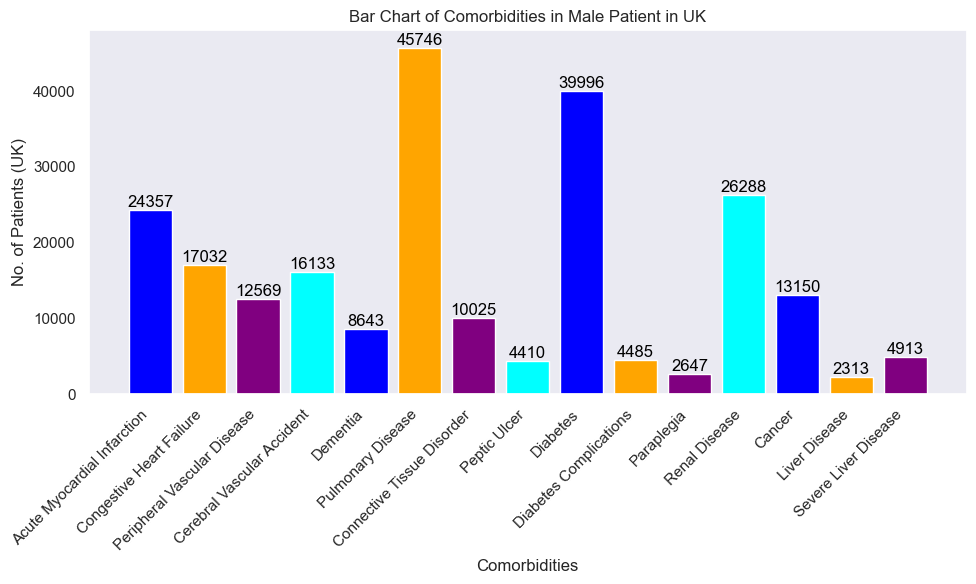

In [85]:
filtered_data_male = UK_comorbidities_data_male.dropna(subset=['COMORBIDITIES'])

plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'purple', 'cyan']

bars = plt.bar(filtered_data_male['COMORBIDITIES'], filtered_data_male['No. of Patient (Uk)'],
        color=colors)

plt.xlabel('Comorbidities')
plt.ylabel('No. of Patients (UK)')
plt.title('Bar Chart of Comorbidities in Male Patient in UK')
plt.xticks(rotation=45, ha='right')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', color='black')
    
# Show the graph
plt.grid(False)
plt.tight_layout()
plt.show()

## Filtering data for female patient based on different Comobidities

In [86]:
comorbidities_filtered_data_female = merged_df10[(merged_df10['GENDER'] == 'Female')]
comorbidities_count_female = comorbidities_filtered_data_female['COMORBIDITIES_27_03'].str.split(',').explode().value_counts().reset_index()
comorbidities_count_female.columns = ['COMORBIDITIES', 'No. of Patient (Uk)']
comorbidity_grouped_data_female = comorbidities_count_female.groupby('COMORBIDITIES')['No. of Patient (Uk)'].sum().reset_index()
comorbidity_grouped_data_female['COMORBIDITIES'] = comorbidity_grouped_data_male['COMORBIDITIES'].str.lstrip('0')
comorbidity_grouped_data_female

COMORBIDITIES  No. of Patient (Uk)
0              1                15503
1              2                12821
2              3                 8112
3              4                11772
4              5                 7465
5              6                35522
6              7                 8128
7              8                 3200
8              9                29031
9             10                 3271
10            11                 1994
11            12                19229
12            13                 8718
13            15                 1804
14            17                 3785

## Merging filtered dataframe and Comobidities in one for male

In [87]:
Comorbidities= Comorbidities.astype(str)
UK_comorbidities_data_female = pd.merge(comorbidity_grouped_data_female, Comorbidities, left_on='COMORBIDITIES', right_on='Code', how='left')
UK_comorbidities_data_female
UK_comorbidities_data_female['COMORBIDITIES'] = UK_comorbidities_data_female['Description']
UK_comorbidities_data_female.drop(['Code', 'Description', 'Charlon score', 'Notes'], axis=1, inplace=True)
UK_comorbidities_data_female

COMORBIDITIES  No. of Patient (Uk)
0   Acute Myocardial Infarction                15503
1      Congestive Heart Failure                12821
2   Peripheral Vascular Disease                 8112
3    Cerebral Vascular Accident                11772
4                      Dementia                 7465
5             Pulmonary Disease                35522
6    Connective Tissue Disorder                 8128
7                  Peptic Ulcer                 3200
8                      Diabetes                29031
9        Diabetes Complications                 3271
10                   Paraplegia                 1994
11                Renal Disease                19229
12                       Cancer                 8718
13                Liver Disease                 1804
14         Severe Liver Disease                 3785

## Visualising female Comobidities in Bar chart

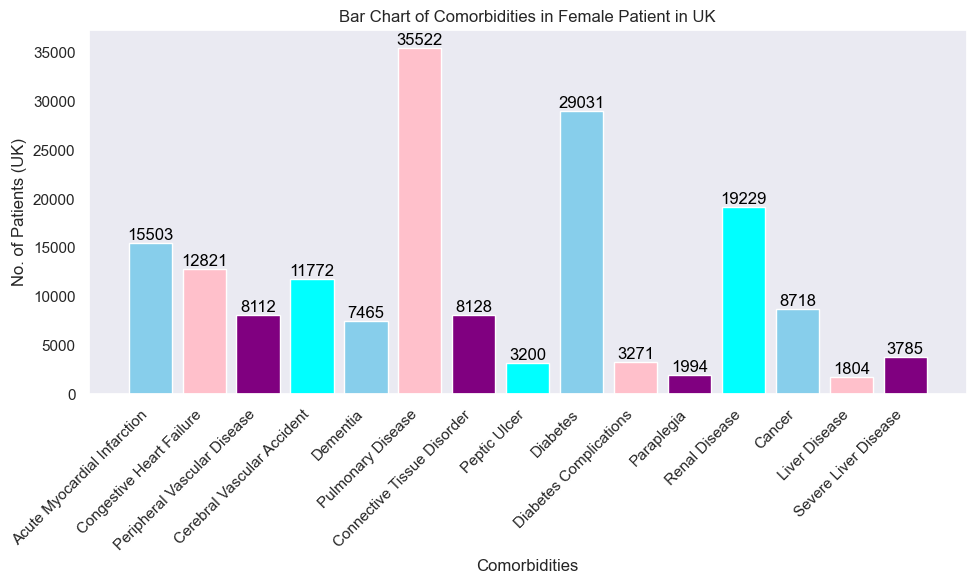

In [88]:
filtered_data_female = UK_comorbidities_data_female.dropna(subset=['COMORBIDITIES'])

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'pink', 'purple', 'cyan']

bars = plt.bar(filtered_data_female['COMORBIDITIES'], filtered_data_female['No. of Patient (Uk)'],
        color=colors)

plt.xlabel('Comorbidities')
plt.ylabel('No. of Patients (UK)')
plt.title('Bar Chart of Comorbidities in Female Patient in UK')
plt.xticks(rotation=45, ha='right')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), ha='center', va='bottom', color='black')
    
# Show the graph
plt.grid(False)
plt.tight_layout()
plt.show()

## For Ethnicity

In [89]:
comorbidities_filtered_data_ethnicity = merged_df10[(merged_df10['ETHNICITY'] == 'WHITE BRITISH')]
comorbidities_count_ethnicity = comorbidities_filtered_data_ethnicity['COMORBIDITIES_27_03'].str.split(',').explode().value_counts().reset_index()
comorbidities_count_ethnicity.columns = ['COMORBIDITIES', 'No. of Patient (Uk)']
comorbidity_grouped_data_ethnicity = comorbidities_count_ethnicity.groupby('COMORBIDITIES')['No. of Patient (Uk)'].sum().reset_index()
comorbidity_grouped_data_ethnicity['COMORBIDITIES'] = comorbidity_grouped_data_ethnicity['COMORBIDITIES'].str.lstrip('0')
comorbidity_grouped_data_ethnicity

COMORBIDITIES  No. of Patient (Uk)
0              1                32932
1              2                24799
2              3                17137
3              4                22986
4              5                13221
5              6                67132
6              7                14976
7              8                 6329
8              9                57019
9             10                 6441
10            11                 3814
11            12                37366
12            13                18048
13            15                 3482
14            17                 7196

## Merging Comorbidities and Gender

In [90]:
Comorbidities= Comorbidities.astype(str)
UK_comorbidities_data_ethnicity = pd.merge(comorbidity_grouped_data_ethnicity, Comorbidities, left_on='COMORBIDITIES', right_on='Code', how='left')
UK_comorbidities_data_ethnicity
UK_comorbidities_data_ethnicity['COMORBIDITIES'] = UK_comorbidities_data_ethnicity['Description']
UK_comorbidities_data_ethnicity.drop(['Code', 'Description', 'Charlon score', 'Notes'], axis=1, inplace=True)
UK_comorbidities_data_ethnicity

COMORBIDITIES  No. of Patient (Uk)
0   Acute Myocardial Infarction                32932
1      Congestive Heart Failure                24799
2   Peripheral Vascular Disease                17137
3    Cerebral Vascular Accident                22986
4                      Dementia                13221
5             Pulmonary Disease                67132
6    Connective Tissue Disorder                14976
7                  Peptic Ulcer                 6329
8                      Diabetes                57019
9        Diabetes Complications                 6441
10                   Paraplegia                 3814
11                Renal Disease                37366
12                       Cancer                18048
13                Liver Disease                 3482
14         Severe Liver Disease                 7196

## Filtering Vital Status for different Cancer Types on UK data

In [91]:
UK_filtered_data = merged_df10[(merged_df10['VITALSTATUS'].isin(['Alive', 'Dead']))]
UK_cancer_data = UK_filtered_data.groupby(['SITE_ICD10_O2_3CHAR', 'VITALSTATUS'])['PATIENTID'].count().unstack()
UK_cancer_data['SurvivalRate'] = (UK_cancer_data['Alive'] / (UK_cancer_data['Alive'] + UK_cancer_data['Dead']))*100
UK_cancer_data.reset_index(inplace=True)
Top10_UK_cancer_data = UK_cancer_data.nlargest(10, 'SurvivalRate')
Top10_UK_cancer_data
Bottom10_UK_cancer_data = UK_cancer_data.nsmallest(10, 'SurvivalRate')
Bottom10_UK_cancer_data

VITALSTATUS                                SITE_ICD10_O2_3CHAR  Alive  Dead  \
60                              Malignant neoplasm of pancreas   3371 31215   
48           Malignant neoplasm of other and ill-defined di...    126  1113   
36                           Malignant neoplasm of gallbladder    403  3243   
43           Malignant neoplasm of liver and intrahepatic b...   3220 17608   
33                             Malignant neoplasm of esophagus   5638 23083   
53           Malignant neoplasm of other and unsp parts of ...    895  3427   
72                               Malignant neoplasm of stomach   4161 15515   
99           Oth & unsp malig neoplm of lymphoid, hematpoet...      1     2   
91           Neoplasm of uncertain behavior of female genit...      2     2   
67                 Malignant neoplasm of rectosigmoid junction   3068  3045   

VITALSTATUS  SurvivalRate  
60                     10  
48                     10  
36                     11  
43                     15  
33                     20  
53                     21  
72                     21  
99                     33  
91                     50  
67                     50

## Visualising Top 10 Highest Survival Rate Cancer Type

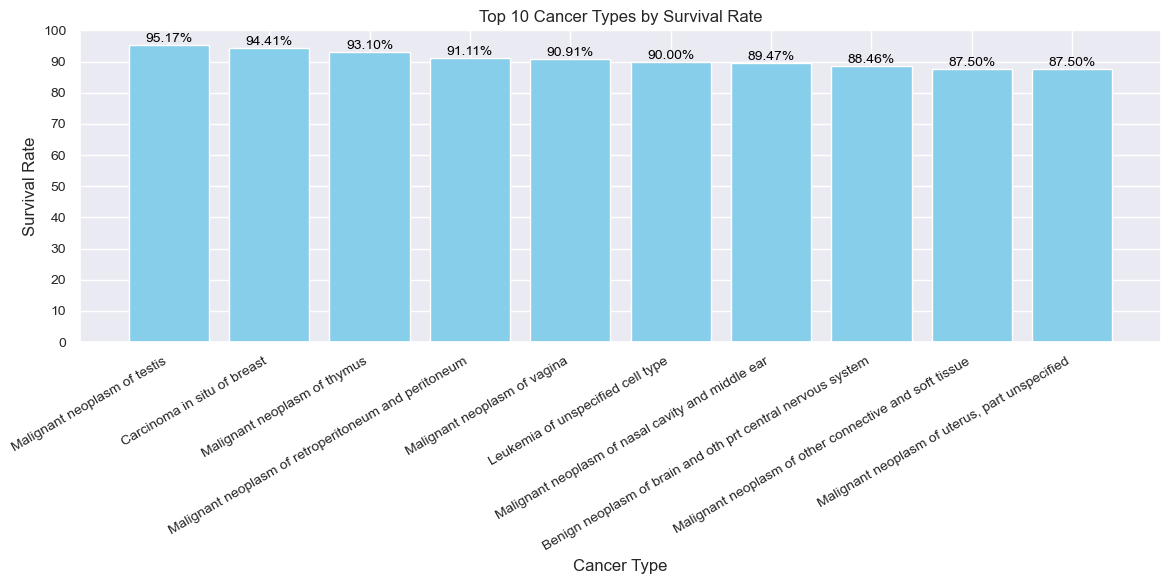

In [92]:
plt.figure(figsize=(12, 6))
bars = plt.bar(Top10_UK_cancer_data['SITE_ICD10_O2_3CHAR'], Top10_UK_cancer_data['SurvivalRate'], color='skyblue')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Cancer Type')
plt.ylabel('Survival Rate')
plt.title('Top 10 Cancer Types by Survival Rate')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(range(0, 101, 10), fontsize=10)  # Adjust y-axis ticks at intervals of 10%
plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.tight_layout()

# Show the plot
plt.show()


## Visualising Least Survival Rate Cancer Type

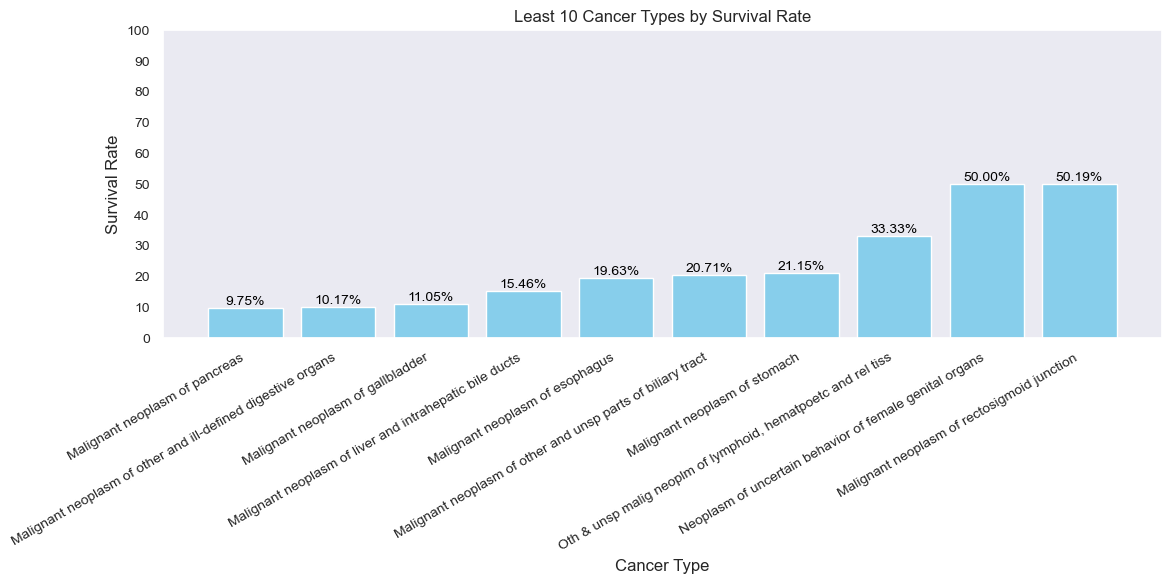

In [93]:
plt.figure(figsize=(12, 6))
bars = plt.bar(Bottom10_UK_cancer_data['SITE_ICD10_O2_3CHAR'], Bottom10_UK_cancer_data['SurvivalRate'], color='skyblue')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Cancer Type')
plt.ylabel('Survival Rate')
plt.title('Least 10 Cancer Types by Survival Rate')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(range(0, 101, 10), fontsize=10)  # Adjust y-axis ticks at intervals of 10%
plt.ylim(0, 100)
plt.grid(False)# Set y-axis range from 0 to 100
plt.tight_layout()

# Show the plot
plt.show()

## Extracting Performance Status from Lookup Table

In [94]:
Performance_status_data = Comorbidities = pd.read_excel(r'Documents\all_z_lookup_tables.xlsx',sheet_name='zperformancestatus')
Performance_status_data 

Code                                        Description
0     0  Able to carry out all normal activity without ...
1     1  Restricted in strenuous activity but ambulator...
2     2  Ambulatory and capable of all self-care but un...
3     3  Symptomatic and in a chair or in bed for great...
4     4  Completely disabled; cannot carry out any self...
5     9                                       Not recorded

## Merging Performance Status in existing Uk Dataset

In [95]:
UK_performance_status = pd.merge(merged_df10, Performance_status_data, left_on='PERFORMANCESTATUS', right_on='Code', how='left')
UK_performance_status['PERFORMANCE_STATUS'] = UK_performance_status['Description']
UK_performance_status.drop(['Code', 'Description'], axis=1, inplace=True)


## Filtering Performance for different Cancer Types on UK data

In [96]:
UK_filtered_performance_status = UK_performance_status[(UK_performance_status['VITALSTATUS']=='Alive')]
UK_filtered_performance_status = UK_filtered_performance_status.groupby(['PERFORMANCE_STATUS'])['PATIENTID'].count().reset_index()
UK_filtered_performance_status.rename(columns={'PATIENTID': 'No. of Patient (UK)'}, inplace=True)
UK_filtered_performance_status.sort_values( by = 'No. of Patient (UK)')

PERFORMANCE_STATUS  No. of Patient (UK)
2  Completely disabled; cannot carry out any self...                 1875
5  Symptomatic and in a chair or in bed for great...                 8585
1  Ambulatory and capable of all self-care but un...                17830
3                                       Not recorded                38583
4  Restricted in strenuous activity but ambulator...                48734
0  Able to carry out all normal activity without ...               154518

## Visualising Performance Status in Pie Chart

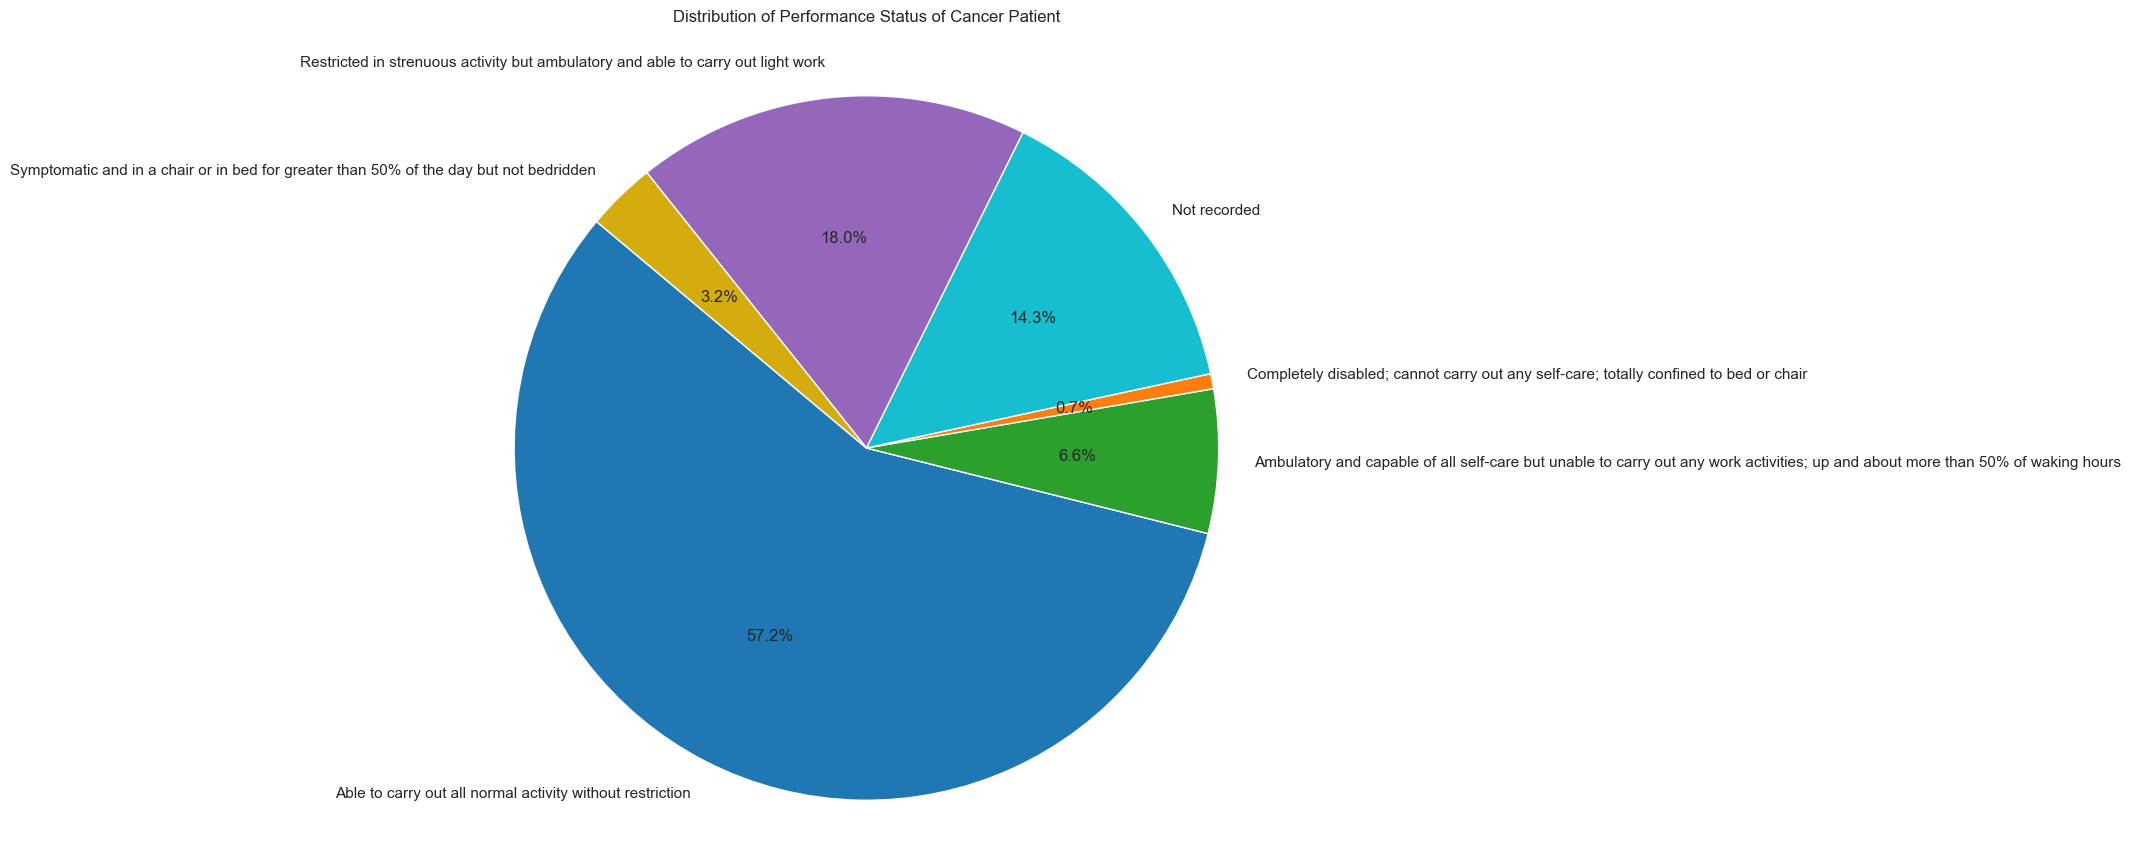

In [97]:
plt.figure(figsize=(10, 10))
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#17becf', '#9467bd', '#d4ac0d']

# Create a pie chart
plt.pie(UK_filtered_performance_status['No. of Patient (UK)'], labels=UK_filtered_performance_status['PERFORMANCE_STATUS'], autopct='%1.1f%%', startangle=140, colors=colors)

# Title
plt.title('Distribution of Performance Status of Cancer Patient', pad=30)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [98]:
merged_df10.dtypes

TUMOURID                                   int64
GENDER                                    object
PATIENTID                                  int64
DIAGNOSISDATEBEST                 datetime64[ns]
SITE_ICD10_O2_3CHAR                       object
SITE_ICD10_O2                             object
SITE_ICD10R4_O2_3CHAR_FROM2013            object
SITE_ICD10R4_O2_FROM2013                  object
SITE_ICDO3REV2011                         object
SITE_ICDO3REV2011_3CHAR                   object
MORPH_ICD10_O2                             int64
MORPH_ICDO3REV2011                       float64
BEHAVIOUR_ICD10_O2                         int64
BEHAVIOUR_ICDO3REV2011                     int64
T_BEST                                    object
N_BEST                                    object
M_BEST                                    object
STAGE_BEST                                object
GRADE                                     object
AGE                                        int64
CREG_CODE           

In [99]:
bdf= merged_df10

In [100]:
bdf.shape

(1113585, 51)

In [101]:
bdf.head()

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0  10399610    Male   10000001        2017-03-31   
1  10694862    Male   10000002        2016-01-14   
2  11938715  Female   10000003        2018-12-10   
3  11869010    Male   10000004        2018-04-05   
4  11037077    Male   10000005        2018-04-23   

                                SITE_ICD10_O2_3CHAR  \
0  Other and unspecified malignant neoplasm of skin   
1  Other and unspecified malignant neoplasm of skin   
2  Other and unspecified malignant neoplasm of skin   
3  Other and unspecified malignant neoplasm of skin   
4  Other and unspecified malignant neoplasm of skin   

                                       SITE_ICD10_O2  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                     SITE_ICD10R4_O2_3CHAR_FROM2013  \
0  Other and unspecified malignant neoplasm of skin   
1  Other and unspecified malignant neoplasm of skin   
2  Other and unspecified malignant neoplasm of skin   
3  Other and unspecified malignant neoplasm of skin   
4  Other and unspecified malignant neoplasm of skin   

                            SITE_ICD10R4_O2_FROM2013  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                                   SITE_ICDO3REV2011  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                            SITE_ICDO3REV2011_3CHAR  ...  DEATHCAUSECODE_2  \
0  Other and unspecified malignant neoplasm of skin  ...               NaN   
1  Other and unspecified malignant neoplasm of skin  ...               NaN   
2  Other and unspecified malignant neoplasm of skin  ...               NaN   
3  Other and unspecified malignant neoplasm of skin  ...               NaN   
4  Other and unspecified malignant neoplasm of skin  ...               NaN   

   DEATHCAUSECODE_UNDERLYING  DEATHLOCATIONCODE  VITALSTATUS VITALSTATUSDATE  \
0                        NaN                NaN        Alive       5/07/2022   
1                        NaN                NaN        Alive       5/07/2022   
2                        NaN                NaN        Alive       5/07/2022   
3                        NaN                NaN        Alive       5/07/2022   
4                        NaN                NaN        Alive       5/07/2022   

  LINKNUMBER AGE_INTERVAL Fiscal_year DiagnosticYear  AGE-INTERVAL  
0  101610884        80–84        2017           2017         80–90  
1  101343783        65–69        2016           2016         60–70  
2  101560124        75–79        2018           2018         70–80  
3  101833580        75–79        2018           2018         70–80  
4  100957799        45–49        2018           2018         40–50  

[5 rows x 51 columns]

In [102]:
bdf.rename(columns={'Fiscal_year': 'DIAGNOSISYEAR'}, inplace=True)

In [103]:
# Convert 'VITALSTATUSDATE' column to datetime
bdf['VITALSTATUSDATE'] = pd.to_datetime(bdf['VITALSTATUSDATE'])

# Extract the year from 'VITALSTATUSDATE' and create a new 'VITALYEAR' column
bdf['VITALYEAR'] = bdf['VITALSTATUSDATE'].dt.year
bdf['VITALYEAR'].fillna(0, inplace=True)
bdf['VITALYEAR'] = bdf['VITALYEAR'].astype(int)


C:\Users\saura\AppData\Local\Temp\ipykernel_14412\2064376743.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [104]:
# Removing duplicate patient ids
unique_df = bdf.drop_duplicates(subset='PATIENTID')

gender_counts = unique_df['GENDER'].value_counts().reset_index()
gender_counts.columns = ['GENDER', 'Total']
gender_counts

GENDER   Total
0                                               Male  580251
1                                             Female  468322
2  Indeterminate (Unable to be classified as eith...       2

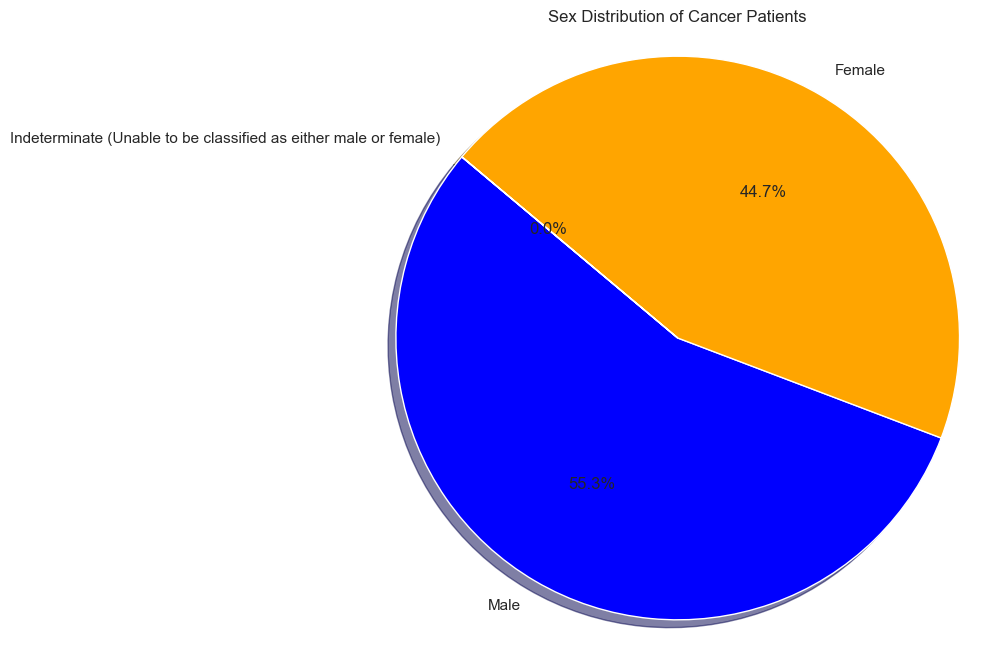

In [105]:
# Setting the figure size
plt.figure(figsize=(8, 8))

# Counting the distribution of gender using value_counts()
b_gender_counts = unique_df['GENDER'].value_counts()

# Data for the pie chart
labels = b_gender_counts.index
sizes = b_gender_counts.values
colors = ['blue', 'orange', 'green']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Distribution of Cancer Patients')
plt.show()


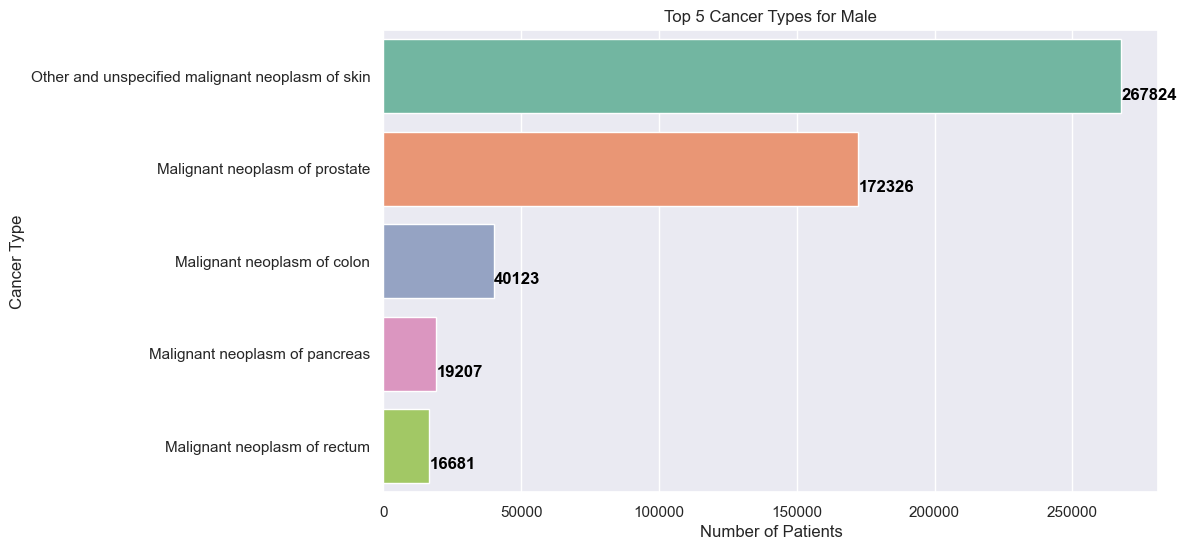

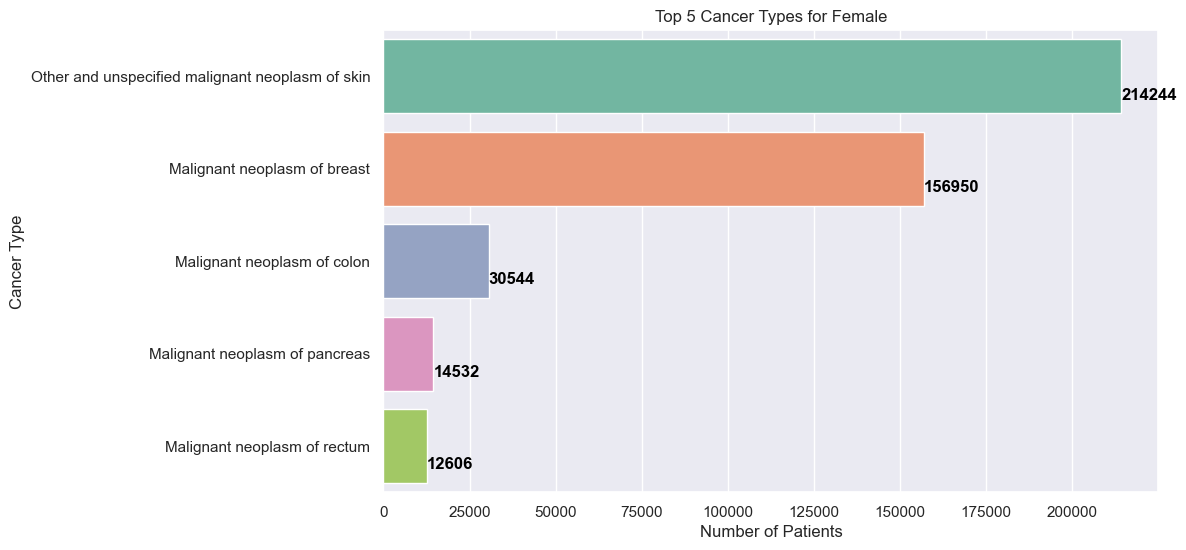

In [106]:
male_top_cancer_types = unique_df[unique_df['GENDER'] == 'Male']['SITE_ICD10_O2_3CHAR'].value_counts().nlargest(5)
female_top_cancer_types = unique_df[unique_df['GENDER'] == 'Female']['SITE_ICD10_O2_3CHAR'].value_counts().nlargest(5)

# Filter the dataframe for the top 5 cancer types
male_filtered_df = unique_df[(unique_df['GENDER'] == 'Male') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(male_top_cancer_types.index))]
female_filtered_df = unique_df[(unique_df['GENDER'] == 'Female') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(female_top_cancer_types.index))]

# Plot the top 5 cancer types for male
plt.figure(figsize=(10, 6))
male_plot = sns.countplot(y='SITE_ICD10_O2_3CHAR', data=male_filtered_df, palette='Set2', order=male_top_cancer_types.index)

# Add the count numbers for each bar
for i, v in enumerate(male_top_cancer_types):
    male_plot.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('Top 5 Cancer Types for Male')
plt.ylabel('Cancer Type')
plt.xlabel('Number of Patients')
plt.show()

# Plot the top 5 cancer types for female
plt.figure(figsize=(10, 6))
female_plot = sns.countplot(y='SITE_ICD10_O2_3CHAR', data=female_filtered_df, palette='Set2', order=female_top_cancer_types.index)

# Add the count numbers for each bar
for i, v in enumerate(female_top_cancer_types):
    female_plot.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('Top 5 Cancer Types for Female')
plt.ylabel('Cancer Type')
plt.xlabel('Number of Patients')
plt.show()

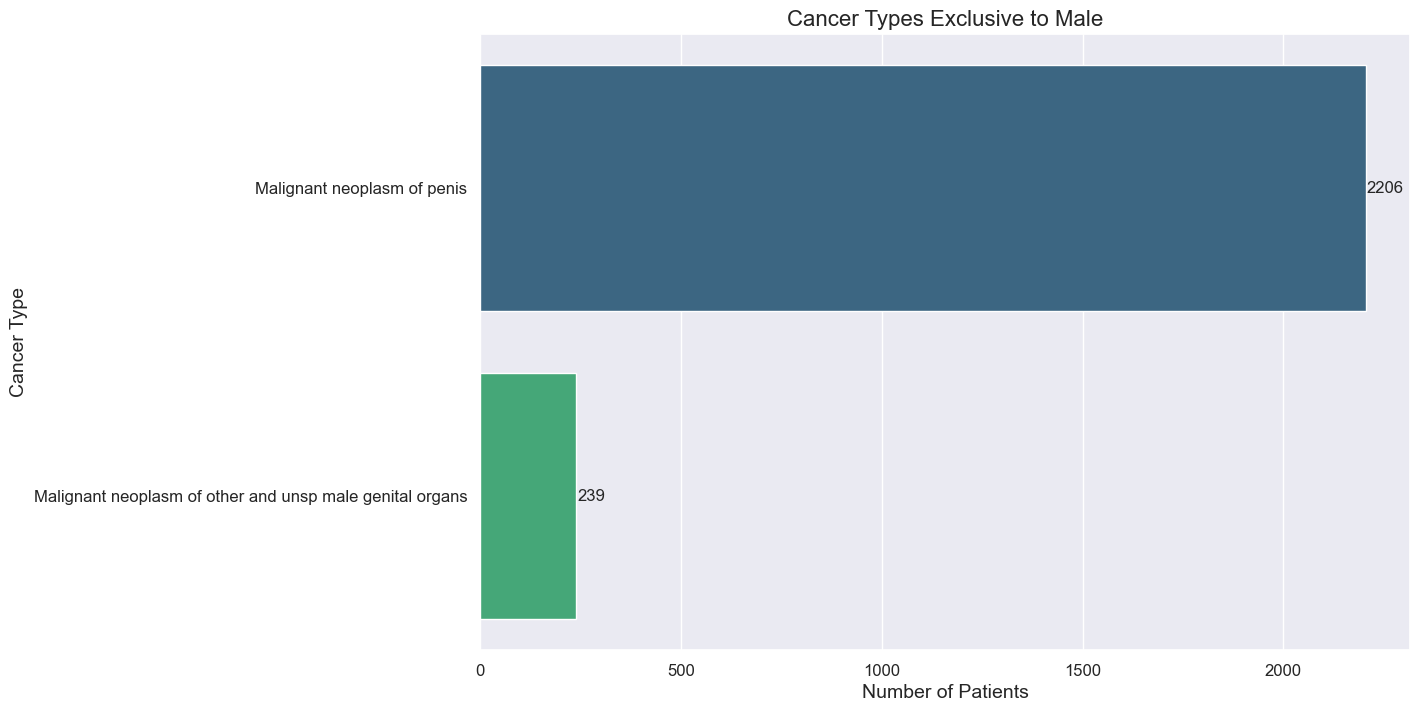

Cancer types exclusive to male: {'Malignant neoplasm of penis', 'Malignant neoplasm of other and unsp male genital organs'}
Cancer types exclusive to female: set()


In [107]:
# Get the unique cancer types for each gender
male_cancer_types = set(unique_df[unique_df['GENDER'] == 'Male']['SITE_ICD10_O2_3CHAR'].unique())
female_cancer_types = set(unique_df[unique_df['GENDER'] == 'Female']['SITE_ICD10_O2_3CHAR'].unique())

# Find the cancer types that are exclusive to each gender
male_only_cancer_types = male_cancer_types - female_cancer_types
female_only_cancer_types = female_cancer_types - male_cancer_types

# Filter the dataframe for the exclusive cancer types
male_only_df = unique_df[(unique_df['GENDER'] == 'Male') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(male_only_cancer_types))]
female_only_df = unique_df[(unique_df['GENDER'] == 'Female') & (unique_df['SITE_ICD10_O2_3CHAR'].isin(female_only_cancer_types))]

# Count the number of patients for each exclusive cancer type
male_only_counts = male_only_df['SITE_ICD10_O2_3CHAR'].value_counts()
female_only_counts = female_only_df['SITE_ICD10_O2_3CHAR'].value_counts()

# Create bar plots for the exclusive cancer types with enhanced visuals
def create_stunning_bar_plot(counts, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(y=counts.index, x=counts.values, palette='viridis')
    plt.title(title, fontsize=16)
    plt.ylabel('Cancer Type', fontsize=14)
    plt.xlabel('Number of Patients', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    for index, value in enumerate(counts.values):
        plt.text(value + 2, index, str(value), fontsize=12, verticalalignment='center')
    plt.show()

if not male_only_counts.empty:
    create_stunning_bar_plot(male_only_counts, 'Cancer Types Exclusive to Male')

if not female_only_counts.empty:
    create_stunning_bar_plot(female_only_counts, 'Cancer Types Exclusive to Female')

print('Cancer types exclusive to male:', male_only_cancer_types)
print('Cancer types exclusive to female:', female_only_cancer_types)

In [108]:
# Group the data by year and gender and count the number of diagnoses
diagnoses_counts = unique_df.groupby(['DIAGNOSISYEAR', 'GENDER']).size().reset_index(name='Counts')
diagnoses_counts

DIAGNOSISYEAR                                             GENDER  Counts
0           2016                                             Female  122162
1           2016  Indeterminate (Unable to be classified as eith...       1
2           2016                                               Male  148700
3           2017                                             Female  117961
4           2017                                               Male  143422
5           2018                                             Female  115622
6           2018                                               Male  147743
7           2019                                             Female  112577
8           2019  Indeterminate (Unable to be classified as eith...       1
9           2019                                               Male  140386

<Figure size 1200x800 with 0 Axes>

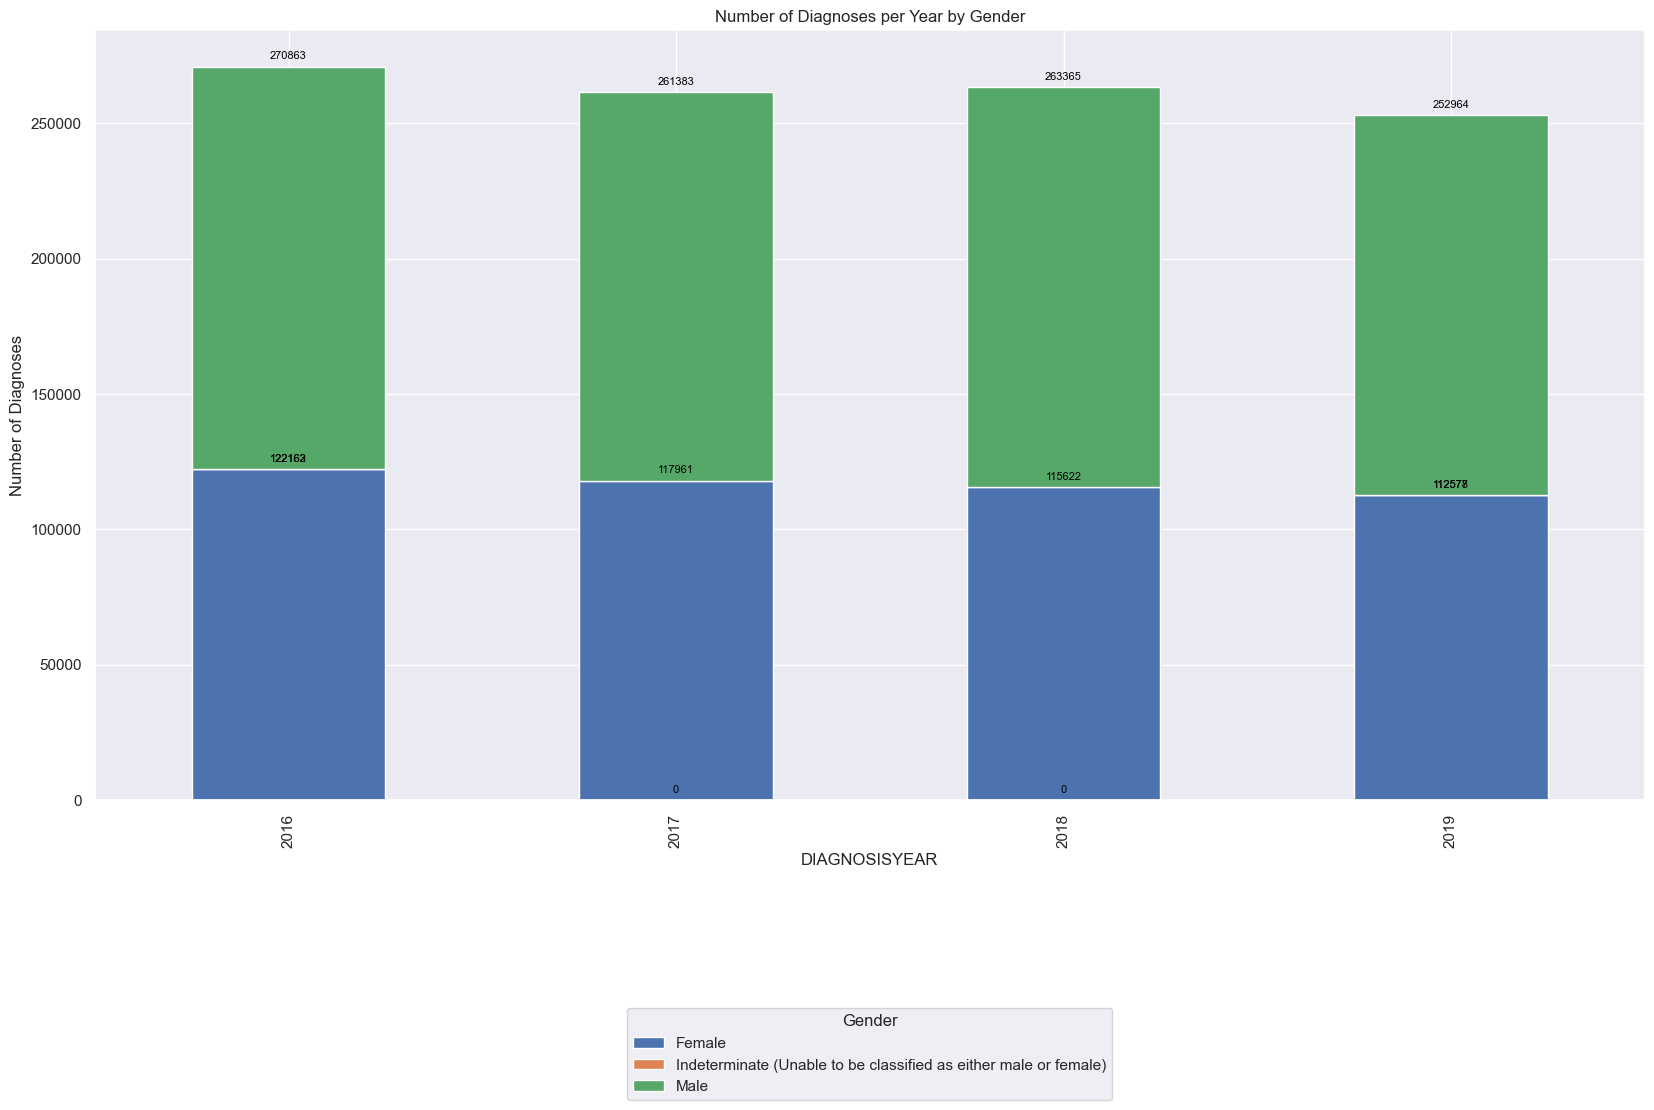

In [109]:


# Pivot the data for plotting
diagnoses_counts_pivot = diagnoses_counts.pivot(index='DIAGNOSISYEAR', columns='GENDER', values='Counts')

# Plot a stacked bar chart with improved figure size and added data values
plt.figure(figsize=(12, 8))
ax = diagnoses_counts_pivot.plot(kind='bar', stacked=True)
plt.title('Number of Diagnoses per Year by Gender')
plt.xlabel('DIAGNOSISYEAR')
plt.ylabel('Number of Diagnoses')

# Add data values on top of the bars
for container in ax.containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=8, color='black', padding=4)

# Move legend below the figure
ax.legend(title='Gender', bbox_to_anchor=(0.5, -0.26), loc='upper center')


plt.show()


In [110]:
# Calculate statistics for each gender
stats_by_gender = unique_df.groupby('GENDER')['AGE'].agg(['mean', 'median', 'min', 'max', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)]).reset_index()
stats_by_gender.columns = ['GENDER', 'Mean Age', 'Median Age', 'Min Age', 'Max Age', '25th Percentile', '75th Percentile']

print('Statistics by Gender:')
stats_by_gender


Statistics by Gender:


GENDER  Mean Age  Median Age  \
0                                             Female        69          71   
1  Indeterminate (Unable to be classified as eith...        86          86   
2                                               Male        71          72   

   Min Age  Max Age  25th Percentile  75th Percentile  
0        0      105               59               80  
1       81       90               83               88  
2        0      105               64               80

In [111]:
# Filter the DataFrame to select patients aged below 5
patients_below_5 = unique_df[unique_df['AGE'] < 5]

# Display the data of patients aged below 5

patients_below_5.shape


(74, 52)

In [112]:
#top 5 cancer types for patients aged below 5

# Group by cancer type and count occurrences for each type

cancer_type_occurrence_counts = patients_below_5['SITE_ICD10_O2_3CHAR'].value_counts().reset_index()
cancer_type_occurrence_counts.columns = ['CANCER_TYPE', 'OCCURRENCES']

# Find the top 5 cancer types with the highest occurrence rates
top_5_occurrence_cancer_types = cancer_type_occurrence_counts.nlargest(5, 'OCCURRENCES')

top_5_occurrence_cancer_types



CANCER_TYPE  OCCURRENCES
0  Malignant neoplasm of liver and intrahepatic b...           34
1                       Malignant neoplasm of testis           19
2   Other and unspecified malignant neoplasm of skin            9
3                        Malignant neoplasm of colon            4
4                     Malignant neoplasm of prostate            3

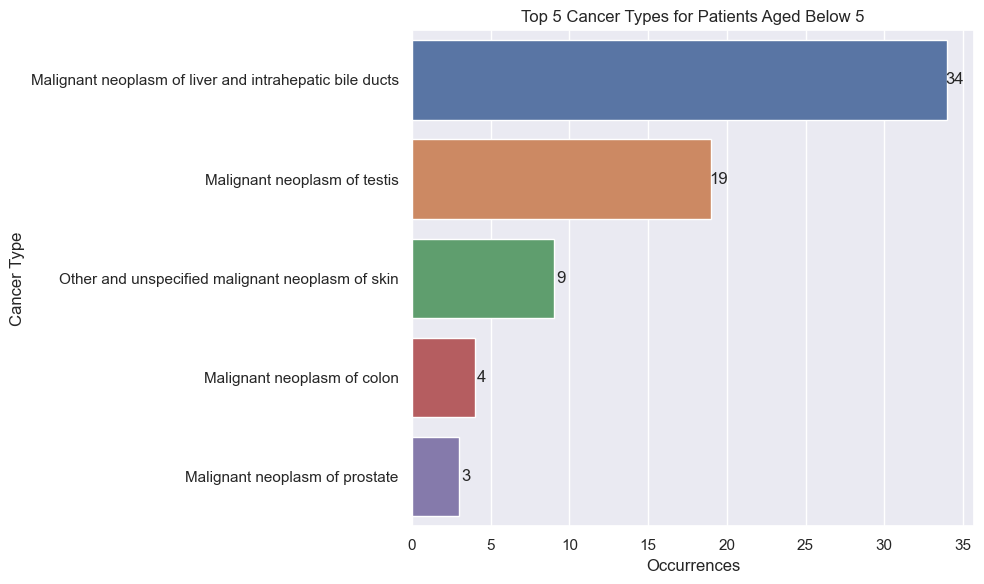

In [113]:

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='OCCURRENCES', y='CANCER_TYPE', data=top_5_occurrence_cancer_types)
plt.xlabel('Occurrences')
plt.ylabel('Cancer Type')
plt.title('Top 5 Cancer Types for Patients Aged Below 5')

# Display values on the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center',
                  xytext = (5, 0),
                  textcoords = 'offset points')

# Show the plot
plt.tight_layout()
plt.show()


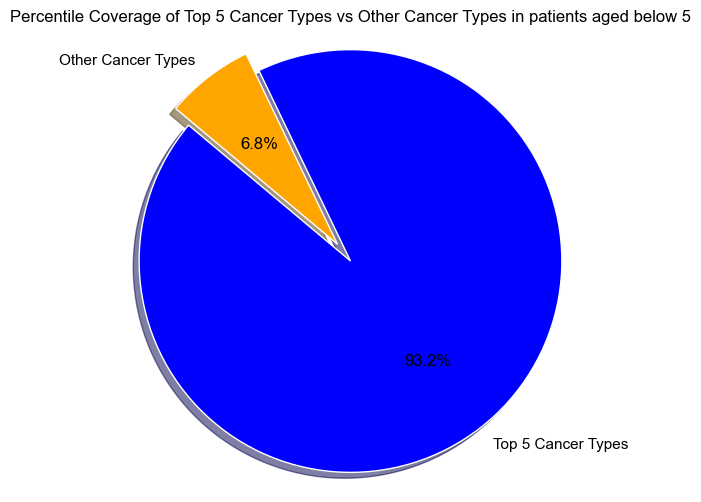

In [114]:
# Calculate total occurrences of the top 5 cancer types
total_top_5_occurrences = top_5_occurrence_cancer_types['OCCURRENCES'].sum()

# Calculate total occurrences of all cancer types
total_all_occurrences = cancer_type_occurrence_counts['OCCURRENCES'].sum()

# Calculate the percentile coverage of the top 5 cancer types
percentile_coverage_top_5 = (total_top_5_occurrences / total_all_occurrences) * 100

# Calculate the percentile coverage of other cancer types
percentile_coverage_other = 100 - percentile_coverage_top_5

# Data for the pie chart
labels = ['Top 5 Cancer Types', 'Other Cancer Types']
sizes = [percentile_coverage_top_5, percentile_coverage_other]
colors = ['blue', 'orange']
explode = (0.1, 0)  # Explode the first slice (Top 5)

# Create a pie chart 
plt.figure(figsize=(6, 6), facecolor='white')  # Set white background
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, textprops={'color': 'black'})  # Add shadow and set label color to black
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentile Coverage of Top 5 Cancer Types vs Other Cancer Types in patients aged below 5', color='black')
plt.show()


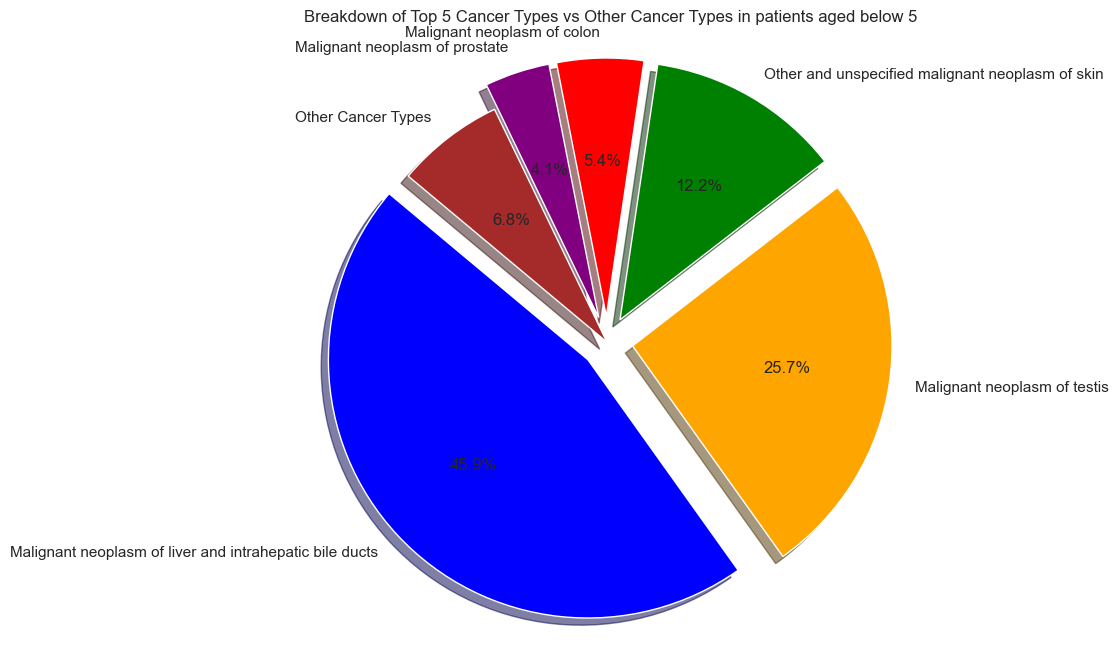

In [115]:
# Data for the pie chart
labels = top_5_occurrence_cancer_types['CANCER_TYPE'].tolist() + ['Other Cancer Types']
sizes = top_5_occurrence_cancer_types['OCCURRENCES'].tolist() + [total_all_occurrences - total_top_5_occurrences]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # Explode the first slice (Top 5) for emphasis

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Breakdown of Top 5 Cancer Types vs Other Cancer Types in patients aged below 5')
plt.show()


In [116]:
# Filter the DataFrame to select patients aged 0
patients_aged_0 = patients_below_5[patients_below_5['AGE'] == 0]

patients_aged_0.shape

(23, 52)

In [117]:
df2_unique= df2.drop_duplicates(subset='PATIENTID')

In [118]:
unique_df['CANCERCODE'] = df2_unique['SITE_ICD10_O2_3CHAR']
unique_df['STATUS'] = df2_unique['VITALSTATUS']

C:\Users\saura\AppData\Local\Temp\ipykernel_14412\3207636965.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saura\AppData\Local\Temp\ipykernel_14412\3207636965.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
unique_df.head()

TUMOURID  GENDER  PATIENTID DIAGNOSISDATEBEST  \
0  10399610    Male   10000001        2017-03-31   
1  10694862    Male   10000002        2016-01-14   
2  11938715  Female   10000003        2018-12-10   
3  11869010    Male   10000004        2018-04-05   
4  11037077    Male   10000005        2018-04-23   

                                SITE_ICD10_O2_3CHAR  \
0  Other and unspecified malignant neoplasm of skin   
1  Other and unspecified malignant neoplasm of skin   
2  Other and unspecified malignant neoplasm of skin   
3  Other and unspecified malignant neoplasm of skin   
4  Other and unspecified malignant neoplasm of skin   

                                       SITE_ICD10_O2  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                     SITE_ICD10R4_O2_3CHAR_FROM2013  \
0  Other and unspecified malignant neoplasm of skin   
1  Other and unspecified malignant neoplasm of skin   
2  Other and unspecified malignant neoplasm of skin   
3  Other and unspecified malignant neoplasm of skin   
4  Other and unspecified malignant neoplasm of skin   

                            SITE_ICD10R4_O2_FROM2013  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                                   SITE_ICDO3REV2011  \
0  Other and unsp malignant neoplasm of skin of s...   
1  Other and unsp malignant neoplasm of skin, uns...   
2  Oth and unsp malig neoplasm skin/ ear and extr...   
3  Other and unsp malignant neoplasm of skin, uns...   
4  Oth and unsp malig neoplasm skin/ upper limb, ...   

                            SITE_ICDO3REV2011_3CHAR  ...  VITALSTATUS  \
0  Other and unspecified malignant neoplasm of skin  ...        Alive   
1  Other and unspecified malignant neoplasm of skin  ...        Alive   
2  Other and unspecified malignant neoplasm of skin  ...        Alive   
3  Other and unspecified malignant neoplasm of skin  ...        Alive   
4  Other and unspecified malignant neoplasm of skin  ...        Alive   

   VITALSTATUSDATE  LINKNUMBER  AGE_INTERVAL DIAGNOSISYEAR DiagnosticYear  \
0       2022-05-07   101610884         80–84          2017           2017   
1       2022-05-07   101343783         65–69          2016           2016   
2       2022-05-07   101560124         75–79          2018           2018   
3       2022-05-07   101833580         75–79          2018           2018   
4       2022-05-07   100957799         45–49          2018           2018   

  AGE-INTERVAL VITALYEAR CANCERCODE  STATUS  
0        80–90      2022        C44       A  
1        60–70      2022        C44       A  
2        70–80      2022        C44       A  
3        70–80      2022        C44       A  
4        40–50      2022        C44       A  

[5 rows x 54 columns]

In [120]:
lung_cancer_df = unique_df[unique_df['CANCERCODE'] == 'C34']
lung_cancer_df.shape

(0, 54)

In [121]:
lung_cancer_df.head()

Empty DataFrame
Columns: [TUMOURID, GENDER, PATIENTID, DIAGNOSISDATEBEST, SITE_ICD10_O2_3CHAR, SITE_ICD10_O2, SITE_ICD10R4_O2_3CHAR_FROM2013, SITE_ICD10R4_O2_FROM2013, SITE_ICDO3REV2011, SITE_ICDO3REV2011_3CHAR, MORPH_ICD10_O2, MORPH_ICDO3REV2011, BEHAVIOUR_ICD10_O2, BEHAVIOUR_ICDO3REV2011, T_BEST, N_BEST, M_BEST, STAGE_BEST, GRADE, AGE, CREG_CODE, STAGE_BEST_SYSTEM, LATERALITY, SCREENINGSTATUSFULL_CODE, ER_STATUS, PR_STATUS, HER2_STATUS, QUINTILE_2019, DATE_FIRST_SURGERY, CANCERCAREPLANINTENT, PERFORMANCESTATUS, CHRL_TOT_27_03, COMORBIDITIES_27_03, GLEASON_PRIMARY, GLEASON_SECONDARY, GLEASON_TERTIARY, GLEASON_COMBINED, ETHNICITY, DEATHCAUSECODE_1A, DEATHCAUSECODE_1B, DEATHCAUSECODE_1C, DEATHCAUSECODE_2, DEATHCAUSECODE_UNDERLYING, DEATHLOCATIONCODE, VITALSTATUS, VITALSTATUSDATE, LINKNUMBER, AGE_INTERVAL, DIAGNOSISYEAR, DiagnosticYear, AGE-INTERVAL, VITALYEAR, CANCERCODE, STATUS]
Index: []

[0 rows x 54 columns]

In [122]:
# Counting the number of lung cancer patients that are still alive
alive_statuses = ['A', 'A1', 'A2', 'A3']  # Alive status codes
dead_statuses = ['D', 'D1', 'D2', 'D3', 'D4', 'D5']  # Dead status codes

alive_lungpatients = lung_cancer_df[lung_cancer_df['STATUS'].isin(alive_statuses)].shape[0]
dead_lungpatients = lung_cancer_df[lung_cancer_df['STATUS'].isin(dead_statuses)].shape[0]

# Calculate the total number of patients
total_patients = alive_lungpatients + dead_lungpatients

# Calculate the percentages
alive_percentage = (alive_lungpatients / total_patients) * 100
dead_percentage = (dead_lungpatients / total_patients) * 100

# Data for the bar plot
categories = ['Alive', 'Dead']
values = [alive_lungpatients, dead_lungpatients]  # Number of patients
percentages = [alive_percentage, dead_percentage]  # Percentages

# Create a small bar plot with smaller bar widths
plt.figure(figsize=(6, 4), facecolor='white')  # Set white background
bars = plt.bar(categories, values, color=['green', 'red'], width=0.4)

# Add number values on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{values[i]} ({percentages[i]:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number and Percentage of Alive and Dead Lung Cancer Patients', pad=20)  # Move title up
plt.xlabel('Status')
plt.ylabel('Number of Patients')
plt.ylim(0, max(values) + 10)  # Set y-axis limits

plt.tight_layout() 
plt.show()


ZeroDivisionError: division by zero

In [ ]:
lung_cancer_2016_df = lung_cancer_df[lung_cancer_df['DIAGNOSISYEAR'] == 2016]

lung_dead_in_2016 = lung_cancer_2016_df[lung_cancer_2016_df['STATUS'].isin(dead_statuses)]

total_lung_dead = lung_cancer_df[lung_cancer_df['STATUS'].isin(dead_statuses)]

In [ ]:
patient_status_counts = lung_cancer_2016_df['STATUS'].value_counts()

other_count = patient_status_counts.sum() - sum(patient_status_counts.get(status, 0) for status in alive_statuses + dead_statuses)

# Count the different alive and dead statuses
alive_count = sum(patient_status_counts.get(status, 0) for status in alive_statuses)
dead_count = sum(patient_status_counts.get(status, 0) for status in dead_statuses)

# Data for the pie chart
labels = ['Alive', 'Dead', 'Others']
sizes = [alive_count, dead_count, other_count]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.2, 0.1)  # Explode the 'Alive' slice for emphasis

# Create a pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

# Add values to the wedges and percentages to the autopct
for wedge, autotext in zip(wedges, autotexts):
    percentage = autotext.get_text()
    count = int(sizes[autotexts.index(autotext)])
    autotext.set_text(f'{percentage}\n({count})')

plt.title('Situation of Lung Cancer Patients diagnosed in 2016')
plt.axis('equal') 
plt.show()


In [ ]:
# Calculate survival time in days for lung patients diagnosed in 2016
lung_dead_in_2016['survival_time'] = (lung_dead_in_2016['VITALSTATUSDATE'] - lung_dead_in_2016['DIAGNOSISDATEBEST']).dt.days

# Calculate mean survival time
mean_survival_time = lung_dead_in_2016['survival_time'].mean()
mean_survival_time

In [ ]:
dead_df = unique_df[unique_df['STATUS'].isin(dead_statuses)]
dead_df.shape

In [ ]:
cancer_death_counts = dead_df['SITE_ICD10_O2_3CHAR'].value_counts()

most_deadly_cancer = cancer_death_counts.nlargest(5)

# Create a DataFrame with the desired column names
most_deadly_cancer_df = pd.DataFrame({'Cancer Type': most_deadly_cancer.index, 'Number of Deaths': most_deadly_cancer.values})

most_deadly_cancer_df

# Calculate the total number of deaths
total_deaths = most_deadly_cancer_df['Number of Deaths'].sum()

# Calculate the percentage of deaths for each cancer type
most_deadly_cancer_df['Percentage'] = (most_deadly_cancer_df['Number of Deaths'] / total_deaths) * 100

# Combine all other categories into 'Other'
other_deaths = len(cancer_death_counts) - len(most_deadly_cancer_df)
total_other_deaths = cancer_death_counts.sum() - total_deaths
most_deadly_cancer_df = most_deadly_cancer_df.append({'Cancer Type': 'Other', 'Number of Deaths': total_other_deaths, 'Percentage': (total_other_deaths / total_deaths) * 100}, ignore_index=True)

# Data for the pie chart
labels = most_deadly_cancer_df['Cancer Type']
sizes = most_deadly_cancer_df['Percentage']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'gray']  # Add colors for the top 5 types and 'Other'
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0)  # Explode the first slice (Top 5) for emphasis

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Deaths for Top 5 Deadly Cancer Types vs Other')
plt.show()


In [ ]:
most_deadly_cancer_df


In [ ]:
columns_to_select = ['TUMOURID', 'GENDER', 'PATIENTID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'GRADE', 'AGE',
       'DATE_FIRST_SURGERY',
       'ETHNICITY', 'DEATHCAUSECODE_UNDERLYING',
       'DEATHLOCATIONCODE', 'STATUS', 'VITALSTATUSDATE',
       'DIAGNOSISYEAR', 'VITALYEAR', 'CANCERCODE']
lung_dead_patients = total_lung_dead[columns_to_select]
lung_dead_patients

In [ ]:
# Calculate survival time in days
lung_dead_patients['survival_time'] = (lung_dead_patients['VITALSTATUSDATE'] - lung_dead_patients['DIAGNOSISDATEBEST']).dt.days

# Calculate survival percentiles
survival_percentiles = lung_dead_patients['survival_time'].quantile([0.25, 0.5, 0.75]).reset_index()

# Rename the columns
survival_percentiles.columns = ['Percentile', 'Survival Days']

# Print survival percentiles
print('Survival Percentiles:')
survival_percentiles


In [ ]:
#This means that 25% of the dead lung cancer patients survived for 42 days or less after diagnosis, 
#50% survived for 152 days or less, and 75% survived for 451 days or less.

In [ ]:
#survival curve for patients diagnosed in 2016
bdf_2016 = unique_df[unique_df['DIAGNOSISYEAR'] == 2016]
from lifelines import KaplanMeierFitter

In [ ]:
bdf_2016['VITALSTATUS'] = bdf_2016['VITALSTATUS'].apply(lambda x: 1 if x.startswith('D') else 0)

# Convert 'DIAGNOSISDATEBEST' to datetime format
bdf_2016['DIAGNOSISDATEBEST'] = pd.to_datetime(bdf_2016['DIAGNOSISDATEBEST'])

# Calculate the duration from diagnosis date to the end of 2016
bdf_2016['DURATION'] = (pd.to_datetime('2016-12-31') - bdf_2016['DIAGNOSISDATEBEST']).dt.days

# Create a Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(bdf_2016['DURATION'], bdf_2016['VITALSTATUS'])

# Plot the survival function
kmf.plot()
plt.title('Survival function of cancer patients')
plt.xlabel('Days since diagnosis')
plt.ylabel('Survival probability')
plt.show()

In [ ]:
#This means probablity of survival after 350 days is minimal

In [ ]:
# Group the data by 'ETHNICITY' and calculate the mean of the 'AGE' column
ethnicity_cancer_age = unique_df.groupby('ETHNICITY')['AGE'].mean().reset_index()

# Rename the columns for clarity
ethnicity_cancer_age.columns = ['Ethnicity', 'Average Age Of Patients']

# Print the dataframe
ethnicity_cancer_age

In [ ]:
# Sort the results in descending order
ethnicity_cancer_age = ethnicity_cancer_age.sort_values('Average Age Of Patients', ascending=False)

# Set a custom color palette with reversed order
color_palette = sns.color_palette("Blues_r", len(ethnicity_cancer_age))

# Create a bar plot with the custom color palette
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Average Age Of Patients', y='Ethnicity', data=ethnicity_cancer_age, ci=None, palette=color_palette)

# Add value labels to each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width - 1, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='left', va='center')

plt.title('Average Age of Patients for Each Ethnicity')
plt.show()

# Print the dataframe
ethnicity_cancer_age


In [ ]:
unique_df[unique_df['ETHNICITY'] == 'Turkish']

In [ ]:
# Calculate the count of each unique ethnicity and sort it from lowest to highest
ethnicity_counts = unique_df['ETHNICITY'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(ethnicity_counts.index, ethnicity_counts.values, color='skyblue')

# Add value labels to each bar
for index, value in enumerate(ethnicity_counts.values):
    plt.text(value, index, str(value))

plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Distribution of Ethnicities')
plt.show()

In [ ]:
#more than 75% of UK population is white british.